# Predicting Startup Exits

Ultimately, every startup journey ends in some kind of an exit. Broadly speaking, this can be an IPO, an acquisition, a closure or the business can continue operating indefinetly as a private business. Being able to predict whether a company is likely to achieve an IPO or acquisition (what I term as a positive exit) is valuable information for almost all stakeholders involved in the entrepreneurial ecosystem. In particular, this information is likely to be extremely useful to:

 * Founders as an exit offers the chance to cash in years of hard work (usually accumulated as equity holdings) 
 * Venture Capital firms as predicting company exits is simply how they make their money (or not)
 * Support organizations such as incubators, innovation hubs aiming to strategically serve entrepreneurial communities
 
Other stakeholders too can derive some value from this kind of information. For example, employees of startups cna use this information to assess the value of their stock options. In the past, early employees of notable startups have turned into overnight millionaires when their respective employers IPO'd, (think Google, Microsoft, etc.). 

Depending on the results, this exercise could also have implications for the Venture Capital community and benchmarking a fund's performance.  

(Historically, venture capital as an asset class has generated poor returns although exact numbers are disputed). one of the more conservative estimates out there is that Venture Capital has a success rate of only 25%.

1. 75% - The Venture Capital Secret: 3 Out of 4 Start-Ups Fail
2. 90% - Why 90% of Startups Fail [INFOGRAPHIC]
3. 90% - DEAR ENTREPRENEURS: Here's How Bad Your Odds Of Success Are
4. 80% - Five Reasons 8 Out Of 10 Businesses Fail
5. 90% - Startup Genome Report

Consider the situation where our algorithm is able to make predictions with an accuracy of 60% as to whether it will be acquired or have a successful ipo eventually. This naturally would put to question the role of VCs in the entreprenurial ecosystem and the value that they truly add. To put it more generally, if we find that machine learning techniques do:  
 * Just as badly as VCs, one can't really blame VCs
 * Worse than VCs, VCs get validation for their role in the entrepreneurial ecosystem
 * Better than VCs, VCs will get shutdown similar to how stock indexes have taken out the managed funds (e.g. mutual funds) industry. 

# The problem

Predicting startup exits is a tricky business, even for clever humans!    

The difficulty stems partly from the fact that startups can fail for a great variety of reasons: 
 * Ahead of their time/market not ready  
 * Bad founders  
 * Founders lack connections to scale  
 * Technology failure
 * Etc. 

Sometimes, even if a startup ticks all of the above boxes, a founder may not want to exit i.e. they may wish to continue running the firm as a privately owned business! This too from a VC perspective is a negative outcome as dividends return money too slowly (usually) for a VC's timescale. 

Another reason why this exercise has been a difficult one for machine learning is because data on startups has been hard to come by in significnant quantities. As startups are typically not obligated to record and make public their financial statements and also because many founders like to behave secretively, useful information (i.e. information with predictive value) is difficult to come by.  

# The solution

Today we have access to a vast body of information on thousands of startups from across the globe through CrunchBase, a largest public database. There is a strong possibility that this information can be mined for predicting startup exits. 

Essentially, our task is a classification problem. We will attempt to explore a few financial variables within several classification machine learning frameworks:
 * Multinomial Naive Bayes
 * KNN
 * SVM
 * Decision trees
 * Random Forests
 * Gradient Boosted trees
 * AdaBoost
 * Ensemble Voting Classifier

The only question that remains is at what age we want to be able to classify companies as either positive exits or negative exits. We define this below. 

In [1]:
age_cutoff = 3

# Some models take too long to tune on my machine
tuning = False

Before we get started, let's load the usual libraries we'll need throughout this notebook.  
We'll load other libraries/function as their need arises. 

In [2]:
# Load basic libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from ggplot import *

import matplotlib.dates as dates
import datetime

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup plots
%matplotlib inline 

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 150

# show all output from each cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# set export location for figures
fig_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/Deck/Visualizations/'

#plt.style.use('fivethirtyeight')

# Data Collection

CrunchBase provides access to a snapshot of the data it had collected up until the end of 2013 freely.  
This data is provided as SQL dumps.   
I simply took the SQL dumps, loaded them into a MySQL database and exported them as csv sheets which is what we read into python below. 

In [3]:
# load data 

try:
    cb_funding_rounds

except NameError:

    # funding
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_funding_rounds.csv'
    cb_funding_rounds = pd.read_csv(temp_path)

    # objects
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_objects.csv'
    cb_objects = pd.read_csv(temp_path)

    # offices 
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_offices.csv'
    cb_offices = pd.read_csv(temp_path)

    # funds
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_funds.csv'
    cb_funds = pd.read_csv(temp_path)

    # relationships
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_relationships.csv'
    cb_relationships = pd.read_csv(temp_path)

    # milestones 
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_milestones.csv'
    cb_milestones = pd.read_csv(temp_path)

    # investments
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_investments.csv'
    cb_investments = pd.read_csv(temp_path)
    
    # IPOs
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_ipos.csv'
    cb_ipos = pd.read_csv(temp_path)
    
    # acquisitions
    temp_path = '/Users/fqaiser/Box Sync/fqaiser/Springboard/Capstone/csv/cb_acquisitions.csv'
    cb_acquisitions = pd.read_csv(temp_path)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial sample of startups
I start off bulding my dataset by choosing all the startups that were founded before 2009.  

Why founded before 2009?
Because we chose the age cut off to be at 5 years, we want to make sure that all the startups in our sample have at least 5 years of data.  

In [4]:
# create initial list of companies we care about
a = cb_objects[['id', 'entity_type', 'name', 'category_code', 'status', 'founded_at', 'country_code', 'city', 'twitter_username', 'homepage_url']]

# entity_type can be ['Company', 'FinancialOrg', 'Person', 'Product']
# we only want companies naturally
a = a[a.entity_type=='Company']

# filter out companies for which we don't have a founding date
a = a[a.founded_at.notnull()]

# we only want companies were founded before 2009 started
a.founded_at = pd.to_datetime(a.founded_at)
a = a[(a.founded_at >= '1990-01-01') & (a.founded_at <= '2009-01-01')]

Next we refine this list further by choosing only startups that are located in countries that have at least 500 startups listed on CrunchBase. Notably missing from this list is Germany. This is possibly because Germany is a relative newcomer to the startup scene. 

In [5]:
temp = a

temp = temp.groupby(by = ['country_code']).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)
temp = temp.sort_values(by = 'Amount', ascending = False)
temp = temp[temp.Amount>500]

temp

country_code  Amount
134          USA   21216
49           GBR    2805
24           CAN    1481
59           IND    1385
47           FRA     705
37           DEU     697
9            AUS     511

In [6]:
a['country_code'] = np.where(a.country_code.isin(temp.country_code), 
                             a.country_code, 
                             np.where(a.country_code.isnull(), 'Unknown_country', 'Irrelevant_country'))

a.head()

id entity_type                    name    category_code     status founded_at        country_code      city twitter_username                   homepage_url
0      c:1     Company                Wetpaint              web  operating 2005-10-17                 USA   Seattle  BachelrWetpaint        http://wetpaint-inc.com
3  c:10000     Company                 MYWEBBO  network_hosting  operating 2008-07-26     Unknown_country       NaN              NaN         http://www.mywebbo.com
4  c:10001     Company      THE Movie Streamer      games_video  operating 2008-07-26     Unknown_country       NaN              NaN    http://themoviestreamer.com
5  c:10002     Company          Synergie Media      advertising  operating 2007-06-27  Irrelevant_country    Agadir              NaN  http://www.synergie-media.com
6  c:10003     Company  Green Basti Ecosystems        cleantech  operating 2008-08-20                 IND  Vadodara              NaN                            NaN

In [7]:
temp1 = a.copy()

temp = ['Silicon Valley', 
        'New York City', 
        'Los Angeles', 
        'Boston', 
        'Tel Aviv', 
        'London', 
        'Chicago', 
        'Seattle', 
        'Berlin', 
        'Singapore', 
        'Paris', 
        'Sao Paulo', 
        'Moscow', 
        'Austin', 
        'Bangalore', 
        'Sydney', 
        'Toronto', 
        'Vancouver', 
        'Amsterdam', 
        'Montreal']

temp1['yoda'] = np.where(temp1.city.isin(temp), 1, 0)
temp1 = temp1[temp1.yoda==1]
temp1.city.unique()

array(['Seattle', 'Austin', 'Chicago', 'Paris', 'Amsterdam', 'Bangalore',
       'Tel Aviv', 'London', 'Boston', 'Los Angeles', 'Toronto', 'Berlin',
       'Vancouver', 'New York City', 'Singapore', 'Montreal', 'Sydney',
       'Moscow', 'Sao Paulo', 'Silicon Valley'], dtype=object)

In [8]:
a['city'] = np.where(a.city.isin(temp), 
                     a.city, 
                     np.where(a.city.isnull(), 'Unknown_city', 'Irrelevant_city'))

a.head()

id entity_type                    name    category_code     status founded_at        country_code             city twitter_username                   homepage_url
0      c:1     Company                Wetpaint              web  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com
3  c:10000     Company                 MYWEBBO  network_hosting  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com
4  c:10001     Company      THE Movie Streamer      games_video  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com
5  c:10002     Company          Synergie Media      advertising  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com
6  c:10003     Company  Green Basti Ecosystems        cleantech  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN

Next we take a closer look at the category codes in our dataset. 

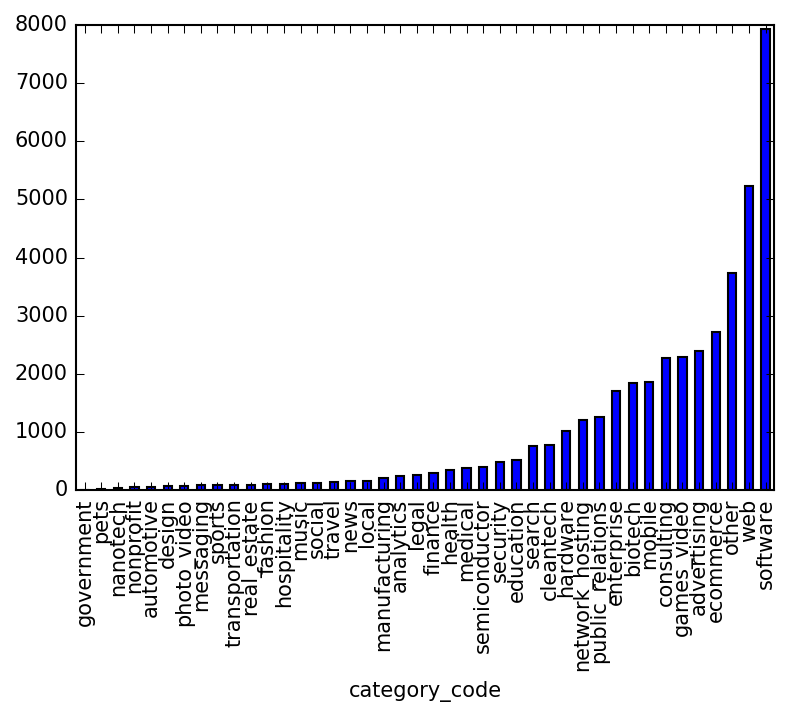

In [9]:
a.groupby('category_code').size().sort_values().plot(kind="bar")

As you can see, we have a fairly long tail.  
Let's try to consolidate some of these categories so that categories with similar product lifecycles are grouped together.

In [10]:
category = {'pets': 'other',
            'other': 'other',
            'government': 'other',
            'nanotech': 'other',
            'automotive': 'other',
            'local': 'other',
            'nonprofit': 'other',
            np.nan: 'other',
            'manufacturing': 'other',
            'travel': 'other',
            'transportation': 'other',
            'hospitality': 'other', 
            
            'consulting': 'service',
            'design': 'service',
            'real_estate': 'service',
            'public_relations': 'service',
            'network_hosting': 'service',
            
            'games_video': 'media',
            'photo_video': 'media',
            'music': 'media',
            'news': 'media',
            
            'sports': 'sports',
            
            'web': 'internet',
            'advertising': 'internet',
            'ecommerce': 'internet',
            'fashion': 'internet',
            
            'software': 'software',
            'mobile': 'software',
            'enterprise': 'software',
            
            'health': 'health',
            'biotech': 'health',
            'medical': 'health',
            
            'social': 'social',
            'messaging': 'social',
            
            'cleantech': 'cleantech',
            
            'semiconductor': 'hardware',
            'hardware': 'hardware',
            
            'analytics': 'analytics',
            
            'finance': 'fintech',
            
            'legal': 'legal',
            
            'education': 'edtech',
            
            'security': 'security',
            
            'search': 'search'}

category = pd.DataFrame(list(category.items()),
                        columns=['category_code','category'])
category.head()

category_code   category
0             NaN      other
1       analytics  analytics
2  transportation      other
3      automotive      other
4             web   internet

In [11]:
a = pd.merge(a, category, left_on='category_code', right_on='category_code', how = 'left')
a.drop(['category_code'], axis=1, inplace=True)
a.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech

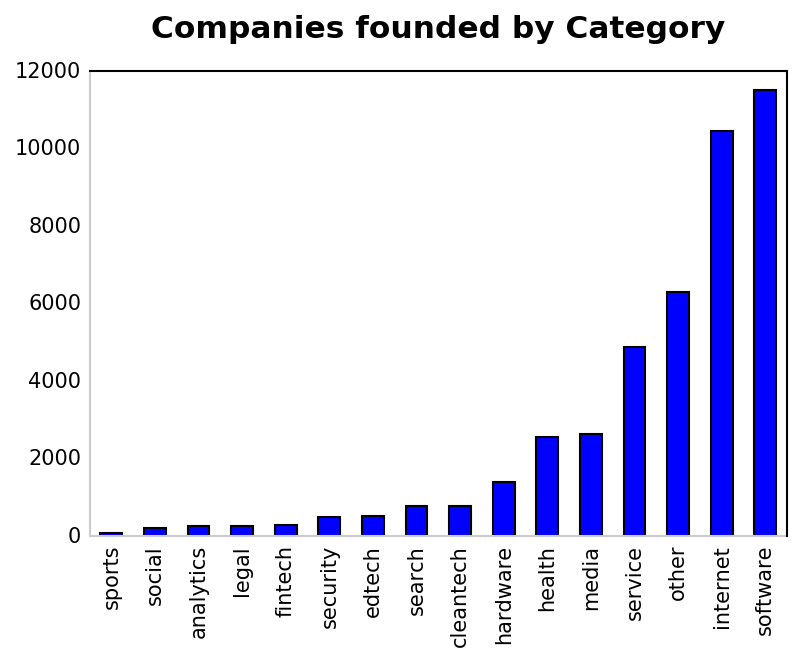

In [12]:
ax = a.groupby('category').size().sort_values().plot(kind="bar")

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Companies founded by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

That looks much better.  
Now let's have a look at how many companies are founded each year in our dataset.  

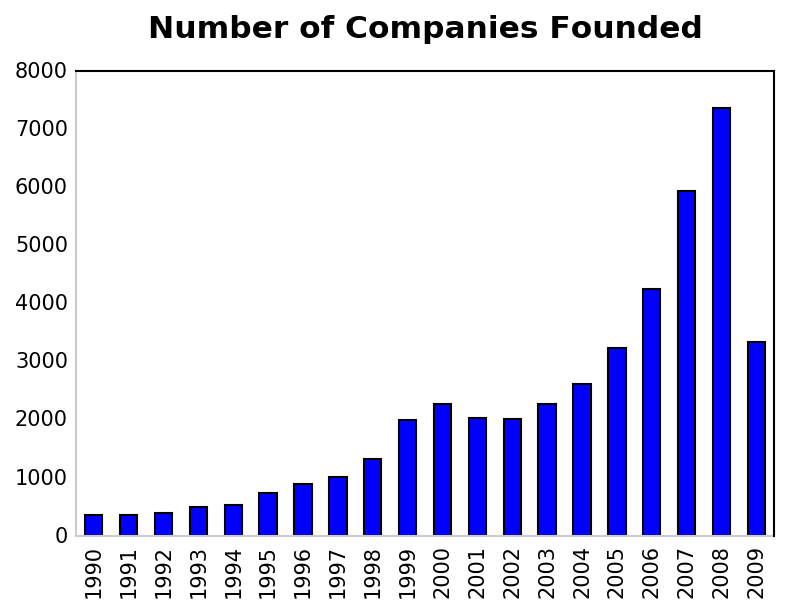

In [13]:
temp = a.groupby(by = [a.founded_at.dt.year]).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)
ax = temp.plot(x = 'founded_at', y = 'Amount', rot = 90, kind = 'bar')

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Number of Companies Founded", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

While the data appears to imply that entrepreneurship is a recent fad, you have to keep in mind the fact that CrunchBase itself was only founded in 2007. Its likely that data points before 2007 are significantly under represented.  

The dramatic drop in 2009 should also be interpreted cautiously. Since this data comes from a snapshot of the CrunchBase dataset back in December 2013, its likely that many founders of newer startups may not have yet listed their companies on CrunchBase. 

Lastly, let's see the distribution of companies between IPOs, acquisitions, closure and operating. 

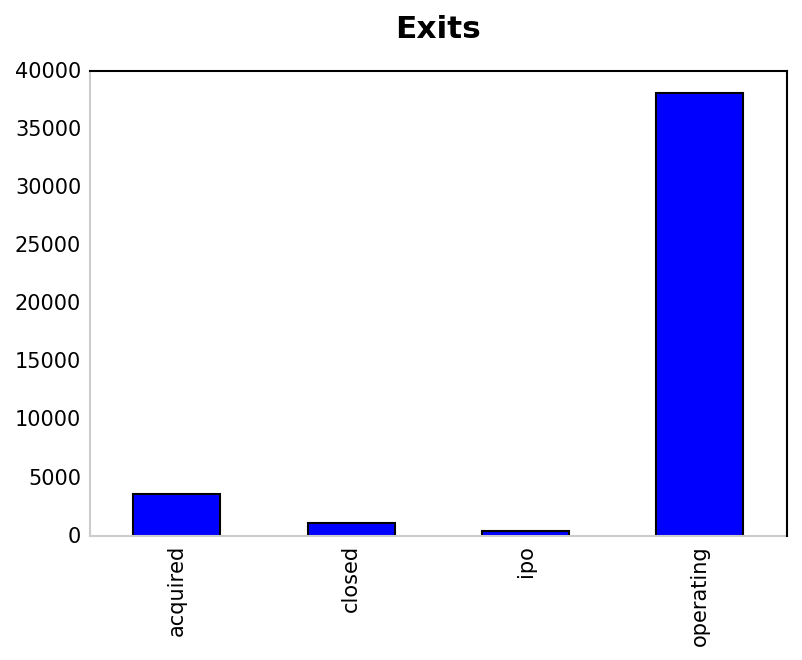

In [14]:
temp = a.groupby(by = [a.status]).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)
ax = temp.plot(x = 'status', y = 'Amount', rot = 90, kind = 'bar')

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Exits", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

The number of closed companies is likely to be highly underrepresented in our sample and a large portion of operating companies will likely classify as closed. While this would normally be a problem, for our purposes it does not matter since both operating companies and closed companies will be treated as negative outcomes. Our positive outcomes are those companies that have been acquired or IPO'd. 

What's immediately obvious from the above picture is that our data is significaly imbalanced. Generally speaking, machine learning techniques work best with balanced datasets. We'll have to keep this in mind when we get to that stage.  

Let's take a look at the data we've collected so far. 

In [15]:
# add to final dataset
all_data = a

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech

## Additional details

Choosing informative, discriminating and independent features is a crucial step for effective algorithms in classification. So far we've collected only 3 features about each startup; 
 * the year they were founded
 * which country they're based in and 
 * which category/sector they operate in

Before we try to get more data, we need to set up some code infrastructure. You see, CrunchBase has provided us with all the data that it has to date for each startup. However, we only want the data for each startup up till when reached 3 years of age. These next few pieces of code are aimed at setting up the infrastructure to do this easily.  

In [16]:
from dateutil.relativedelta import  relativedelta

age_lookup = a
age_lookup['cut_off_date'] = age_lookup.founded_at.apply(lambda x: x + relativedelta(years = age_cutoff))
age_lookup = age_lookup[['id', 
                         #'name', 
                         #'founded_at', 
                         'cut_off_date']]
age_lookup.head()

id cut_off_date
0      c:1   2008-10-17
1  c:10000   2011-07-26
2  c:10001   2011-07-26
3  c:10002   2010-06-27
4  c:10003   2011-08-20

In [17]:
def closest_date(df, date_col, object_id_col = 'object_id', lookup_table = age_lookup):
    df = pd.merge(df, lookup_table, how='left', left_on = object_id_col, right_on = 'id')
    df = df.sort_values(by = [object_id_col, date_col], ascending = True)
    df = df[df[date_col] < df['cut_off_date']]
    df = df.groupby(by = [object_id_col]).tail(1).drop(['id', 'cut_off_date', date_col], axis = 1)
    
    return(df)

Now that we've done that, we can start collecting additional details about each startup up until they reach 3 years of age.  

## Offices
Let's start by collecting office data. 

In [18]:
b = cb_offices
b.head()

id object_id  office_id   description   region            address1         address2           city zip_code state_code country_code   latitude   longitude  created_at  updated_at
0   1       c:1          1           NaN  Seattle    710 - 2nd Avenue       Suite 1100        Seattle    98104         WA          USA  47.603122 -122.333253         NaN         NaN
1   2       c:3          3  Headquarters   SF Bay     4900 Hopyard Rd        Suite 310     Pleasanton    94588         CA          USA  37.692934 -121.904945         NaN         NaN
2   3       c:4          4           NaN   SF Bay  135 Mississippi St              NaN  San Francisco    94107         CA          USA  37.764726 -122.394523         NaN         NaN
3   4       c:5          5  Headquarters   SF Bay    1601 Willow Road              NaN     Menlo Park    94025         CA          USA  37.416050 -122.151801         NaN         NaN
4   5       c:7          7           NaN   SF Bay           Suite 200  654 High Street      Palo Alto    94301         CA          ISR        NaN         NaN         NaN         NaN

In [19]:
# grab number of offices 
b = cb_offices.groupby(by = [cb_offices.object_id]).office_id.nunique().reset_index()
b.rename(columns={'office_id': 'offices'}, inplace=True)

b.head()

object_id  offices
0       c:1        2
1      c:10        1
2     c:100        1
3   c:10002        2
4   c:10003        1

In [20]:
# number of offices
all_data = pd.merge(all_data, b, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

all_data['offices'] = np.where((all_data.offices.isnull()), 1, all_data['offices'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0

Disappointingly, we don't have dates associated with office buildings.  
Using this data to predict whether a company will have a positive exit outcome would mean that future data will bleed into our dataset. Using future data to predict the future hardly sounds like a useful exercise. We'll need to remember to remove this data in a later step before we dive into machine learning. 

# Board, Employees & Founders

Next, lets collect data about the number of board members, employees and founders each startup has. 

In [21]:
c = cb_relationships
c.head()

id  relationship_id person_object_id relationship_object_id    start_at      end_at  is_past  sequence                                title           created_at           updated_at
0   1                1              p:2                    c:1         NaN         NaN        0         8    Co-Founder/CEO/Board of Directors  2007-05-25 07:03:54  2013-06-03 09:58:46
1   2                2              p:3                    c:1         NaN         NaN        1    279242                         VP Marketing  2007-05-25 07:04:16  2010-05-21 16:31:34
2   3                3              p:4                    c:3         NaN         NaN        0         4                           Evangelist  2007-05-25 19:33:03  2013-06-29 13:36:58
3   4                4              p:5                    c:3  2006-03-01  2009-12-01        1         4  Senior Director Strategic Alliances  2007-05-25 19:34:53  2013-06-29 10:25:34
4   6                6              p:7                    c:4  2005-07-01  2010-04-05        1         1              Chief Executive Officer  2007-05-25 20:05:33  2010-04-05 18:41:41

In [22]:
# grab number of founders, employees, board members
c = cb_relationships
c.start_at = pd.to_datetime(c.start_at)
c.end_at = pd.to_datetime(c.end_at)
c = c[['person_object_id', 'relationship_object_id', 'start_at','title']]

# if title is board member
c.loc[c["title"].str.contains('board', case=False, na=False), 'Category'] = 'board'

# otherwise if title includes founder
c.loc[c["title"].str.contains('founder', case=False, na=False), 'Category'] = 'founders'

# otherwise employee
c.loc[c.Category.isnull(), 'Category'] = 'employees'

# cut-off date function
c_temp = c
c = closest_date(c, date_col='start_at', object_id_col='relationship_object_id')

# spread values
c = c.groupby(by = [c.relationship_object_id, c.Category]).person_object_id.nunique().reset_index()
c.rename(columns={'person_object_id': 'count'}, inplace=True)
c = c.pivot_table(index='relationship_object_id', columns='Category', values='count').reset_index()

c_temp = c_temp.groupby(by = ['relationship_object_id', 'Category']).person_object_id.nunique().reset_index()

# founders should have been there from the beginning technically so we don't want to apply cut-off function there
c = c.drop('founders', axis=1)
c1 = cb_relationships
c1 = c1[['person_object_id', 'relationship_object_id', 'start_at','title']]

c1.loc[c1["title"].str.contains('founder', case=False, na=False), 'Category'] = 'founders'

c1 = c1.groupby(by = ['relationship_object_id', 'Category']).person_object_id.nunique().reset_index()
c1.rename(columns={'person_object_id': 'count'}, inplace=True)
c1 = c1.pivot_table(index='relationship_object_id', columns='Category', values='count').reset_index()

# bring founders together with employees and board
c = pd.merge(c, c1, how='outer', left_on = 'relationship_object_id', right_on = 'relationship_object_id')

c.head()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Category relationship_object_id  board  employees  founders
0                           c:1    1.0        NaN       2.0
1                        c:1001    NaN        1.0       4.0
2                       c:10011    NaN        NaN       1.0
3                       c:10014    NaN        1.0       1.0
4                       c:10015    NaN        1.0       1.0

In [23]:
# add number of founders, employees, board members to all_data
all_data = pd.merge(all_data, c, how='left', left_on = 'id', right_on = 'relationship_object_id')
all_data.drop('relationship_object_id', axis=1, inplace=True)

# this is to replace some NULLS in board and employees columns with 0 because at 3 years of age most companies won't have put up information about board and employees on CrunchBase if they had none.
all_data['board'] = np.where((all_data.board.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='board'), 0, all_data['board'])
all_data['employees'] = np.where((all_data.employees.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='employees'), 0, all_data['employees'])
#all_data['founders'] = np.where((all_data.founders.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='founders'), 1, all_data['founders'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN

# Milestones

Next, let's grab data about the number of milestones each startup has achieved.  
A milestone, upon investigaton, tends to be each time a startup has been mentioned in the news for whatever achievement it's managed to do (or not do). Note, that this can just as easily be a technological milestones as a funding milestone. 

In [24]:
d = cb_milestones 
d.head()

id object_id milestone_at milestone_code                                        description                                         source_url                                 source_description           created_at           updated_at
0   1      c:12   2008-06-09          other                       Survives iPhone 3G Stevenote  http://www.techcrunch.com/2008/06/10/twitter-f...          Twitter Fails To Fail, Community Rejoices  2008-06-18 08:14:06  2008-06-18 08:14:06
1   2    c:3138   2008-06-17          other  Twhirl announces support for Seesmic video pla...  http://www.inquisitr.com/1103/seesmic-now-avai...                    Seesmic Now Available In Twhirl  2008-06-18 08:46:28  2008-06-18 08:46:28
2   3      c:59   2008-06-18          other  More than 4 Billion videos viewed at Google Si...  http://www.comscore.com/press/release.asp?pres...  11 Billion Videos Viewed Online in the U.S. in...  2008-06-18 08:50:24  2008-06-18 08:50:24
3   4     c:314   2008-06-18          other                            Reddit goes Open Source  http://blog.reddit.com/2008/06/reddit-goes-ope...                            reddit goes open source  2008-06-19 04:14:00  2008-06-19 04:14:00
4   5     c:314   2008-01-22          other        Adds the ability to create your own Reddits  http://www.techcrunch.com/2008/01/22/reddit-ad...  Reddit Adds Ability to Create Your Own â€œRedd...  2008-06-19 04:15:53  2008-06-19 04:15:53

In [25]:
d = cb_milestones
d_temp = d

d.milestone_at = pd.to_datetime(d.milestone_at)
d = d.groupby(by = ['object_id', 'milestone_at']).id.nunique().groupby(level=[0]).cumsum().reset_index()
d.rename(columns={'id': 'milestones'}, inplace=True)

# cut-off date function
d = closest_date(d, 'milestone_at')

d.head(10)
#d_temp.head()

object_id  milestones
3    c:10009           1
5     c:1001           2
6    c:10014           1
15   c:10071           2
18   c:10082           3
23   c:10106           1
30   c:10150           6
60   c:10176           8
62   c:10179           1
82  c:102682           1

In [26]:
# add number of milestones
all_data = pd.merge(all_data, d, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have achieved any milestones by that time but do later on
all_data['milestones'] = np.where((all_data.milestones.isnull()) & all_data.id.isin(d_temp.object_id), 0, all_data['milestones'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN

# Number of funding events

Next we collect data about the number of funding events each company has had.  
My hypothesis is that those companies taht receive funding early are more likely to be those that achieve a positive exit later on.  

In [27]:
e = cb_funding_rounds
e.head()

id  funding_round_id object_id   funded_at funding_round_type funding_round_code  raised_amount_usd  raised_amount raised_currency_code  pre_money_valuation_usd  pre_money_valuation pre_money_currency_code  post_money_valuation_usd  post_money_valuation post_money_currency_code  participants  is_first_round  is_last_round                                         source_url                                 source_description        created_by           created_at           updated_at
0   1                 1       c:4  2006-12-01           series-b                  b          8500000.0      8500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.marketingvox.com/archives/2006/12/2...                                                NaN  initial-importer  2007-07-04 04:52:57  2008-02-27 23:14:29
1   2                 2       c:5  2004-09-01              angel              angel           500000.0       500000.0                  USD                      NaN                  NaN                     USD                       NaN                   NaN                      USD             2               0              1                                                NaN                                                NaN  initial-importer  2007-05-27 06:08:18  2013-06-28 20:07:23
2   3                 3       c:5  2005-05-01           series-a                  a         12700000.0     12700000.0                  USD              115000000.0          115000000.0                     USD                       NaN                   NaN                      USD             3               0              0  http://www.techcrunch.com/2007/11/02/jim-breye...  Jim Breyer: Extra $500 Million Round For Faceb...  initial-importer  2007-05-27 06:09:10  2013-06-28 20:07:23
3   4                 4       c:5  2006-04-01           series-b                  b         27500000.0     27500000.0                  USD              525000000.0          525000000.0                     USD                       NaN                   NaN                      USD             4               0              0   http://www.facebook.com/press/info.php?factsheet                                   Facebook Funding  initial-importer  2007-05-27 06:09:36  2013-06-28 20:07:24
4   5                 5    c:7299  2006-05-01           series-b                  b         10500000.0     10500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.techcrunch.com/2006/05/14/photobuck...    PhotoBucket Closes $10.5M From Trinity Ventures  initial-importer  2007-05-29 11:05:59  2008-04-16 17:09:12

In [28]:
# Number of funding events
e = cb_funding_rounds
e_temp = e

e.funded_at = pd.to_datetime(e.funded_at)
e = e.groupby(by = ['object_id', 'funded_at']).funding_round_id.nunique().groupby(level=[0]).cumsum().reset_index()
e.rename(columns={'funding_round_id': 'funding_events'}, inplace=True)

# cut-off date function
e = closest_date(e, 'funded_at')

e.head()

object_id  funding_events
2        c:1               3
3     c:1001               1
4    c:10014               1
6    c:10015               2
13   c:10018               1

In [29]:
# add number of funding events to all_data
all_data = pd.merge(all_data, e, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have had any funding events by that time but do so later
all_data['funding_events'] = np.where((all_data.funding_events.isnull()) & all_data.id.isin(e_temp.object_id), 0, all_data['funding_events'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN

# Total raised to date

Next we collect data about the total funding amount raised by each company when they were 3 years old.  
My hypothesis is that those companies that those companies which receieved more are more likely to be those that achieve a positive exit later on.  

In [30]:
f = cb_funding_rounds
f.head()

id  funding_round_id object_id  funded_at funding_round_type funding_round_code  raised_amount_usd  raised_amount raised_currency_code  pre_money_valuation_usd  pre_money_valuation pre_money_currency_code  post_money_valuation_usd  post_money_valuation post_money_currency_code  participants  is_first_round  is_last_round                                         source_url                                 source_description        created_by           created_at           updated_at
0   1                 1       c:4 2006-12-01           series-b                  b          8500000.0      8500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.marketingvox.com/archives/2006/12/2...                                                NaN  initial-importer  2007-07-04 04:52:57  2008-02-27 23:14:29
1   2                 2       c:5 2004-09-01              angel              angel           500000.0       500000.0                  USD                      NaN                  NaN                     USD                       NaN                   NaN                      USD             2               0              1                                                NaN                                                NaN  initial-importer  2007-05-27 06:08:18  2013-06-28 20:07:23
2   3                 3       c:5 2005-05-01           series-a                  a         12700000.0     12700000.0                  USD              115000000.0          115000000.0                     USD                       NaN                   NaN                      USD             3               0              0  http://www.techcrunch.com/2007/11/02/jim-breye...  Jim Breyer: Extra $500 Million Round For Faceb...  initial-importer  2007-05-27 06:09:10  2013-06-28 20:07:23
3   4                 4       c:5 2006-04-01           series-b                  b         27500000.0     27500000.0                  USD              525000000.0          525000000.0                     USD                       NaN                   NaN                      USD             4               0              0   http://www.facebook.com/press/info.php?factsheet                                   Facebook Funding  initial-importer  2007-05-27 06:09:36  2013-06-28 20:07:24
4   5                 5    c:7299 2006-05-01           series-b                  b         10500000.0     10500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.techcrunch.com/2006/05/14/photobuck...    PhotoBucket Closes $10.5M From Trinity Ventures  initial-importer  2007-05-29 11:05:59  2008-04-16 17:09:12

In [31]:
# Total raised to date
f = cb_funding_rounds
f_temp = f

f.funded_at = pd.to_datetime(f.funded_at)
f = f.groupby(by = ['object_id', 'funded_at']).raised_amount_usd.sum().groupby(level=[0]).cumsum().reset_index()
f.rename(columns={'raised_amount_usd': 'total_raised_to_date'}, inplace=True)

# cut-off date function
f = closest_date(f, 'funded_at')

f['total_raised_to_date'] = np.where(f.total_raised_to_date.isnull(), 0 , f['total_raised_to_date'])

f.head()

object_id  total_raised_to_date
2        c:1            39750000.0
3     c:1001             5000000.0
4    c:10014                   0.0
6    c:10015            11000000.0
13   c:10018             8000000.0

In [32]:
# add total raised to date
all_data = pd.merge(all_data, f, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have raised any funding by that time but do so later on
all_data['total_raised_to_date'] = np.where((all_data.total_raised_to_date.isnull()) & all_data.id.isin(f_temp.object_id), 0, all_data['total_raised_to_date'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events  total_raised_to_date
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0            39750000.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN                   NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN                   NaN

# Last raised amount

Next we collect data about the amount of funding last raised by each company when they were 3 years old.  
My hypothesis is that those companies that those companies that raised more are more likely to be those that achieve a positive exit later on.  

In [33]:
g = cb_funding_rounds
g.head()

id  funding_round_id object_id  funded_at funding_round_type funding_round_code  raised_amount_usd  raised_amount raised_currency_code  pre_money_valuation_usd  pre_money_valuation pre_money_currency_code  post_money_valuation_usd  post_money_valuation post_money_currency_code  participants  is_first_round  is_last_round                                         source_url                                 source_description        created_by           created_at           updated_at
0   1                 1       c:4 2006-12-01           series-b                  b          8500000.0      8500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.marketingvox.com/archives/2006/12/2...                                                NaN  initial-importer  2007-07-04 04:52:57  2008-02-27 23:14:29
1   2                 2       c:5 2004-09-01              angel              angel           500000.0       500000.0                  USD                      NaN                  NaN                     USD                       NaN                   NaN                      USD             2               0              1                                                NaN                                                NaN  initial-importer  2007-05-27 06:08:18  2013-06-28 20:07:23
2   3                 3       c:5 2005-05-01           series-a                  a         12700000.0     12700000.0                  USD              115000000.0          115000000.0                     USD                       NaN                   NaN                      USD             3               0              0  http://www.techcrunch.com/2007/11/02/jim-breye...  Jim Breyer: Extra $500 Million Round For Faceb...  initial-importer  2007-05-27 06:09:10  2013-06-28 20:07:23
3   4                 4       c:5 2006-04-01           series-b                  b         27500000.0     27500000.0                  USD              525000000.0          525000000.0                     USD                       NaN                   NaN                      USD             4               0              0   http://www.facebook.com/press/info.php?factsheet                                   Facebook Funding  initial-importer  2007-05-27 06:09:36  2013-06-28 20:07:24
4   5                 5    c:7299 2006-05-01           series-b                  b         10500000.0     10500000.0                  USD                      NaN                  NaN                     NaN                       NaN                   NaN                      NaN             2               0              0  http://www.techcrunch.com/2006/05/14/photobuck...    PhotoBucket Closes $10.5M From Trinity Ventures  initial-importer  2007-05-29 11:05:59  2008-04-16 17:09:12

In [34]:
# last raised amount
g = cb_funding_rounds
g_temp = g

g.funded_at = pd.to_datetime(g.funded_at)

g = g.sort_values(by = ['object_id', 'funded_at'], ascending = True)
g = g.groupby(by = ['object_id', 'funded_at']).head(1).reset_index(drop=True)
g = g[['object_id', 'funded_at', 'raised_amount_usd']]
g.rename(columns={'raised_amount_usd': 'last_raised_amount'}, inplace=True)

# cut-off date function
g = closest_date(g, 'funded_at')

g['last_raised_amount'] = np.where(g.last_raised_amount.isnull(), 0 , g['last_raised_amount'])

g.head()

object_id  last_raised_amount
2        c:1          25000000.0
3     c:1001           5000000.0
4    c:10014                 0.0
6    c:10015           9000000.0
13   c:10018           8000000.0

In [35]:
# add last raised amount
all_data = pd.merge(all_data, g, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have raised any funding by that time but do so later on
all_data['last_raised_amount'] = np.where((all_data.last_raised_amount.isnull()) & all_data.id.isin(g_temp.object_id), 0, all_data['last_raised_amount'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0            39750000.0          25000000.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN                   NaN                 NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN

# Top VC backing

Next we collect data about how many top VCs have invested in a given company by the time the company reached 3 years of age.  
My hypothesis is that those companies that have received backing from a top VC are more are more likely to be those that achieve a positive exit later on.  

I use this list of 108 top VCs (sourced from Wikipedia), as another feature. 

In [36]:
# list of 108 top venture capital firms
# Comes from https://en.wikipedia.org/wiki/List_of_venture_capital_firms
# this list is likely biased to the USA, which is fine since I'm only looking at startups in the USA anyway
temp = ['3i Group',
'Advanced Technology Ventures',
'Accel Partners',
'Andreessen Horowitz',
'Atlas Venture',
'Atomico',
'August Capital',
'Austin Ventures',
'Avalon Ventures',
'Azure Capital Partners',
'Bain Capital Ventures',
'Balderton Capital',
'Battery Ventures',
'Benchmark',
'Bessemer Venture Partners',
'Binary Capital',
'BitChemy Ventures',
'Black Coral Capital',
'Canvas Venture Fund',
'Carmel Ventures',
'Charles River Ventures',
'Clearstone Venture Partners',
'Columbus Nova Technology Partners',
'Costanoa Venture Capital',
'Crosslink Capital',
'CrunchFund',
'DAG Ventures',
'Data Collective',
'Digital Sky Technologies',
'Draper Fisher Jurvetson (DFJ)',
'Elevation Partners',
'ff Venture Capital',
'Fidelity Ventures',
'FirstMark Capital',
'First Round Capital',
'Flybridge Capital Partners',
'Foundation Capital',
'Founders Fund',
'Galen Partners',
'General Catalyst Partners',
'Genesis Partners',
'Golden Gate Ventures',
'GGV Capital',
'Google Ventures',
'Granite Ventures',
'Greylock Partners',
'Harris & Harris Group',
'HealthCap',
'Highland Capital Partners',
'Horizons Ventures',
'IDG Ventures',
'Initialized Capital',
'Iona Capital',
'In-Q-Tel',
'Index Ventures',
'Innovacom',
'Insight Venture Partners',
'Intel Capital',
'Intellectual Ventures',
'Institutional Venture Partners',
'Internet Capital Group',
'Inventus Capital Partners',
'Israel Cleantech Ventures',
'Jerusalem Venture Partners',
'JMI Equity',
'Kapor Capital',
'Kleiner Perkins Caufield & Byers',
'Khosla Ventures',
'Lightspeed Venture Partners',
'Lux Capital',
'Matrix Partners',
'Maveron',
'Mayfield Fund',
'Menlo Ventures',
'Meritech Capital Partners',
'Morgenthaler Ventures',
'New Enterprise Associates',
'Nexit Ventures',
'Norwest Venture Partners',
'Oak Investment Partners',
'Oregon Angel Fund',
'OpenView Venture Partners',
'Polaris Partners',
'Quicksilver Ventures',
'Radius Ventures',
'Redpoint Ventures',
'Revolution',
'Rho Ventures',
'RRE Ventures',
'Rothenberg Ventures',
'Sante Ventures',
'Scale Venture Partners',
'Shenzhen Capital Group',
'Scottish Equity Partners',
'Sequoia Capital',
'Seventure Partners',
'Sevin Rosen Funds',
'Social Capital',
'Sofinnova Ventures',
'SoftTech VC',
'Spark Capital',
'Tenaya Capital',
'Third Rock Ventures',
'Union Square Ventures',
'US Venture Partners',
'VantagePoint Capital Partners',
'Venrock',
'Wellington Partners']

In [37]:
h = cb_investments
h.head()

id  funding_round_id funded_object_id investor_object_id           created_at           updated_at
0   1                 1              c:4                f:1  2007-07-04 04:52:57  2008-02-27 23:14:29
1   2                 1              c:4                f:2  2007-07-04 04:52:57  2008-02-27 23:14:29
2   3                 3              c:5                f:4  2007-05-27 06:09:10  2013-06-28 20:07:23
3   4                 4              c:5                f:1  2007-05-27 06:09:36  2013-06-28 20:07:24
4   5                 4              c:5                f:5  2007-05-27 06:09:36  2013-06-28 20:07:24

In [38]:
h = cb_investments
h = h[['funding_round_id', 'investor_object_id', 'funded_object_id']]

# add funding round date
temp1 = cb_funding_rounds

temp1.funded_at = pd.to_datetime(temp1.funded_at)

temp1 = temp1[['funding_round_id', 'funded_at']]
h = pd.merge(h, temp1, how='left', left_on = 'funding_round_id', right_on = 'funding_round_id')

h.head()

# Grab VC name
temp1 = cb_objects
temp1 = temp1[temp1['entity_type']=='FinancialOrg']
temp1 = temp1[['id', 'name']]
temp1.head()

h = pd.merge(h, temp1, how='left', left_on = 'investor_object_id', right_on = 'id')
h.drop(['id'], axis=1, inplace=True)
h.rename(columns={'name': 'funder_name'}, inplace=True)

h_temp = h

h['top_vc_backed'] = np.where(h.funder_name.isin(temp), 1, 0)
h = h[h.top_vc_backed==1]

h = h[['funded_object_id', 'funded_at', 'investor_object_id', 'funder_name', 'top_vc_backed']]

# There's two ways to go about this.

# Option #1
# Counts the number of unique top VC's that have backed the startup by each date
h = h.groupby(by = ['funded_at', 'funded_object_id']).investor_object_id.nunique().groupby(level=[0]).cumsum().reset_index()
h.rename(columns={'investor_object_id': 'top_vc_backed'}, inplace=True)

# Option #2
# Counts the total number of times a top VC has invested in a startup by each date
#h = h.groupby(by = ['funded_object_id', 'funded_at']).investor_object_id.nunique().groupby(level=[0]).cumsum().reset_index()

h = h.sort_values(by = ['funded_object_id', 'funded_at'])

# cut-off date function
h = closest_date(h, date_col = 'funded_at', object_id_col = 'funded_object_id')

h.head(10)
#h_temp.head()

funded_object_id  top_vc_backed
1               c:1              2
2            c:1001              1
4           c:10015              1
10          c:10054              2
18           c:1010              1
25          c:10159              3
28          c:10161              1
33          c:10176              3
36          c:10179              2
40           c:1019              2

In [39]:
# To see which top funders do not appear in our dataset at all
i = cb_investments
i = i[['funding_round_id', 'investor_object_id', 'funded_object_id']]

# add funding round date
temp1 = cb_funding_rounds

temp1.funded_at = pd.to_datetime(temp1.funded_at)

temp1 = temp1[['funding_round_id', 'funded_at']]
i = pd.merge(i, temp1, how='left', left_on = 'funding_round_id', right_on = 'funding_round_id')

# Grab VC name
temp1 = cb_objects
temp1 = temp1[temp1['entity_type']=='FinancialOrg']
temp1 = temp1[['id', 'name']]
temp1.head()

i = pd.merge(i, temp1, how='left', left_on = 'investor_object_id', right_on = 'id')
i.drop(['id'], axis=1, inplace=True)
i.rename(columns={'name': 'funder_name'}, inplace=True)

def temp_func(row):
    if row['funder_name'] in temp:
        return 1
    else:
        return 0

i['top_vc_backed'] = i.apply(temp_func, axis=1)

i = i['funder_name'].reset_index().drop_duplicates(subset='funder_name')
i['abc'] = 'yes'

temp1 = pd.DataFrame(temp)
temp1.rename(columns={0: 'funder_name'}, inplace=True)
temp1 = pd.merge(temp1, i, how='left', left_on='funder_name', right_on='funder_name')
temp1 = temp1[temp1.abc.isnull()]
temp1

funder_name  index  abc
15         Binary Capital    NaN  NaN
16      BitChemy Ventures    NaN  NaN
52           Iona Capital    NaN  NaN
58  Intellectual Ventures    NaN  NaN
86             Revolution    NaN  NaN

In [40]:
# add top VC backing
all_data = pd.merge(all_data, h, how='left', left_on = 'id', right_on = 'funded_object_id')
all_data.drop('funded_object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have received backing from a top VC by that time but do so later on
all_data['top_vc_backed'] = np.where((all_data.top_vc_backed.isnull()) & all_data.id.isin(h_temp.funded_object_id), 0, all_data['top_vc_backed'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0            39750000.0          25000000.0            2.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN                   NaN                 NaN            NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN

# TechCrunch articles

Next we grab data about the number of techcrunch articles a company has had written about it by the time they were 3 years old.  
My hypothesis is that those companies that have had a techcrunch article written about them are more likely to be those that achieve a positive exit later on.  

In [41]:
i  = cb_milestones
i.head()

id object_id milestone_at milestone_code                                        description                                         source_url                                 source_description           created_at           updated_at
0   1      c:12   2008-06-09          other                       Survives iPhone 3G Stevenote  http://www.techcrunch.com/2008/06/10/twitter-f...          Twitter Fails To Fail, Community Rejoices  2008-06-18 08:14:06  2008-06-18 08:14:06
1   2    c:3138   2008-06-17          other  Twhirl announces support for Seesmic video pla...  http://www.inquisitr.com/1103/seesmic-now-avai...                    Seesmic Now Available In Twhirl  2008-06-18 08:46:28  2008-06-18 08:46:28
2   3      c:59   2008-06-18          other  More than 4 Billion videos viewed at Google Si...  http://www.comscore.com/press/release.asp?pres...  11 Billion Videos Viewed Online in the U.S. in...  2008-06-18 08:50:24  2008-06-18 08:50:24
3   4     c:314   2008-06-18          other                            Reddit goes Open Source  http://blog.reddit.com/2008/06/reddit-goes-ope...                            reddit goes open source  2008-06-19 04:14:00  2008-06-19 04:14:00
4   5     c:314   2008-01-22          other        Adds the ability to create your own Reddits  http://www.techcrunch.com/2008/01/22/reddit-ad...  Reddit Adds Ability to Create Your Own â€œRedd...  2008-06-19 04:15:53  2008-06-19 04:15:53

In [42]:
from urllib.parse import urlparse

# number of techcrunch articles
i  = cb_milestones

i.milestone_at = pd.to_datetime(i.milestone_at)

i = i[['milestone_at', 'object_id', 'source_url']]

i_temp = i

i['valid_url'] = i['source_url'].isnull()

def temp_func(row):
    if row['valid_url']:
        return np.nan
    else: 
        parsed_uri = urlparse(row['source_url'])
        domain = '{uri.scheme}://{uri.netloc}/'.format(uri = parsed_uri)
        return domain

i['source'] = i.apply(temp_func, axis=1)

i = i[i.source.str.contains(pat = 'techcrunch', case = False)==True]
i = i.drop_duplicates()
i = i.groupby(by = ['object_id', 'milestone_at']).size().groupby(level=[0]).cumsum().reset_index()
i.rename(columns={0: 'tc_articles'}, inplace=True)

# cut-off date function
i = closest_date(i, date_col = 'milestone_at')

i.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


object_id  tc_articles
0     c:1001            1
1    c:10014            1
4    c:10176            3
13   c:10376            1
15   c:10400            1

In [43]:
# add number companies founded previously by company founders
all_data = pd.merge(all_data, i, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have had any tc articles by that time but do so later on
all_data['tc_articles'] = np.where((all_data.tc_articles.isnull()) & all_data.id.isin(i_temp.object_id), 0, all_data['tc_articles'])

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed  tc_articles
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0            39750000.0          25000000.0            2.0          0.0
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN                   NaN                 NaN            NaN          NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN

# Companies founded

Next we collect data about the number of companies founded by founders of a given company prior to the given company.  
My hypothesis is that those companies founded by more experienced founders are more likely to achieve a positive exit later on.  

In [44]:
k = cb_relationships
k.head()

id  relationship_id person_object_id relationship_object_id   start_at     end_at  is_past  sequence                                title           created_at           updated_at
0   1                1              p:2                    c:1        NaT        NaT        0         8    Co-Founder/CEO/Board of Directors  2007-05-25 07:03:54  2013-06-03 09:58:46
1   2                2              p:3                    c:1        NaT        NaT        1    279242                         VP Marketing  2007-05-25 07:04:16  2010-05-21 16:31:34
2   3                3              p:4                    c:3        NaT        NaT        0         4                           Evangelist  2007-05-25 19:33:03  2013-06-29 13:36:58
3   4                4              p:5                    c:3 2006-03-01 2009-12-01        1         4  Senior Director Strategic Alliances  2007-05-25 19:34:53  2013-06-29 10:25:34
4   6                6              p:7                    c:4 2005-07-01 2010-04-05        1         1              Chief Executive Officer  2007-05-25 20:05:33  2010-04-05 18:41:41

In [45]:
k = cb_relationships

k.loc[k["title"].str.contains('founder', case=False, na=False), 'category'] = 'founder'

k = k[k['category']=='founder']
k = k[['person_object_id', 'relationship_object_id', 'start_at', 'category']]
k = k.drop_duplicates()

temp = k[['person_object_id', 'start_at', 'relationship_object_id']]
temp.rename(columns={'relationship_object_id': 'assoc_company'}, inplace=True)

k = pd.merge(k, temp, how='left', left_on = 'person_object_id', right_on = 'person_object_id')

k['remove'] = np.where(k.relationship_object_id==k.assoc_company, 'same', 'different')
k = k[k['remove']=='different']

k['companies_founded_previously'] = np.nan
k.loc[k.start_at_y < k.start_at_x, 'companies_founded_previously'] = 1
k.loc[k.start_at_y > k.start_at_x, 'companies_founded_previously'] = 0
k.loc[k.start_at_x.isnull(), 'companies_founded_previously'] = np.nan
k.loc[k.start_at_y.isnull(), 'companies_founded_previously'] = np.nan

k_temp = k
k = k[k.companies_founded_previously.notnull()]

k = k.groupby(by = ['relationship_object_id']).companies_founded_previously.sum().reset_index()

k.head(10)
k_temp.head()

//anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


person_object_id relationship_object_id start_at_x category start_at_y assoc_company     remove  companies_founded_previously
1               p:2                    c:1        NaT  founder        NaT        c:4993  different                           NaN
4              p:11                    c:5        NaT  founder        NaT       c:28718  different                           NaN
6              p:14                    c:5 1993-07-04  founder        NaT       c:62802  different                           NaN
10             p:30                    c:9 2006-06-01  founder 2008-09-01       c:10176  different                           0.0
12             p:39                   c:10 2006-05-01  founder 2009-01-01       c:36218  different                           0.0

In [46]:
# add number companies founded previously by company founders
all_data = pd.merge(all_data, k, how='left', left_on = 'id', right_on = 'relationship_object_id')
all_data.drop('relationship_object_id', axis=1, inplace=True)

all_data.head()

id entity_type                    name     status founded_at        country_code             city twitter_username                   homepage_url   category cut_off_date  offices  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed  tc_articles  companies_founded_previously
0      c:1     Company                Wetpaint  operating 2005-10-17                 USA          Seattle  BachelrWetpaint        http://wetpaint-inc.com   internet   2008-10-17      2.0    1.0        NaN       2.0         0.0             3.0            39750000.0          25000000.0            2.0          0.0                           NaN
1  c:10000     Company                 MYWEBBO  operating 2008-07-26     Unknown_country     Unknown_city              NaN         http://www.mywebbo.com    service   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN
2  c:10001     Company      THE Movie Streamer  operating 2008-07-26     Unknown_country     Unknown_city              NaN    http://themoviestreamer.com      media   2011-07-26      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN
3  c:10002     Company          Synergie Media  operating 2007-06-27  Irrelevant_country  Irrelevant_city              NaN  http://www.synergie-media.com   internet   2010-06-27      2.0    NaN        NaN       1.0         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN
4  c:10003     Company  Green Basti Ecosystems  operating 2008-08-20                 IND  Irrelevant_city              NaN                            NaN  cleantech   2011-08-20      1.0    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN

That's it!  
We've collected all the data we can from just CrunchBase. 

Future potential improvements in this section could be to: 
 * Use twitter data (e.g. number of follower) to add additional features (depends on if you can get timestamp data)
 * Clean up the region data to get it into a more useful format

# Dataset description

Let's take a look at how much data we've collected so far. 

In [47]:
# get rid of these columns as these are not features we will use for machine learning
all_data = all_data.drop(['entity_type', 'name', 'twitter_username', 'homepage_url', 'offices'], axis=1)
all_data = all_data[all_data['category'].notnull()]
all_data = all_data.drop('cut_off_date', axis = 1)

In [48]:
len(all_data)

43298

That's a good sized sample.  

Now, lets take a look at the problem all public datasets suffer from; missing data. 

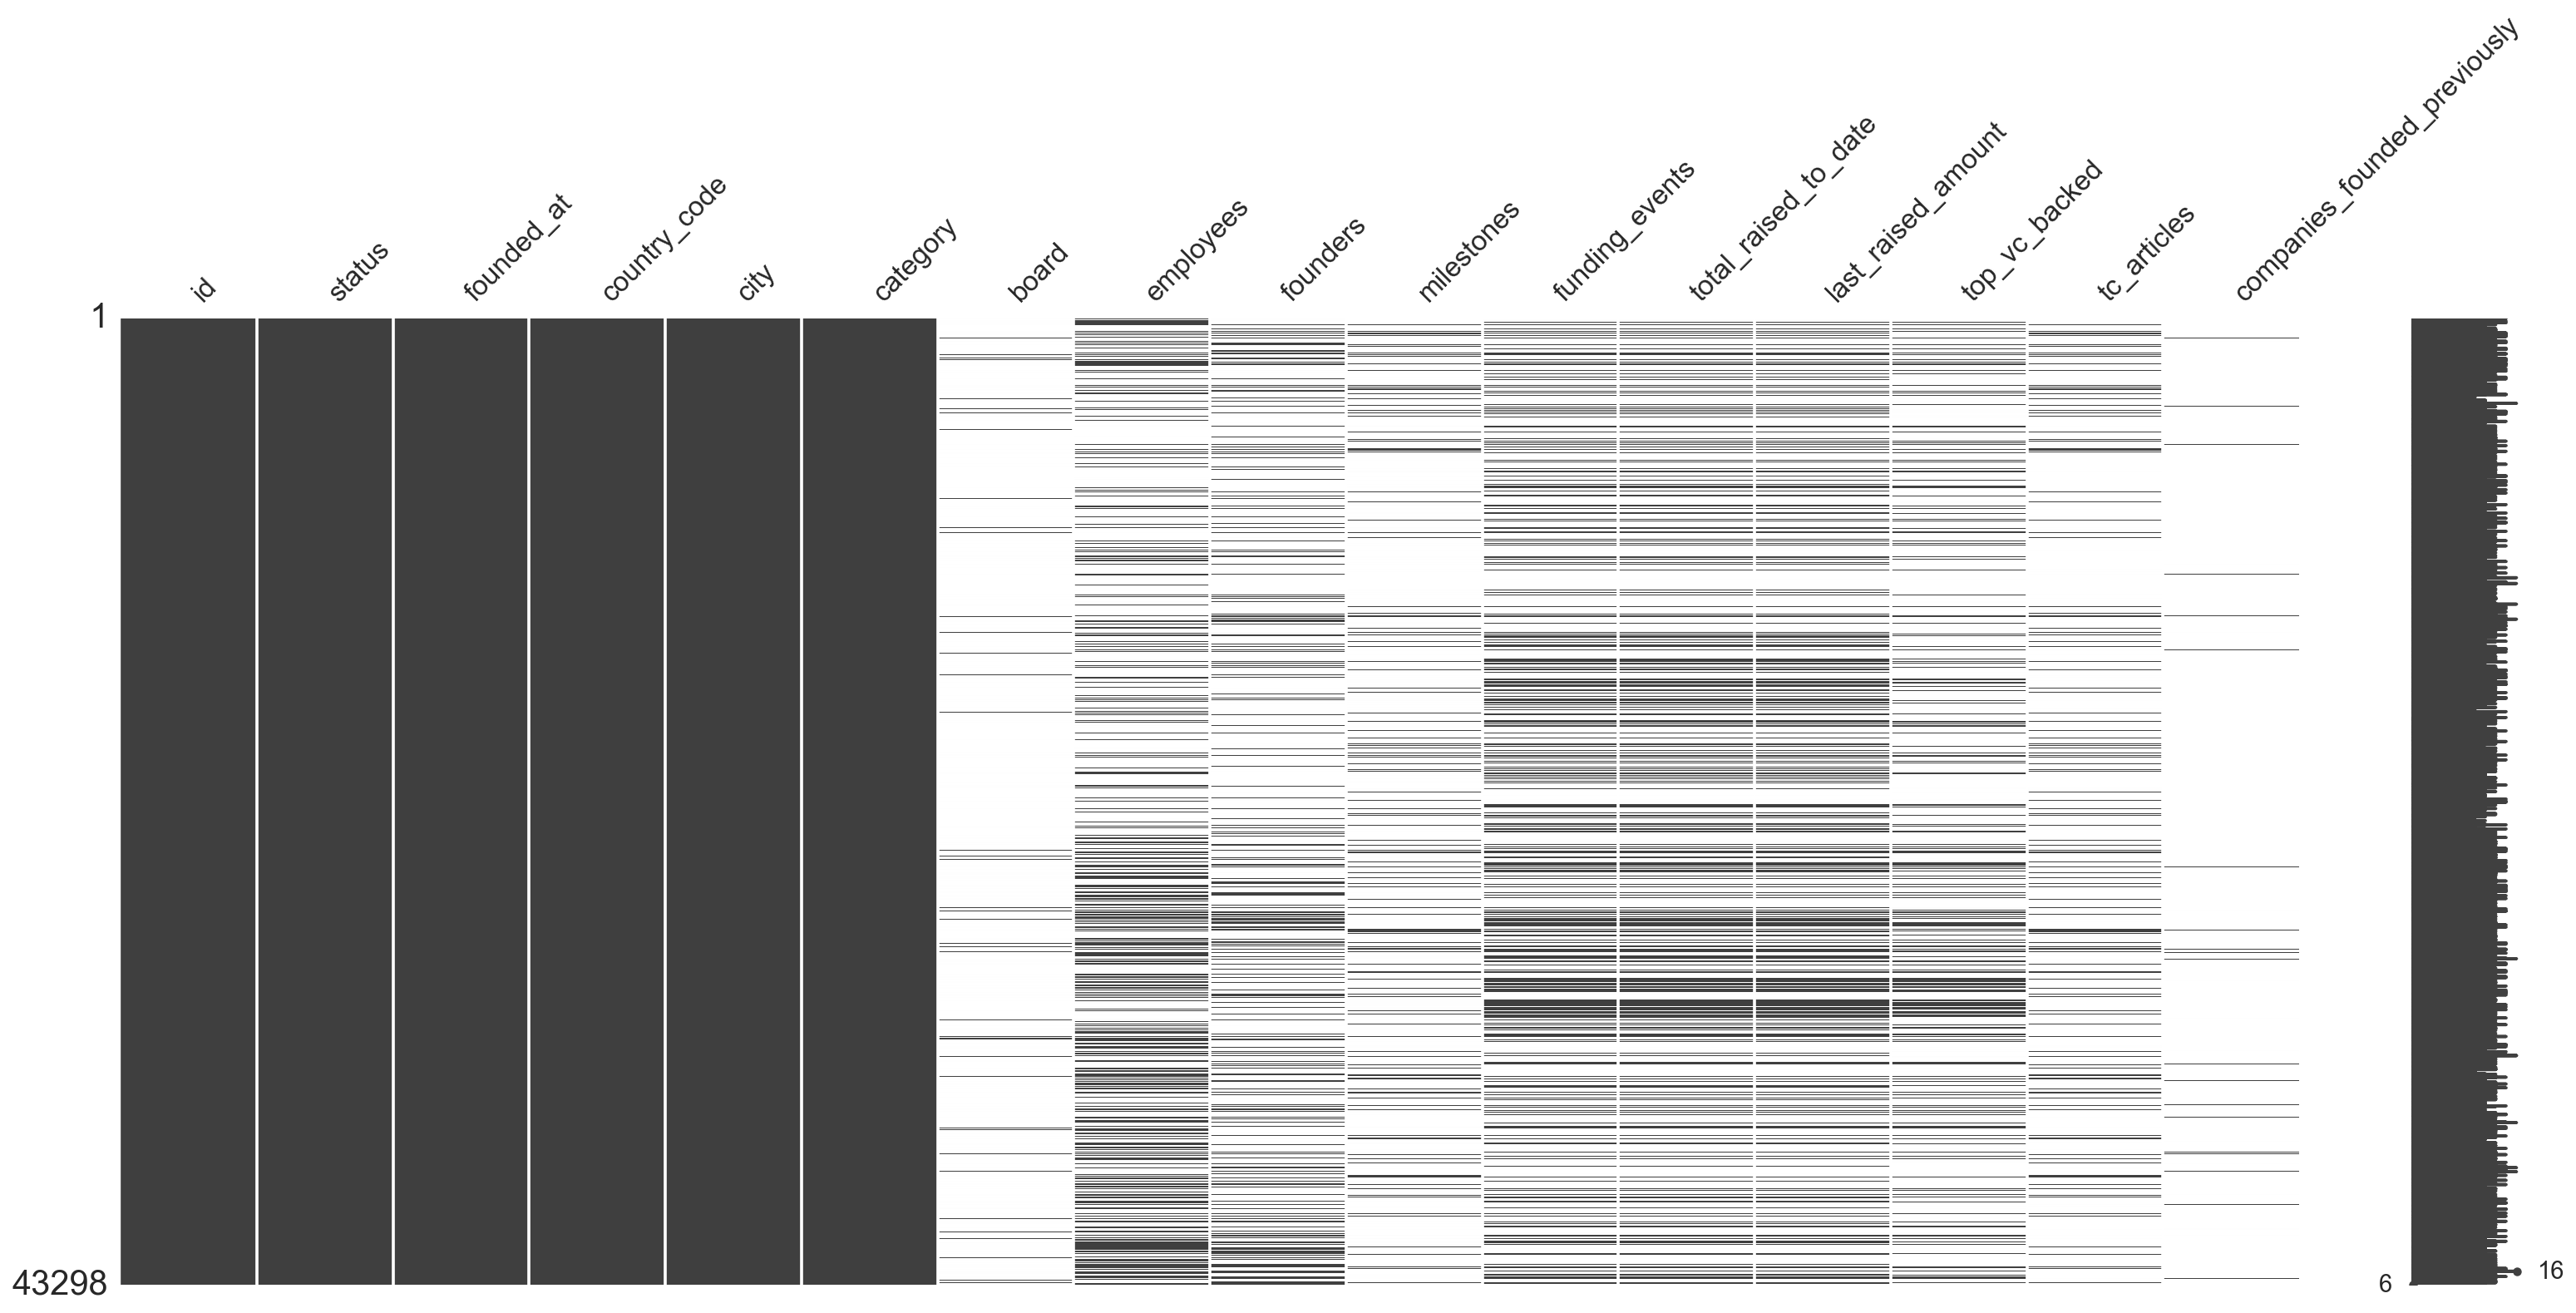

In [49]:
import missingno as msno
msno.matrix(all_data)

As you can see, some columns are better populated than others.  

In some cases its obvious why a column has a lot of missing values, e.g. board has a lot of missing data because most companies probably didn't have any board members when they were 3 years old.  

In other cases, its not so clear e.g. companies founded previously, I would have assumed there would be more experienced entrepreneurs out there. 

There are several ways one could go about filling in the missing data although not all are practical. Before we do go about filling in the missing data though, it's best to do some exploratory data analysis to get a better understanding of the data and understand whether data is missing at random or not. 

# EDA

First, let's see how many startups we have in each category. 

In [50]:
color1 = '#FFD147'
color2 = '#F1947A'
color3 = '#262626'

main_font = {'fontname':'Comic Sans MS'}

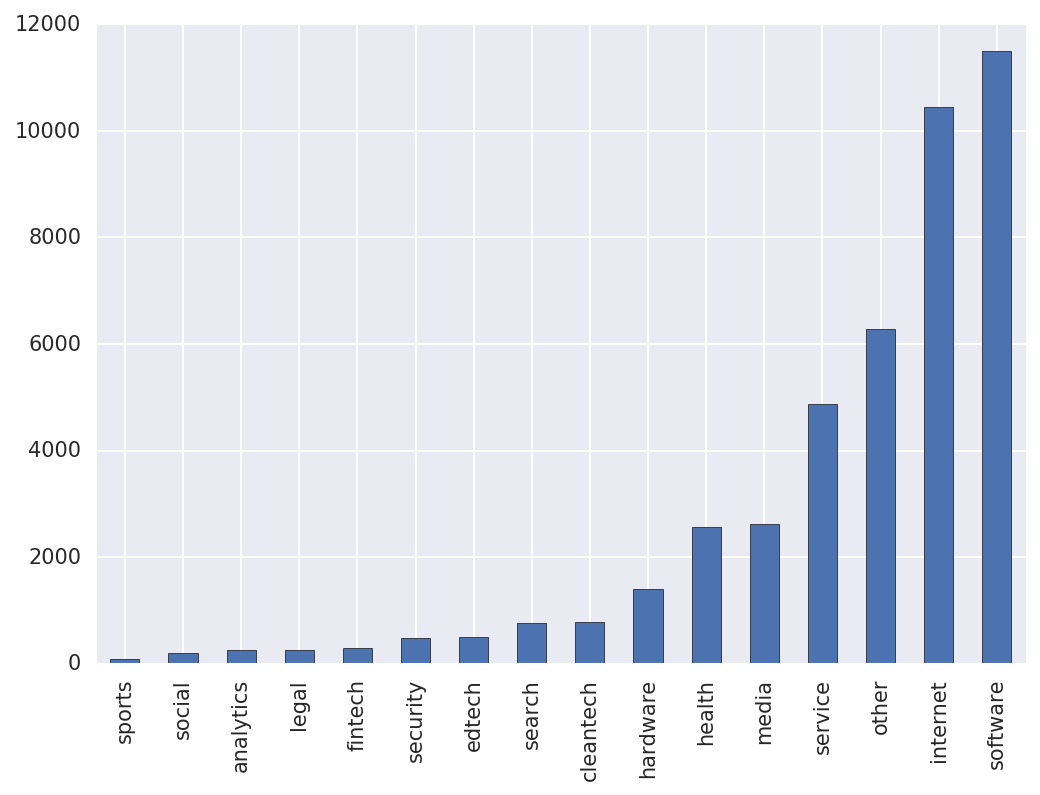

In [51]:
temp = all_data.copy()

ax = temp.groupby('category').size().sort_values().plot(kind="bar")

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [52]:
# for deck 
temp = all_data.copy()

ax = temp.groupby('category').size().sort_values().plot(kind="bar", color = color1, edgecolor = None)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(0)

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'category_distribution.png', bbox_inches='tight', transparent=True)
plt.close()

First, let's see how many exits of each type we have exactly. 

In [53]:
temp = all_data.copy()

temp = temp.groupby(by = [temp.status]).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)

temp.head()

status  Amount
0   acquired    3629
1     closed    1163
2        ipo     395
3  operating   38111

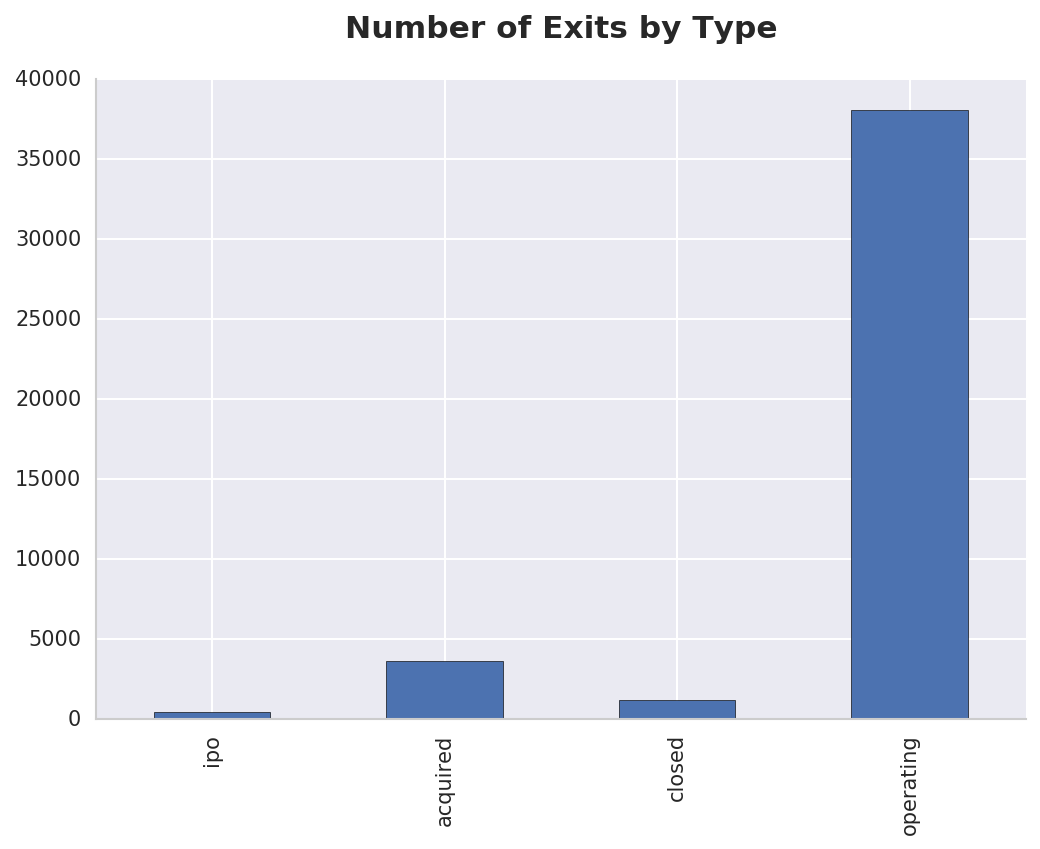

In [54]:
ax = temp.reindex([2, 0, 1, 3]).plot(x = 'status', y = 'Amount', kind="bar")

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Number of Exits by Type", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [55]:
# for deck
ax = temp.reindex([2, 0, 1, 3]).plot(x = 'status', y = 'Amount', kind="bar", color = color1)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(0)

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'exits_distribution.png', bbox_inches='tight', transparent=True)
plt.close()

Number of positive exits per industry

In [56]:
temp = all_data.copy()

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')
temp = temp[temp.exit=='positive']

temp = temp.groupby(['category']).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)

temp['Prcnt'] = temp['Amount']/temp['Amount'].sum()*100
temp = temp.sort_values(by = 'Prcnt')

temp.head()

category  Amount     Prcnt
7       legal       1  0.024851
15     sports       2  0.049702
2      edtech      13  0.323062
0   analytics      17  0.422465
3     fintech      26  0.646123

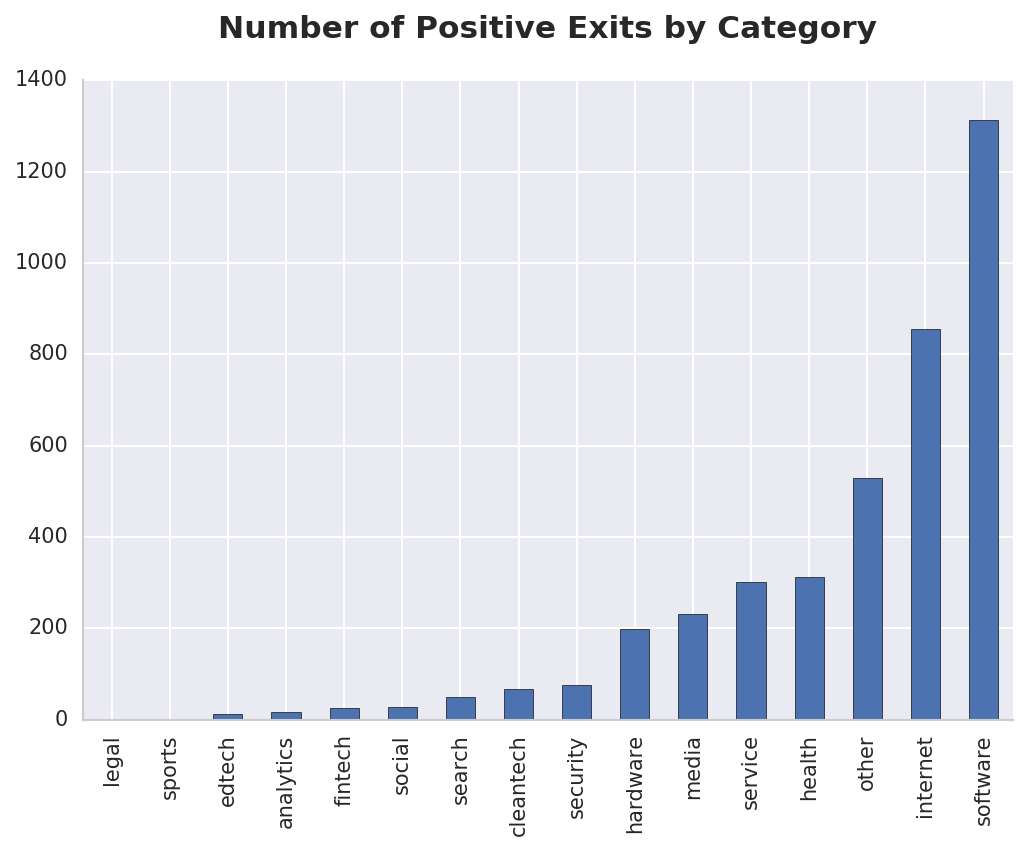

In [57]:
ax = temp.plot(x = 'category', y = 'Amount', rot = 90, kind = 'bar')

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Number of Positive Exits by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [58]:
# for deck
ax = temp.plot(x = 'category', y = 'Amount', kind="bar", color = color1)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')
ax.spines['bottom'].set_color('white')
ax.spines['bottom'].set_linewidth(0)
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(0)

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'positive_exits_distribution.png', bbox_inches='tight', transparent=True)
plt.close()

Percentage of exits by industry

In [59]:
temp = all_data.copy()

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')

temp = temp.groupby(['category', 'exit']).id.nunique()
temp = temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
temp.rename(columns={'id': 'prcnt'}, inplace=True)

temp = temp.pivot_table(index='category', columns='exit', values='prcnt').reset_index()
temp = temp.sort_values(by = 'negative')
temp = temp.set_index('category')
temp = temp[['positive', 'negative']]

temp.head()

exit       positive   negative
category                      
security  15.714286  84.285714
social    14.285714  85.714286
hardware  14.214286  85.785714
health    12.182741  87.817259
software  11.423107  88.576893

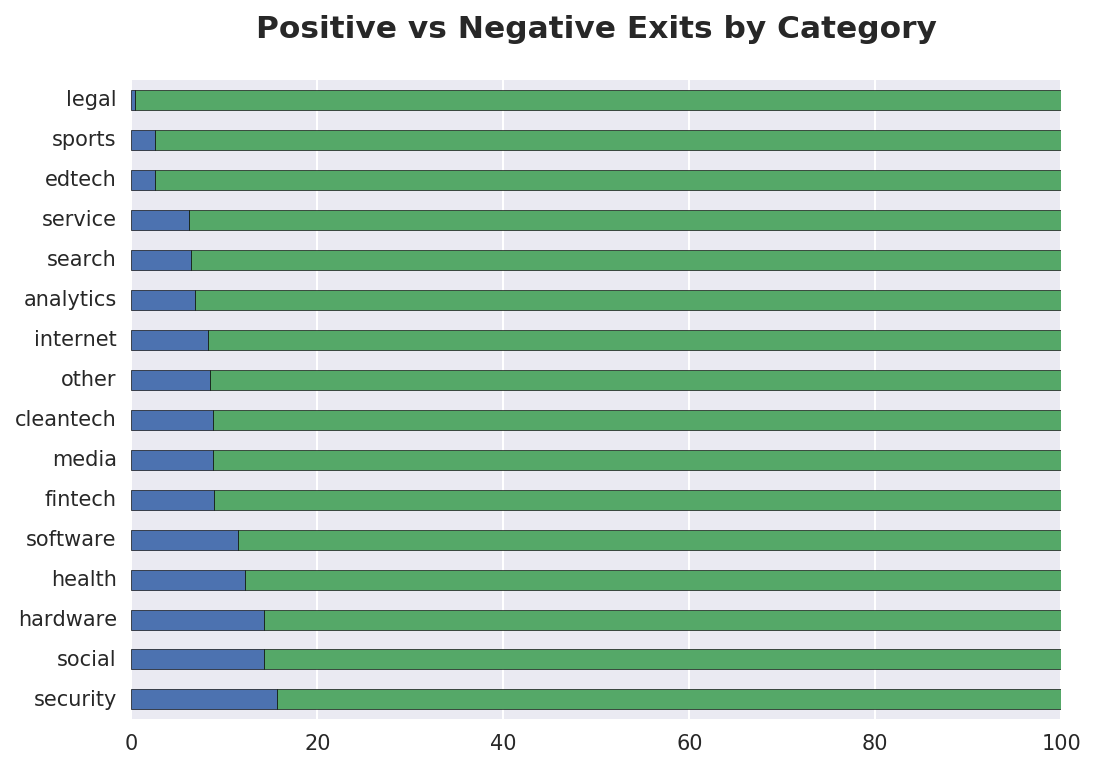

In [60]:
ax = temp.plot.barh(stacked=True)

ax.legend().set_visible(False)

ax.set_title("Positive vs Negative Exits by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [61]:
# for deck
ax = temp.plot.barh(stacked=True, color = [color1, color3], edgecolor = None)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'exits_distribution_by_category.png', bbox_inches='tight', transparent=True)
plt.close()

Next lets look at the average time to acquisition by sector. 

In [62]:
temp_ipos = cb_ipos.copy()
temp_ipos = temp_ipos[['object_id', 'public_at']]
temp_ipos['public_at'] = pd.to_datetime(temp_ipos.public_at)
temp_ipos.head()

temp_acquisitions = cb_acquisitions.copy()
temp_acquisitions = temp_acquisitions[['acquired_object_id', 'acquired_at']]
temp_acquisitions['acquired_at'] = pd.to_datetime(temp_acquisitions.acquired_at)
temp_acquisitions.head()

temp = all_data.copy()
temp = temp[['id', 'category', 'founded_at', 'status']]
temp = temp[(temp.status =='acquired') | (temp.status =='ipo')]

temp = pd.merge(temp, temp_ipos, how='left', left_on = 'id', right_on = 'object_id')
temp.drop('object_id', axis=1, inplace=True)

temp = pd.merge(temp, temp_acquisitions, how='left', left_on = 'id', right_on = 'acquired_object_id')
temp.drop('acquired_object_id', axis=1, inplace=True)

temp['exit_at'] = np.where(temp.status=='acquired', temp.acquired_at, temp.public_at)

temp = temp[['id', 'category', 'status', 'founded_at', 'exit_at']]

temp['time_to_exit'] = (temp['exit_at'] - temp['founded_at']).astype('timedelta64[M]')
temp = temp[temp.exit_at.notnull()]
temp = temp[temp.time_to_exit>0] # remove stupid values

temp = temp.groupby(by = ['category']).time_to_exit.mean().reset_index()
temp = temp.sort_values(by = 'time_to_exit')

temp.head()

category  time_to_exit
7      legal     48.000000
8      media     74.731602
6   internet     77.705128
13    social     78.576923
10    search     78.857143

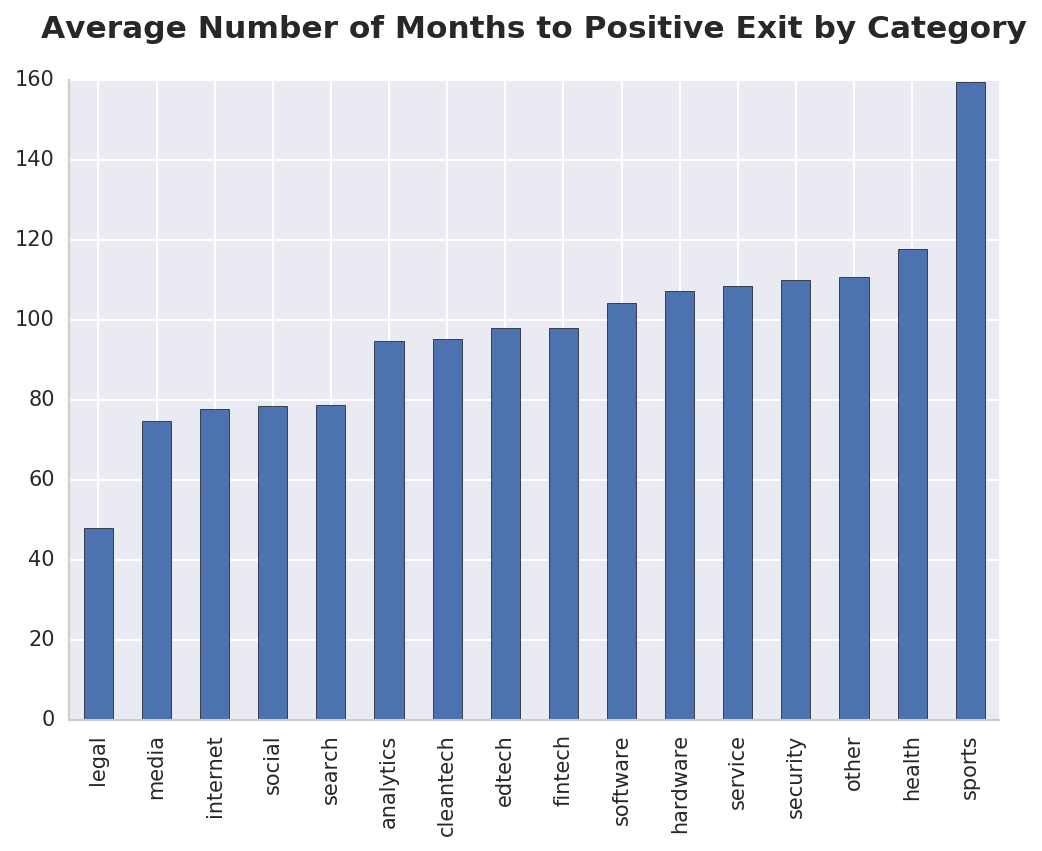

In [63]:
ax = temp.plot(x = 'category', y = 'time_to_exit', rot = 90, kind = 'bar')

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)

ax.set_title("Average Number of Months to Positive Exit by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [64]:
# for deck
ax = temp.plot.barh(x = 'category', y = 'time_to_exit', color = color1)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'months_to_exit_by_category.png', bbox_inches='tight', transparent=True)
plt.close()

Statistics of numerical features for companies in all categories

In [65]:
temp = all_data.copy()
temp = temp[['status', 'founded_at', 'board', 'employees', 'founders', 'milestones', 'funding_events', 'total_raised_to_date', 'last_raised_amount', 'top_vc_backed', 'tc_articles', 'companies_founded_previously']]

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')
temp.head()

status founded_at  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed  tc_articles  companies_founded_previously      exit
0  operating 2005-10-17    1.0        NaN       2.0         0.0             3.0            39750000.0          25000000.0            2.0          0.0                           NaN  negative
1  operating 2008-07-26    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN  negative
2  operating 2008-07-26    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN  negative
3  operating 2007-06-27    NaN        NaN       1.0         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN  negative
4  operating 2008-08-20    NaN        NaN       NaN         NaN             NaN                   NaN                 NaN            NaN          NaN                           NaN  negative

In [66]:
temp_positive = temp[temp.exit=='positive']
temp_positive = temp_positive.describe().transpose()
temp_positive = temp_positive[['mean', 'std', 'count']]

temp_positive.to_clipboard()
temp_positive

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


mean           std   count
board                         4.207650e-01  4.950363e-01   183.0
employees                     3.760479e-01  4.845374e-01  1670.0
founders                      1.704778e+00  8.814694e-01  1172.0
milestones                    4.475524e-01  1.265344e+00   858.0
funding_events                8.469602e-01  1.064593e+00  1908.0
total_raised_to_date          6.787465e+06  3.419614e+07  1908.0
last_raised_amount            4.200506e+06  1.463688e+07  1908.0
top_vc_backed                 1.814617e+00  6.145780e+00  1683.0
tc_articles                   5.827506e-02  4.170887e-01   858.0
companies_founded_previously  7.513812e-01  9.655515e-01   181.0

In [67]:
temp_negative = temp[temp.exit=='negative']
temp_negative = temp_negative.describe().transpose()
temp_negative = temp_negative[['mean', 'std', 'count']]

temp_negative.to_clipboard()
temp_negative

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


mean           std    count
board                         2.242991e-01  4.173149e-01   1070.0
employees                     3.588419e-01  4.796821e-01  11225.0
founders                      1.543927e+00  7.768913e-01   7023.0
milestones                    6.147971e-01  1.659502e+00   4190.0
funding_events                5.938229e-01  8.485184e-01  11138.0
total_raised_to_date          2.764268e+06  1.736306e+07  11138.0
last_raised_amount            2.024625e+06  8.766211e+06  11138.0
top_vc_backed                 9.639511e-01  4.942899e+00   7684.0
tc_articles                   2.863962e-02  2.455443e-01   4190.0
companies_founded_previously  6.264856e-01  8.328163e-01    589.0

Scatterplot matrix

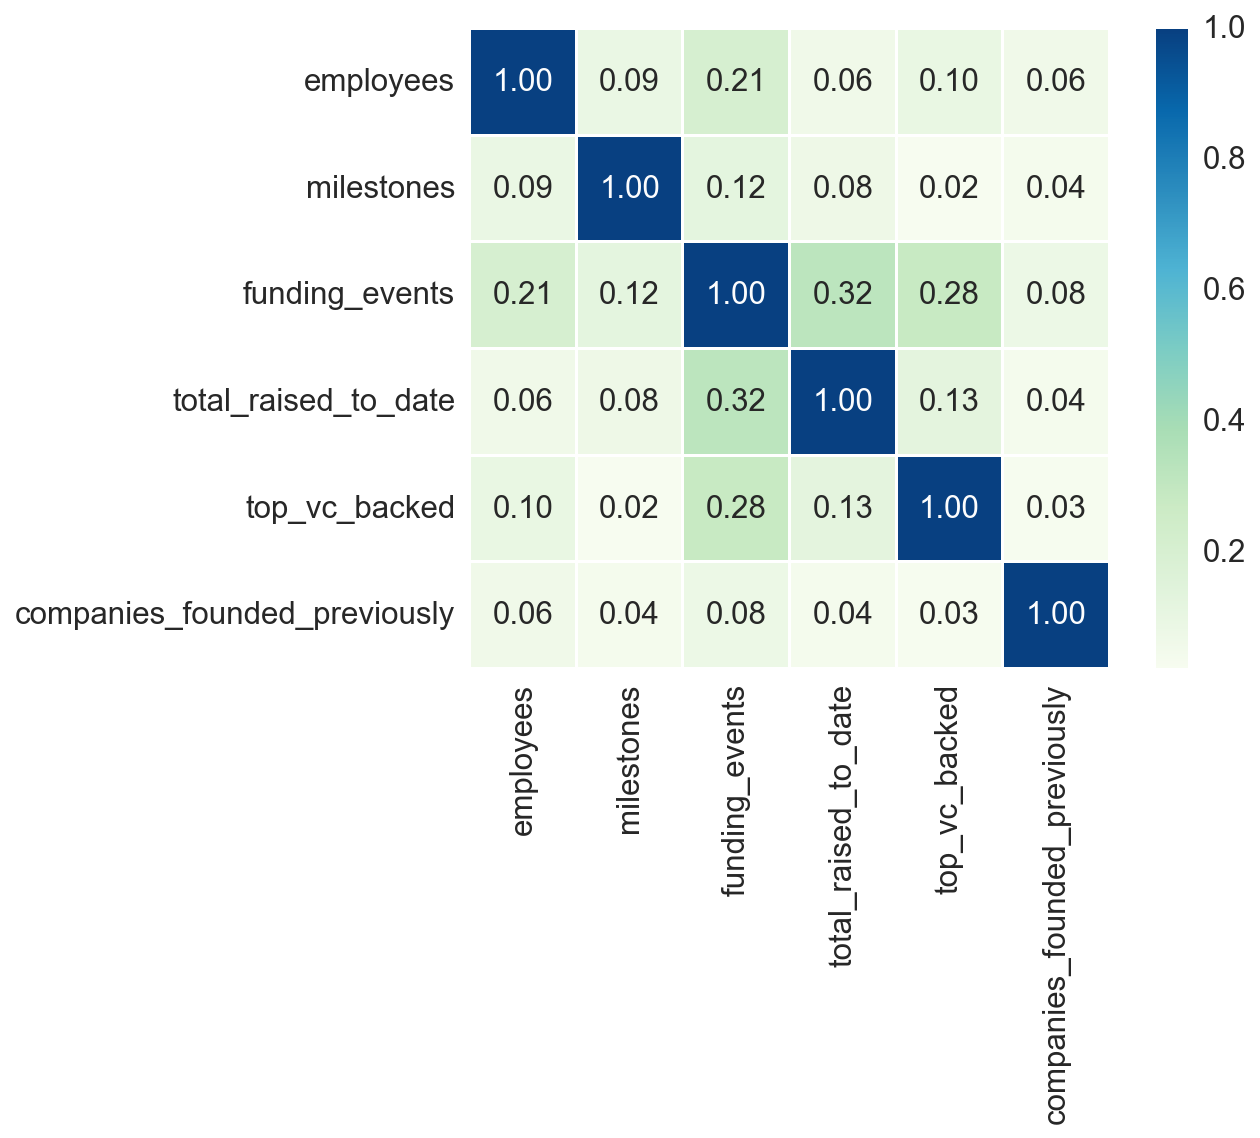

In [68]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

temp = all_data.copy()
temp.board.fillna(inplace=True, value=0)
temp.employees.fillna(inplace=True, value=0)
temp.founders.fillna(inplace=True, value=1)
temp.milestones.fillna(inplace=True, value=0)
temp.funding_events.fillna(inplace=True, value=0)
temp.total_raised_to_date.fillna(inplace=True, value=0)
temp.last_raised_amount.fillna(inplace=True, value=0)
temp.top_vc_backed.fillna(inplace=True, value=0)
temp.tc_articles.fillna(inplace=True, value=0)
temp.companies_founded_previously.fillna(inplace=True, value=0)

cols = ['employees', 'milestones', 'funding_events', 'total_raised_to_date', 'top_vc_backed', 'companies_founded_previously']

cm = np.corrcoef(temp[cols].values.T)

sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 yticklabels=cols, 
                 xticklabels=cols, 
                 linecolor='white', 
                 linewidths=1, 
                 cmap = 'GnBu')

plt.show()

In [69]:
# For deck
hm = sns.heatmap(cm, 
                 cbar=False, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 linecolor='white', 
                 linewidths=1, 
                 cmap = 'GnBu')

hm.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')

hm.figure.savefig(fig_path + 'correlation_statistics.png', bbox_inches='tight', transparent=True)
plt.close()

# Machine Learning Preparation

The majority of machine learning algorithms I intend to apply require complete data (i.e. no missing data). 
Simply removing companies with incomplete data will leave us with less than 10,000 samples (the arbitrary rule) and also a biased sample since data is unlikely to be missing at random. 
We can however make some simplifying  assumptions for missing data in our features. 

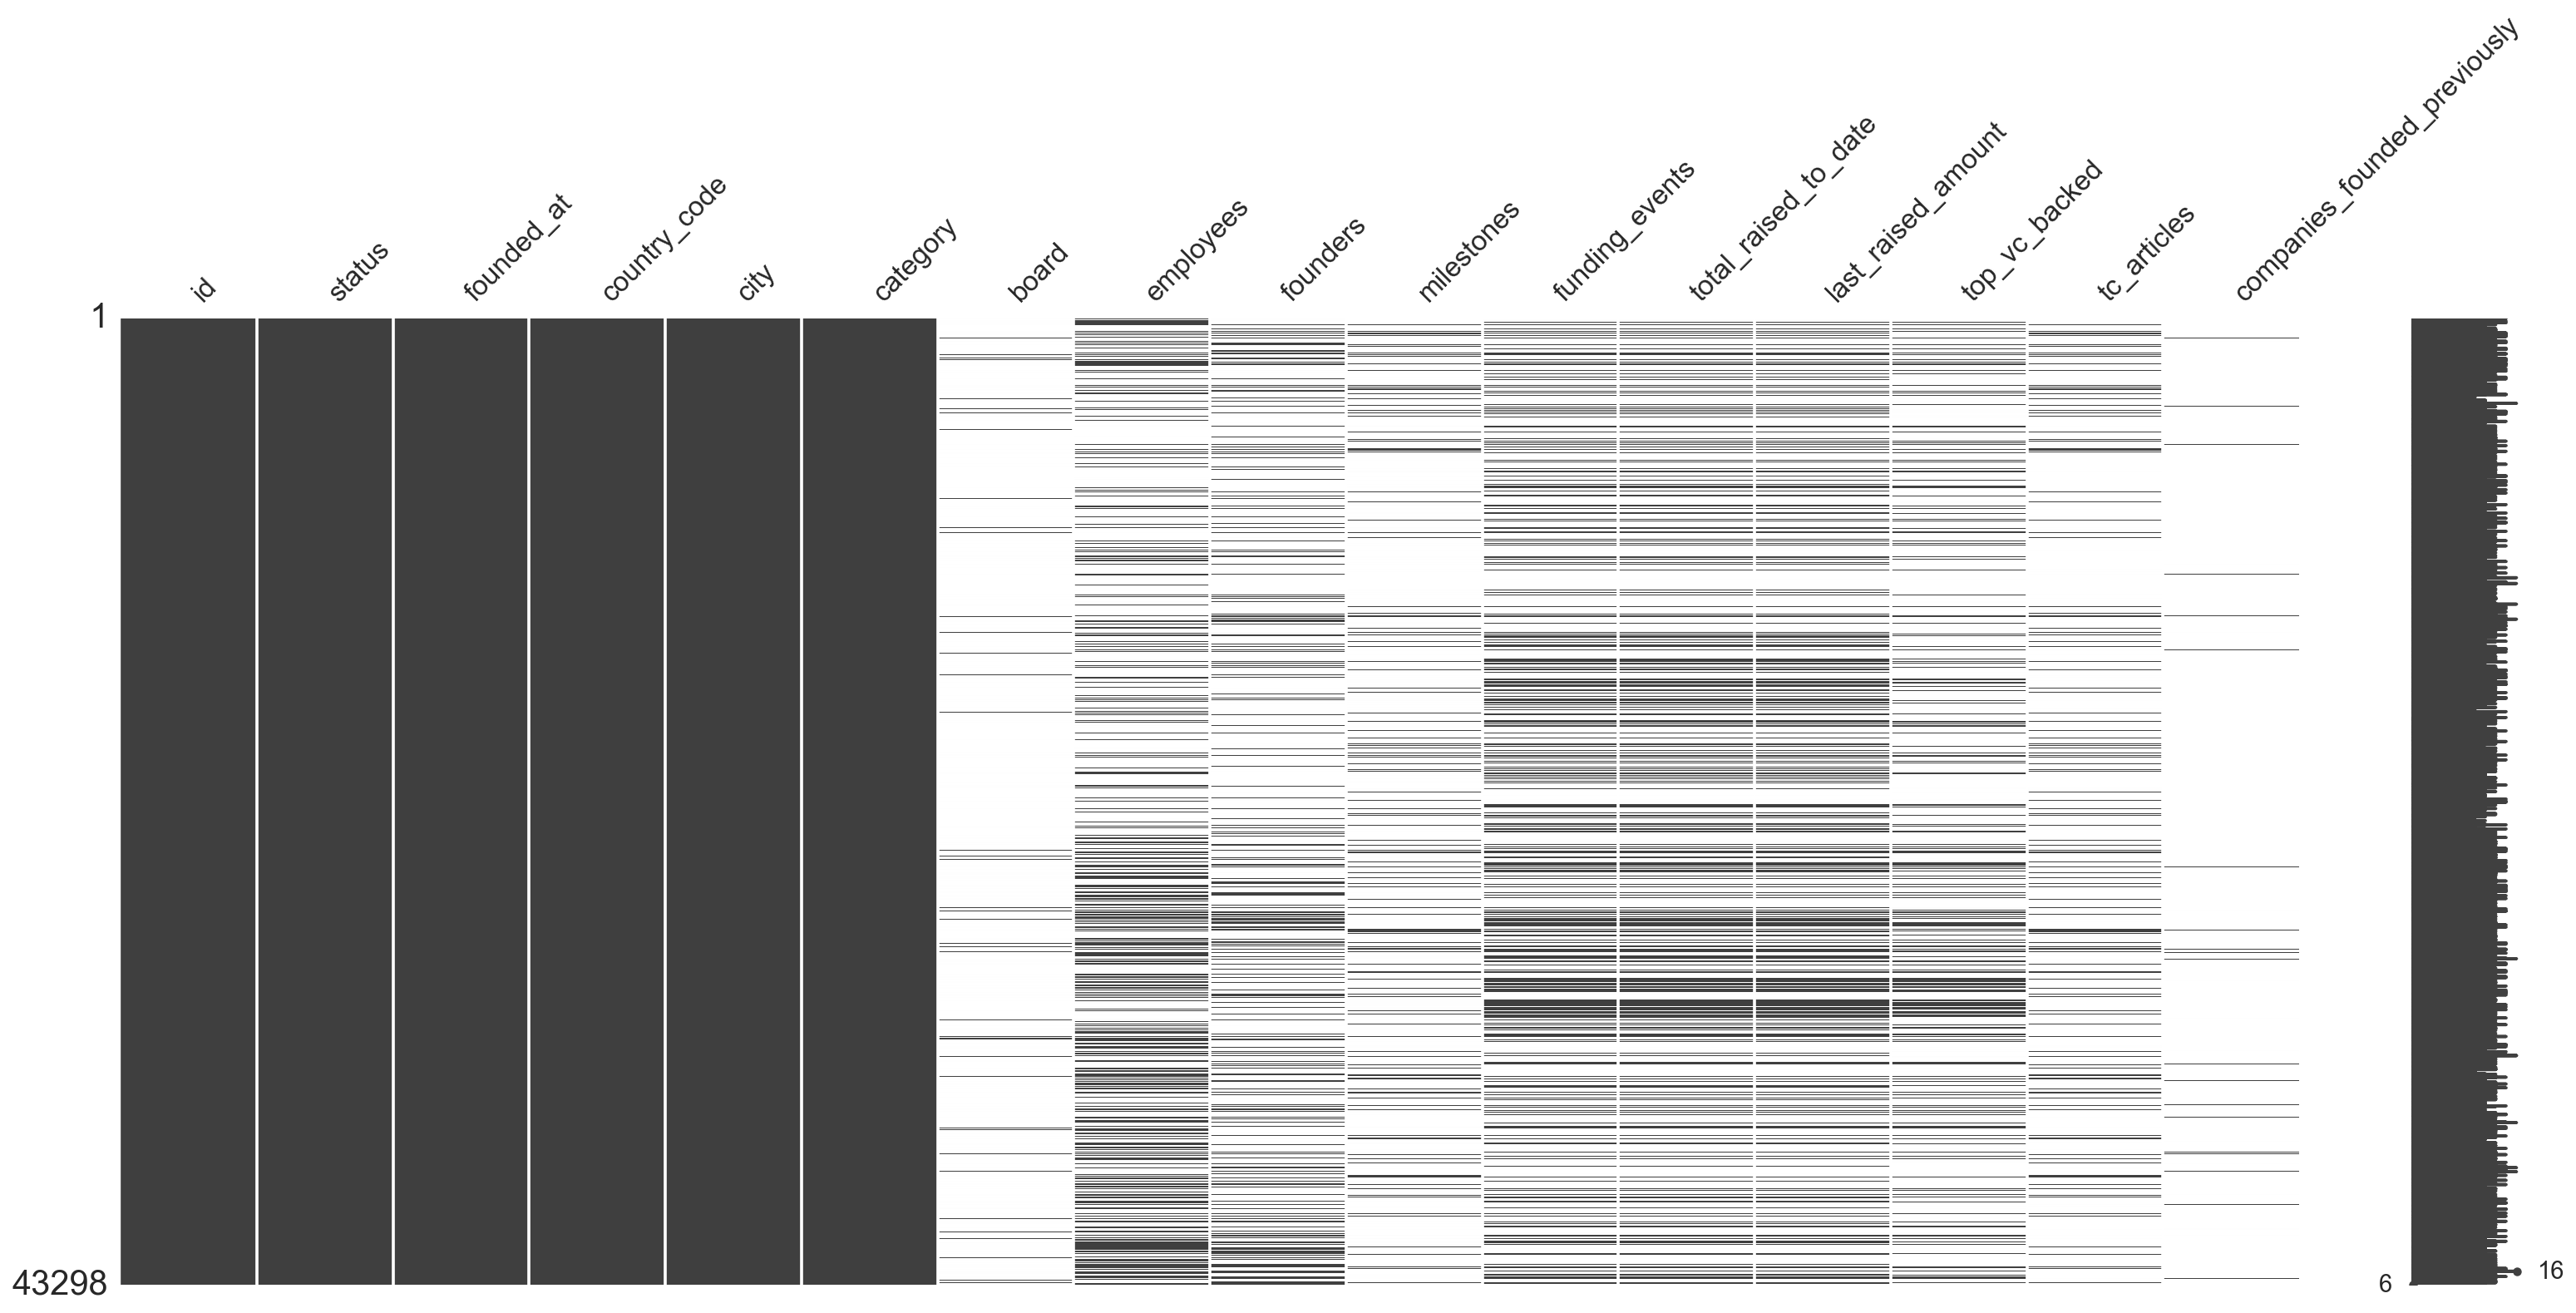

In [70]:
msno.matrix(all_data, freq=False)

plt.savefig(fig_path + 'missing_data.png', bbox_inches='tight')
plt.close()

Since CrunchBase consists largely of self-reported data, the missing data phenomenon is not surprising. As is it is a fairly popular source for data on startups, similar to how LinkedIn is the first source of information people will turn to for information on professional contacts, I assume there is significant motivation for founders to fill in data where available and keep that data up to date. Therefore, any missing data should indicate the presence of a 0. For example, if a company did not report any funding, we will assume that this company raised $0. We can make similar assumptions for the other variables. 

In [71]:
all_data.board.fillna(inplace=True, value=0)
all_data.employees.fillna(inplace=True, value=0)
all_data.founders.fillna(inplace=True, value=0)
all_data.milestones.fillna(inplace=True, value=0)
all_data.funding_events.fillna(inplace=True, value=0)
all_data.total_raised_to_date.fillna(inplace=True, value=0)
all_data.last_raised_amount.fillna(inplace=True, value=0)
all_data.top_vc_backed.fillna(inplace=True, value=0)
all_data.tc_articles.fillna(inplace=True, value=0)
all_data.companies_founded_previously.fillna(inplace=True, value=0)

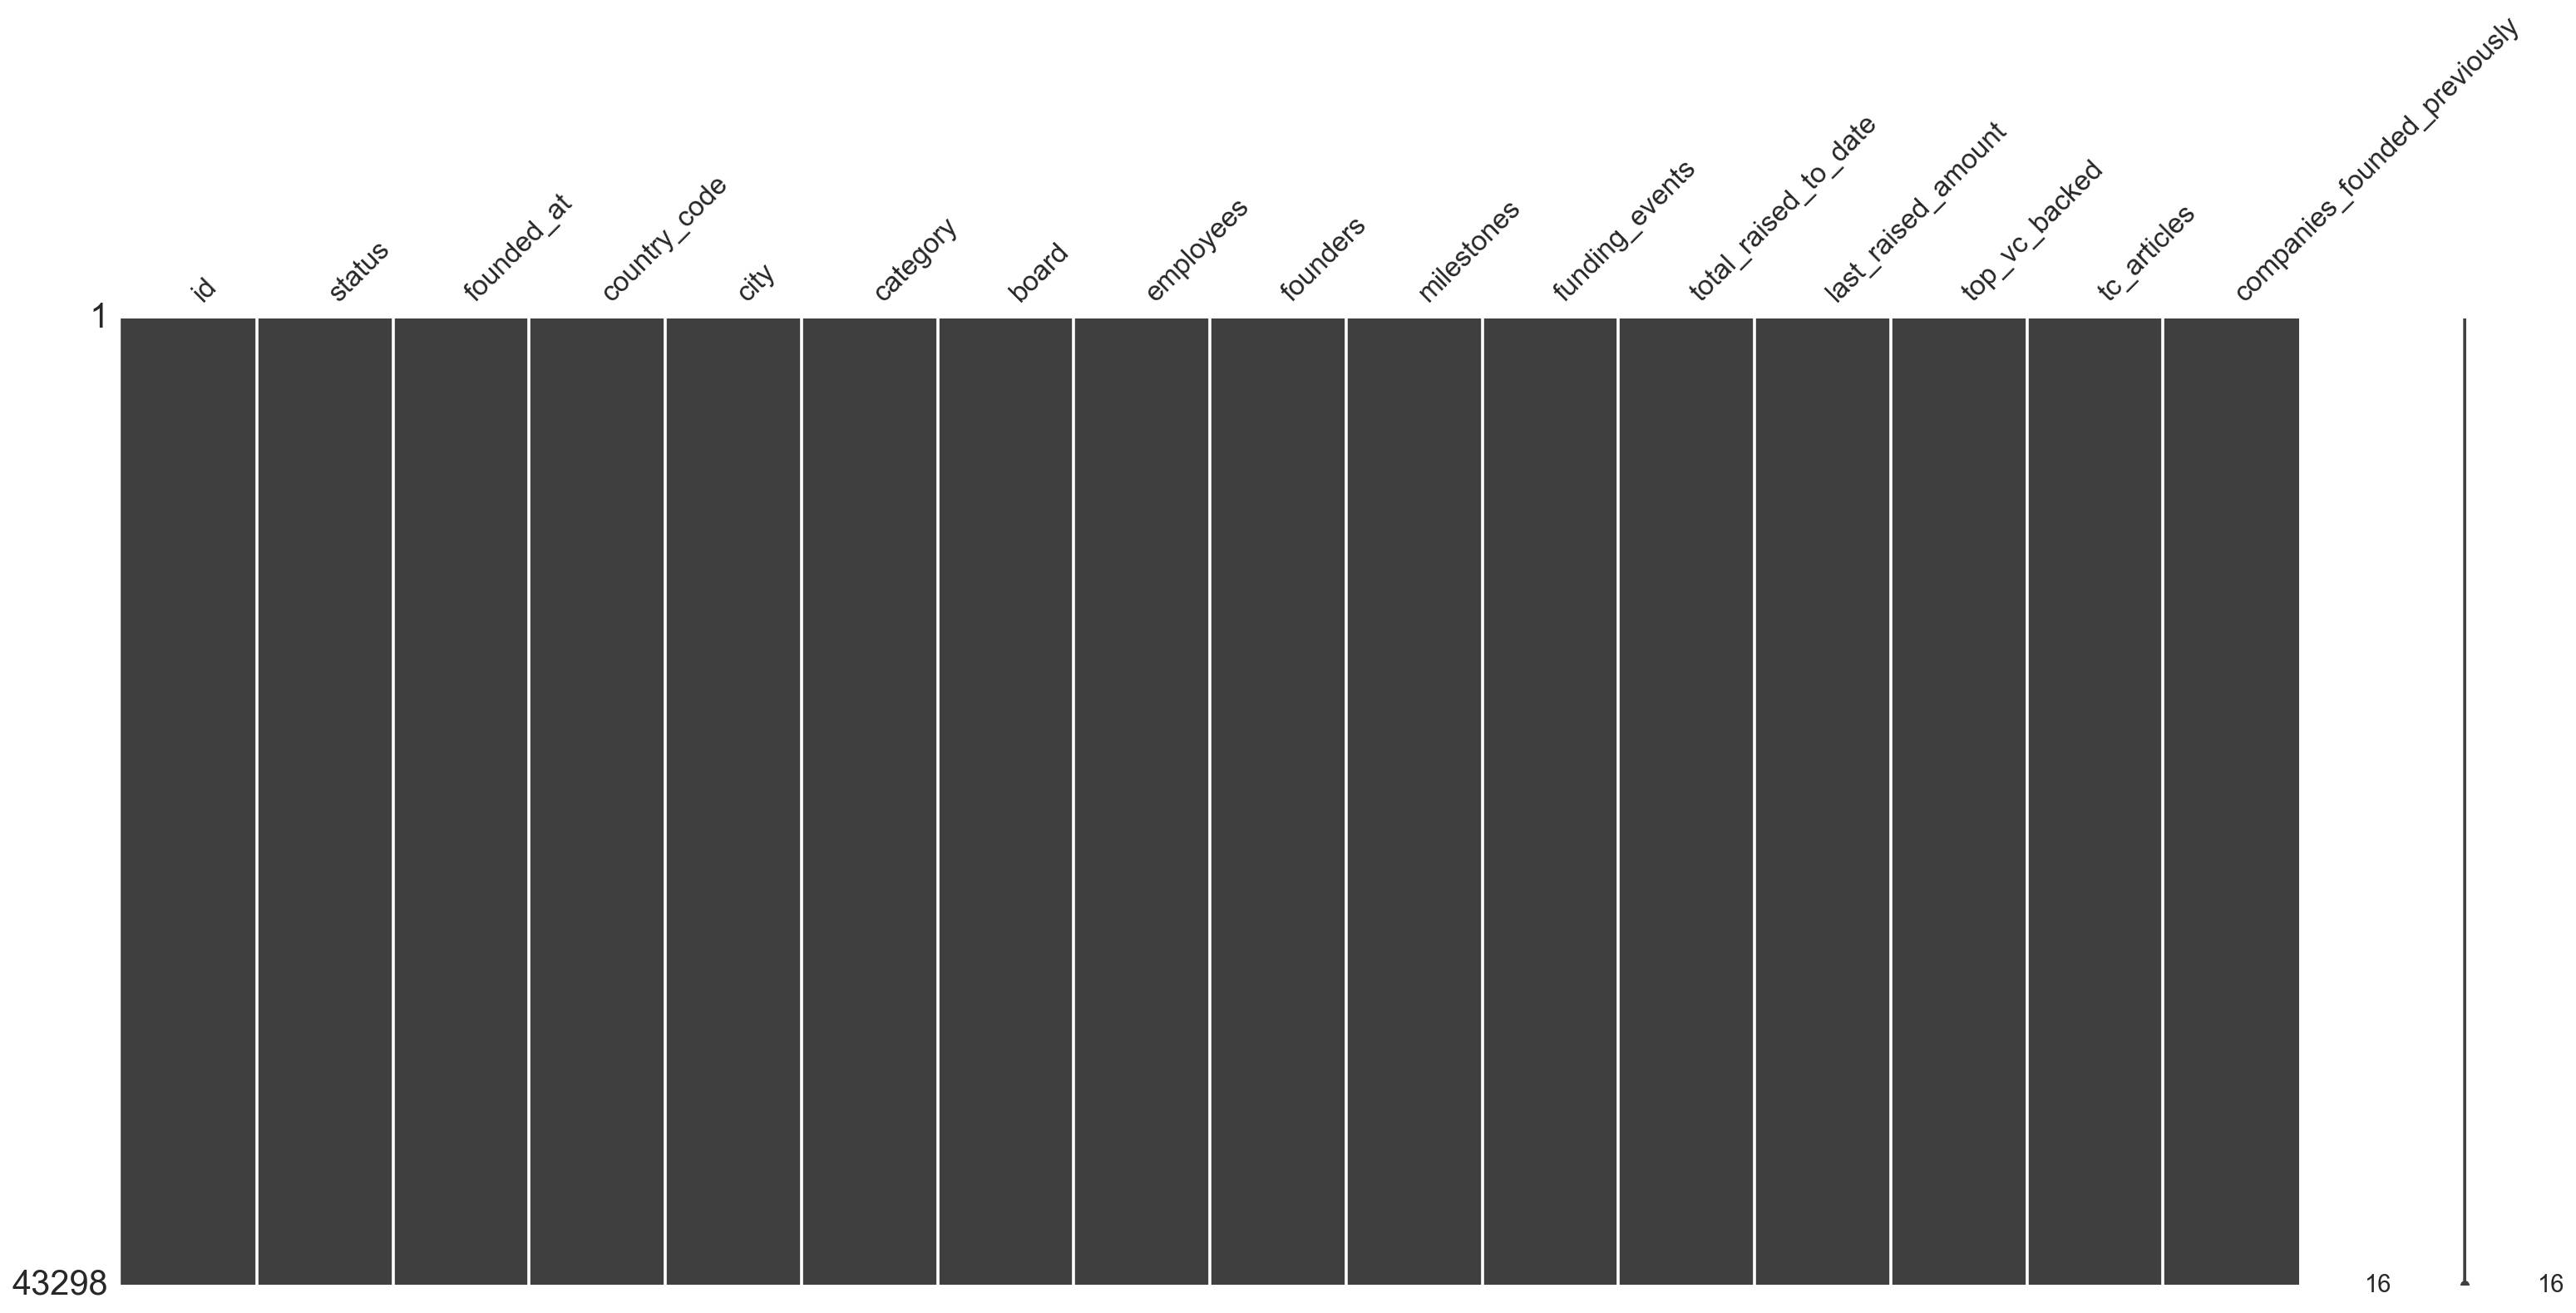

In [72]:
msno.matrix(all_data, freq=False)

plt.savefig(fig_path + 'missing_data_filled.png', bbox_inches='tight')
plt.close()

Next, let's dummify the cardinal categorical variables, (in our case just Category).

In [73]:
from sklearn.preprocessing import StandardScaler

all_data['founded_at'] = all_data.founded_at.dt.year

columns = ['category', 'country_code', 'city']

for column in columns: 
    dum = pd.get_dummies(all_data[column], prefix = column, dummy_na=False)
    all_data = pd.concat([all_data, dum], axis = 1)
    all_data = all_data.drop(column, axis = 1)

all_data.head()

id     status  founded_at  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed  tc_articles  companies_founded_previously  category_analytics  category_cleantech  category_edtech  category_fintech  category_hardware  category_health  category_internet  category_legal  category_media  category_other  category_search  category_security  category_service  category_social  category_software  category_sports  country_code_AUS  \
0      c:1  operating        2005    1.0        0.0       2.0         0.0             3.0            39750000.0          25000000.0            2.0          0.0                           0.0                 0.0                 0.0              0.0               0.0                0.0              0.0                1.0             0.0             0.0             0.0              0.0                0.0               0.0              0.0                0.0              0.0               0.0   
1  c:10000  operating        2008    0.0        0.0       0.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0                 0.0                 0.0              0.0               0.0                0.0              0.0                0.0             0.0             0.0             0.0              0.0                0.0               1.0              0.0                0.0              0.0               0.0   
2  c:10001  operating        2008    0.0        0.0       0.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0                 0.0                 0.0              0.0               0.0                0.0              0.0                0.0             0.0             1.0             0.0              0.0                0.0               0.0              0.0                0.0              0.0               0.0   
3  c:10002  operating        2007    0.0        0.0       1.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0                 0.0                 0.0              0.0               0.0                0.0              0.0                1.0             0.0             0.0             0.0              0.0                0.0               0.0              0.0                0.0              0.0               0.0   
4  c:10003  operating        2008    0.0        0.0       0.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0                 0.0                 1.0              0.0               0.0                0.0              0.0                0.0             0.0             0.0             0.0              0.0                0.0               0.0              0.0                0.0              0.0               0.0   

   country_code_CAN  country_code_DEU  country_code_FRA  country_code_GBR  country_code_IND  country_code_Irrelevant_country  country_code_USA  country_code_Unknown_country  city_Amsterdam  city_Austin  city_Bangalore  city_Berlin  city_Boston  city_Chicago  city_Irrelevant_city  city_London  city_Los Angeles  city_Montreal  city_Moscow  city_New York City  city_Paris  city_Sao Paulo  city_Seattle  city_Silicon Valley  city_Singapore  city_Sydney  city_Tel Aviv  city_Toronto  \
0               0.0               0.0               0.0               0.0               0.0                              0.0               1.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   0.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           1.0                  0.0             0.0          0.0            0.0           0.0   
1               0.0               0.0               0.0          

Next, let's split the data into training and testing samples. 

In [74]:
all_data = all_data.drop('id', axis = 1)

all_data = all_data[all_data.status.isin(['operating', 'acquired', 'ipo', 'closed'])]
len(all_data)

43298

Seperate our x and y variables.

In [75]:
x = all_data.drop('status', axis = 1).values

y = ((all_data.status == 'acquired') | (all_data.status == 'ipo')).values.astype(np.int)

Split our data ito training and testing sets. 

In [76]:
from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 2)

print("Training X samples:", xtrain.shape[0])
print("Training Y samples:", ytrain.shape[0])
print()
print("Testing X samples:", xtest.shape[0])
print("Testing Y samples:", ytest.shape[0])

Training X samples: 30308
Training Y samples: 30308

Testing X samples: 12990
Testing Y samples: 12990


//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
sc = StandardScaler()

xtrain_std = sc.fit_transform(xtrain)
xtest_std = sc.transform(xtest)

print("Training X standardised samples:", xtrain_std.shape[0])
print("Testing X standardised samples:", xtest_std.shape[0])

Training X standardised samples: 30308
Testing X standardised samples: 12990


There's also one more thing we need to do.  
Given the significant imbalance in our dataset, we should use some kind of sampling technqiue to create balanced samples for our training data.  
One popular method of sampling is SMOTE (Syntheic Minority Over-sampling Technique).  

As its name suggests, SMOTE is an oversampling method and  works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.  

To learn more about SMOTE, see the original 2002 paper titled “SMOTE: Synthetic Minority Over-sampling Technique“.

In [78]:
from imblearn.over_sampling import SMOTE

# Apply regular SMOTE
smote = SMOTE(kind='regular')

xtrain_resampled, ytrain_resampled = smote.fit_sample(xtrain, ytrain)

# Standardised resampled data
xtrain_resampled_std = sc.fit_transform(xtrain_resampled)

print("Minority class: ", str(smote.min_c_))
print("Majority class: ", str(smote.maj_c_))
print("Occurrences of each class: ", str(smote.stats_c_))
print("")
print("Shape of original X: ", str(smote.X_shape_))
print("Shape of resampled X: ", str(xtrain_resampled.shape))

Minority class:  1
Majority class:  0
Occurrences of each class:  Counter({0: 27477, 1: 2831})

Shape of original X:  (30308, 58)
Shape of resampled X:  (54954, 58)


In [79]:
# Something else we can do is random undersampling of the majority class to get a balanced data set

from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

rus = RandomUnderSampler(random_state = 1)
#xtrain_resampled, ytrain_resampled = rus.fit_sample(xtrain, ytrain)

# Standardised resampled data
#xtrain_resampled_std = sc.fit_transform(xtrain_resampled)

#print('Resampled dataset shape {}'.format(Counter(ytrain_resampled)))

We'll need to develop some pipelines when we find successful models. 

In [80]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imblearn_Pipeline

Now let's set up some custom functions for selecting the best combination of parameters through cross validation. Note that for cross validation purposes, we will use the precision score to select the best combination of parameters. This is because we want to keep the number of false positives we get back as low as possible. We do not expect to get a high recall (i.e. identify as many positive exits as possible) as this is difficult for even human investors but we do expect to be able to more accurately identify positive exits (relative to human investors). 

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform_rand

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scorer = make_scorer(precision_score, pos_label=1)
#scorer = make_scorer(recall_score, pos_label=1)
#scorer = make_scorer(f1_score, pos_label=1)

Create a function to easily plot a confusion matrix. 

In [82]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        cm = cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

In [83]:
from sklearn.metrics import confusion_matrix

def custom_confusion_matrix(clf, 
                            x_data = xtest, 
                            y_data = ytest, 
                            normalize = False,
                            deck = False):

    y_true = y_data
    y_pred = clf.predict(x_data)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[0][0]

    Precision = TP / (TP + FP)
    Specificity = TN / (TN + FP)
    Recall = TP / (TP + FN)
    F1 = 2*((Precision*Recall)/(Precision+Recall))

    # Plot
    if deck==False: 
        plt.figure()
        plot_confusion_matrix(cm, classes=[0,1], title='', normalize = normalize)
        plt.show()
        
        print("TP = {}".format(TP))
        print("FP = {}".format(FP))
        print("TN = {}".format(TN))
        print("FN = {}".format(FN))
        print(" ")
        print('Precision ( or TPR) = {}'.format(round(Precision, 2)))
        print('Specificity ( or TNR) = {}'.format(round(Specificity, 2)))
        print('Recall = {}'.format(round(Recall, 2)))
        print('F1 = {}'.format(round(F1 , 2)))
    
    if deck==True: 
        plt.figure()
        plot_confusion_matrix(cm, classes=[0,1], title='', normalize = normalize)
        plt.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')
        plt.ylabel('True label', color = 'white')
        plt.xlabel('Predicted label', color = 'white')
        plt.savefig(fig_path + str(clf)[:20] + '_cm.png', bbox_inches='tight', transparent=True)
        plt.close()

A function to plot precision-recall curve. 

In [84]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

def scorePrimitive(classifier, input, result):
    predictions = classifier.predict(input)
    (precision, recall, fscore, threshold) = precision_recall_fscore_support(result, predictions, average='micro')
    print('Precision: %0.2f ; Recall: %0.2f ; F-Score: %0.2f' % (precision, recall, fscore))
    num_true_positives = 0
    num_true_negatives = 0
    num_false_positives = 0
    num_false_negatives = 0
    
    for i, prediction in enumerate(predictions):
        if prediction == 0:
            if result[i] == 0:
                num_true_negatives += 1
            else:
                num_false_negatives += 1
        else:
            if result[i] == 1:
                num_true_positives += 1
            else:
                num_false_positives += 1
        
        print('Num True Positives: ', num_true_positives)
        print('Num False Positives: ', num_false_positives)
        print('Num True Negatives: ', num_true_negatives)
        print('Num False Negatives: ', num_false_negatives)


def score(classifier, input, result, title):
    #print('For %s' % title)
    predictions = classifier.predict_proba(input)
    precision, recall, thresholds = precision_recall_curve(result, predictions[:, 1])
    area = auc(recall, precision)
    #print("Area Under Curve for %s: %0.2f" % (title, area))
    
    plt.clf()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('%s AUC=%0.2f' % (title, area))
    plt.legend(loc="upper right")
    plt.show()
    #scorePrimitive(classifier, input, result)

A function to plot an ROC (TPR vs TNR) curve. 

In [85]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

def custom_roc(clf, x, y):
    
    classifier = clf

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    lw = 2
 
    probas_ = classifier.predict_proba(x)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color='blue',
             label='ROC (area = %0.2f)' % roc_auc)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

That's it. We're done! 
Now for some machine learning.

# Naive Bayes

We'll start with the Naive Bayes algorithm. 

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem. The 'naive' part of the name comes from the strong (ergo naive) independence assumptions between the features. In reality, we see that features are often correlated. 

Despite this assumption, Naive Bayes algoithms have been applied successfully in various domains. With appropriate pre-processing, they have been found to be with much more sophisticated methods (some of which we will see later on in this notebook).

The following models are available to us through scikit:
* Gaussian naive Bayes
* Multinomial naive Bayes
* Bernoulli naive Bayes

Each makes different assumptions about the distribution of the underlying data. As most of our features exhibit a strong skew to the right, a multinomial naive bayes model is likely to work best for this classification task.  

In [86]:
from sklearn.naive_bayes import MultinomialNB

There is one hyperparameter that we can tune for Multinomial Naive Bayes model. This is the laplace smoothing constant. This is ensure that no feature has a probability of 0 which becomes problematic because of the naive Bayes independence assumption. 

In [87]:
# prepare a range of alpha values to test
parameters = np.array([.1, 1, 5, 10, 50, 100, 1000])

# create and fit a MNB model, testing each alpha
grid = GridSearchCV(estimator = MultinomialNB(), 
                    param_grid = dict(alpha = parameters), 
                    scoring = scorer,
                    cv = 5)

grid = grid.fit(xtrain, ytrain)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.246421969047
0.1


Fit model with the best parameters. 

In [88]:
mnb = MultinomialNB(alpha = grid.best_estimator_.alpha)
mnb.fit(xtrain, ytrain)

MultinomialNB(alpha=0.10000000000000001, class_prior=None, fit_prior=True)

Excellent, now let's see our overall accuracy rate. 

In [89]:
print ("MN Overall Accuracy: %0.2f%%" % (100 * mnb.score(xtest, ytest)))

MN Overall Accuracy: 89.64%


We're seeing what's look like a very impressive overall accuracy rate with our model!  

Unfortunately, this would be falling prey to what is known as the accuracy paradox.  
It is the case where your accuracy measures tell the story that you have excellent accuracy but in fact, the accuracy is only reflecting the underlying class' distribution.  More specifically, the reason we get such a high accuracy rate overall on an imbalanced dataset like ours is because our model looks at the data and cleverly decides that the best thing to do is to always predict “Class 0” and thus achieve high accuracy.  

Instead, what we should really be looking at are the true postive, false positive, true negative and false negative rates. A confusion matrix is a really helpful way for breaking down predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned to). Let's try to make one below. 

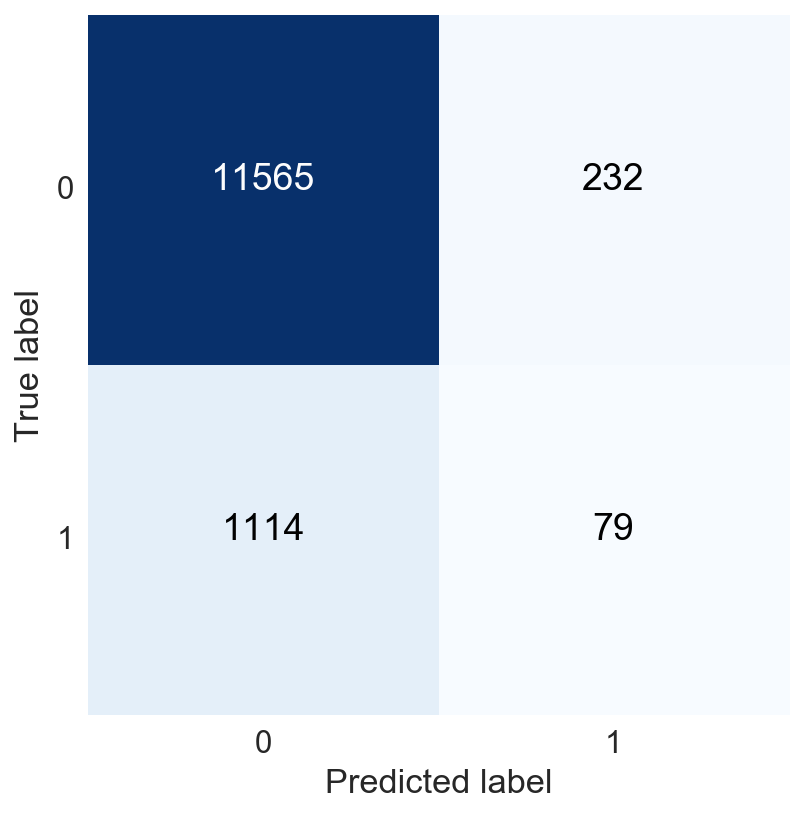

TP = 79
FP = 232
TN = 11565
FN = 1114
 
Precision ( or TPR) = 0.25
Specificity ( or TNR) = 0.98
Recall = 0.07
F1 = 0.11


In [90]:
custom_confusion_matrix(clf = mnb, x_data = xtest, y_data = ytest)

So now, we're starting to get a clearer picture of the performance of our model and its not looking good.  

While the model does a fairly good job of predicting 0s (non-acquired/non-ipo companies), we do a very poor job of predicting 1s (acquired/ipo companies) and this is what we really care about. We only get those right about 19% of the time. Let's take a look at some other evaluation measures. 

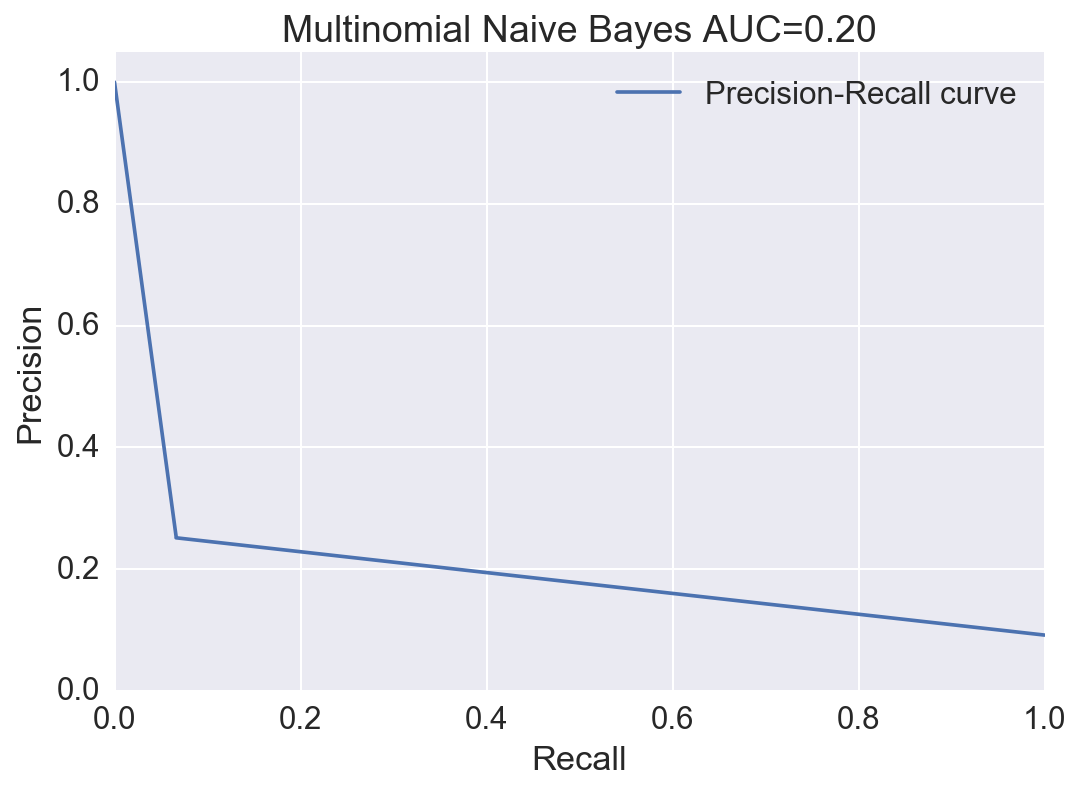

In [91]:
score(mnb, xtest, ytest, 'Multinomial Naive Bayes')

A high area under the curve would represent both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). In our case, you can see the precision and recall are both pretty poor across the range of threshold values.  

Let's take a look at one other evaluation measure, the ROC curve. 

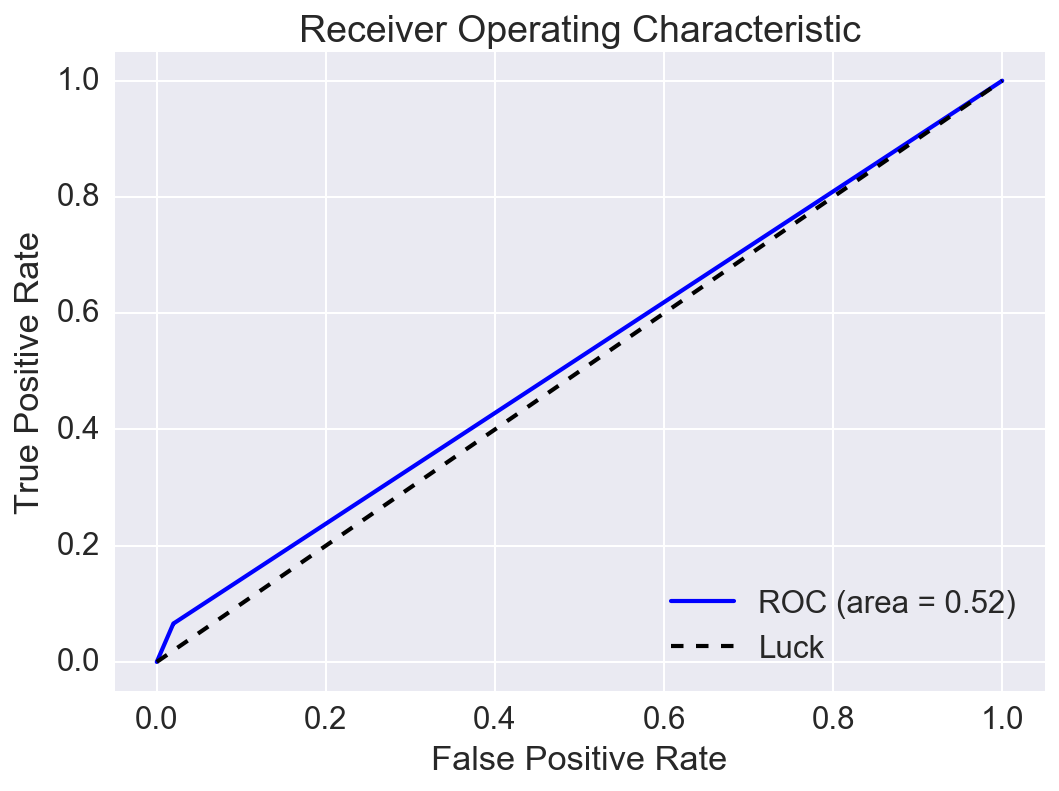

In [92]:
custom_roc(clf = mnb, x = xtest, y = ytest)

Once again, you can see that this model does not do very well and in fact it does just as well as flipping a coin. 

# Naive Bayes with resampled data

Let's try again with our resampled data which balances out the two classes in our dataset.  

In addition, we're also only going to use a subset of the features. This is because it is known that performance of Naive Bayes models suffer in domains that involve correlated features.  

*Naïve Bayes can suffer from oversensitivity to redundant and/or irrelevant attributes. If two or more attributes are highly correlated, they receive too much weight in the final decision as to which class an example belongs to. This leads to a decline in accuracy of prediction in domains with correlated features.* - Chotirat “Ann” Ratanamahatana Dimitrios Gunopulos at http://alumni.cs.ucr.edu/~ratana/DCAP02.pdf

In [93]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=1)
rf.fit(xtrain_resampled, ytrain_resampled)

selections = rf.feature_importances_ > 0.05

temp_xtrain = xtrain_resampled[:, selections]
temp_xtest = xtest[:, selections]

#print(rf.feature_importances_)
print(np.sum(selections), "features selected")

4 features selected


There are is one hyperparameter that we can tune for Multinomial Naive Bayes model. This is the laplace smoothing parameter. This is simply to ensure that no feature has a probability of 0 as this can be quite problematic in a Naive Bayes model.  
Consider the worst case scenario where none of the features in the training sample appear in the test data. In this case, under your model we would conclude that the data is impossible but it clearly exists, creating a contradiction. 

In [94]:
# prepare a range of alpha values to test
parameters = np.array([.1, 1, 5, 10, 50, 100, 1000])

# create and fit a MNB model, testing each alpha
grid = GridSearchCV(estimator = MultinomialNB(), 
                    param_grid = dict(alpha = parameters), 
                    cv = 5,
                    scoring = scorer)

grid = grid.fit(temp_xtrain, ytrain_resampled)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.610661442714
1000.0


Fit model with best parameters. 

In [95]:
mnb = MultinomialNB(alpha = grid.best_estimator_.alpha)
mnb.fit(temp_xtrain, ytrain_resampled)

MultinomialNB(alpha=1000.0, class_prior=None, fit_prior=True)

Let's see the overall accuracy we're getting this time round. 

In [96]:
print ("MN Overall Accuracy: %0.2f%%" % (100 * mnb.score(temp_xtest, ytest)))

MN Overall Accuracy: 53.91%


We get worse overall performance on this model but as we've said before, this does not tell the whole story.  

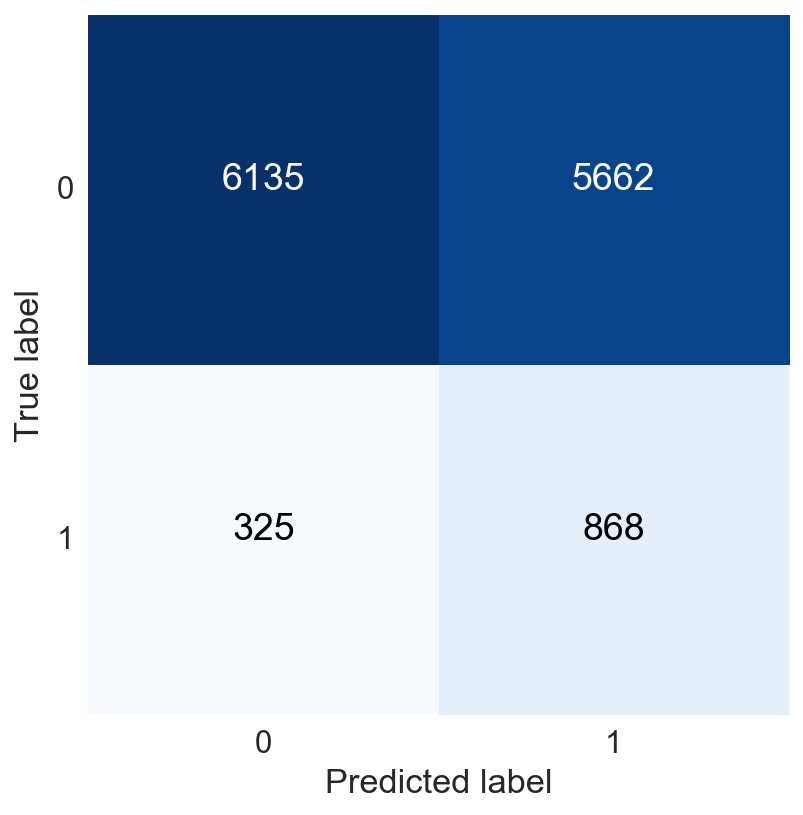

TP = 868
FP = 5662
TN = 6135
FN = 325
 
Precision ( or TPR) = 0.13
Specificity ( or TNR) = 0.52
Recall = 0.73
F1 = 0.22


In [97]:
custom_confusion_matrix(clf = mnb, x_data = temp_xtest, y_data = ytest)

In [98]:
custom_confusion_matrix(clf = mnb, x_data = temp_xtest, y_data = ytest, deck = True)

Although our precision and recall have decreased, we get a significantly better recall rate.  
Lets check some of our other evaluation measures. 

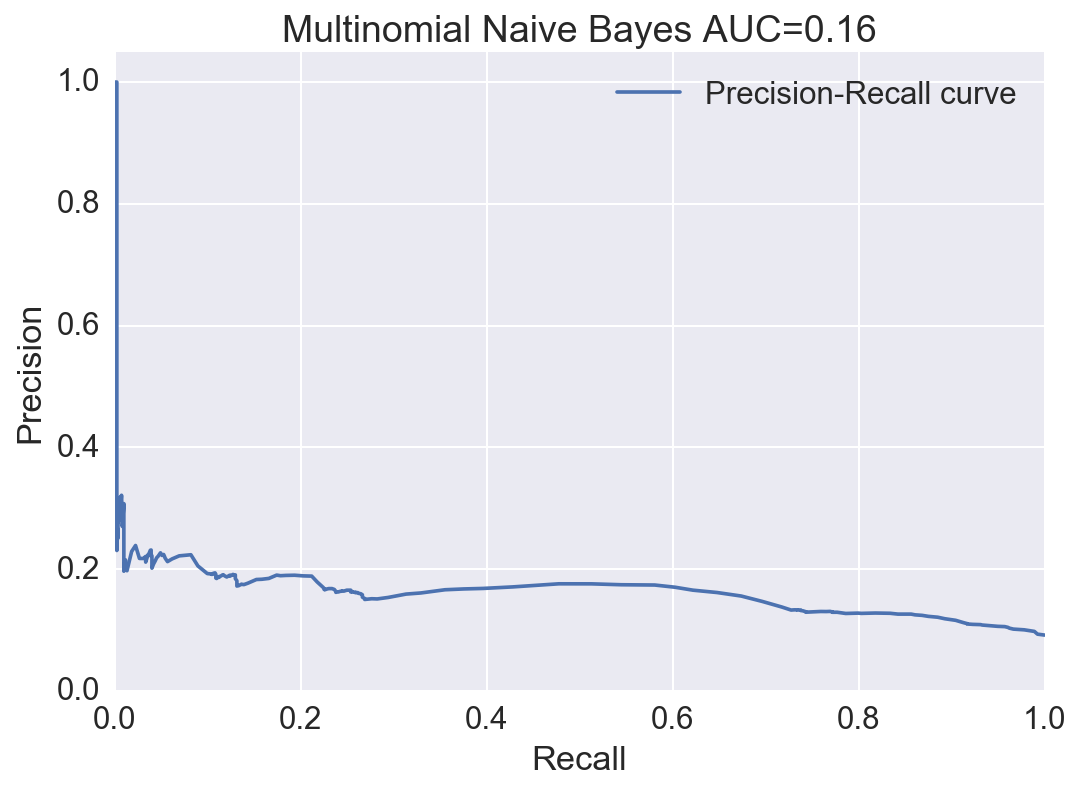

In [99]:
score(mnb, temp_xtest, ytest, 'Multinomial Naive Bayes')

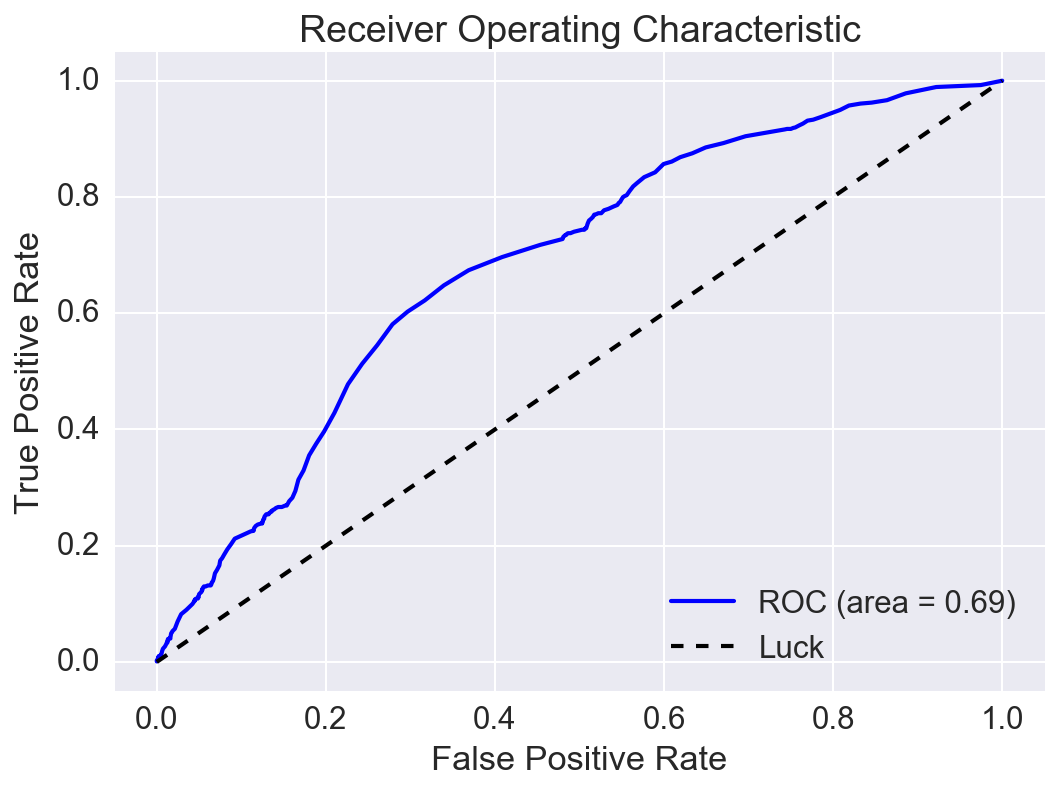

In [100]:
custom_roc(clf = mnb, x = temp_xtest, y = ytest)

Overall, it appears that we have a slightly better performing model this time round.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [101]:
class ColumnSelector(object):
    """
    A feature selector for scikit-learn's Pipeline class that returns
    specified columns from a numpy array.

    """

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, y=None):
        return X[:, self.cols]

    def fit(self, X, y=None):
        return self

In [102]:
pipeline_mnb = imblearn_Pipeline([('smote', smote),
                                  ('sel', ColumnSelector(selections)), # use only selected features
                                  ('mnb', mnb)])

pipeline_mnb

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('sel', <__main__.ColumnSelector object at 0x14aa8a2e8>), ('mnb', MultinomialNB(alpha=1000.0, class_prior=None, fit_prior=True))])

# K Nearest Neighbours

K Nearest Neighbours (more commonly referred to as kNN) is an algorithm starts off with a training dataset made up of examples that are classified into several categories. For each record in the test dataset, kNN identifies k records in the training data that are the "nearest" in similarity. This unlabeled test record is then assigned to the class of the majority of the k nearest neighbors. 

Its an extremely simple and sometimes effective algorithm. In addition, unlike multinomial naive bayes it makes absolutely no assumptions about the underlying data distribution. 

On the downside however, it doesn't produce a model, the prediction stage is extremely slow and it requires a large amount of memory (depending on the size of the training data). Furthermore, KNN is extremely susceptible to the curse of dimensionality.  

So let's try KNN.  

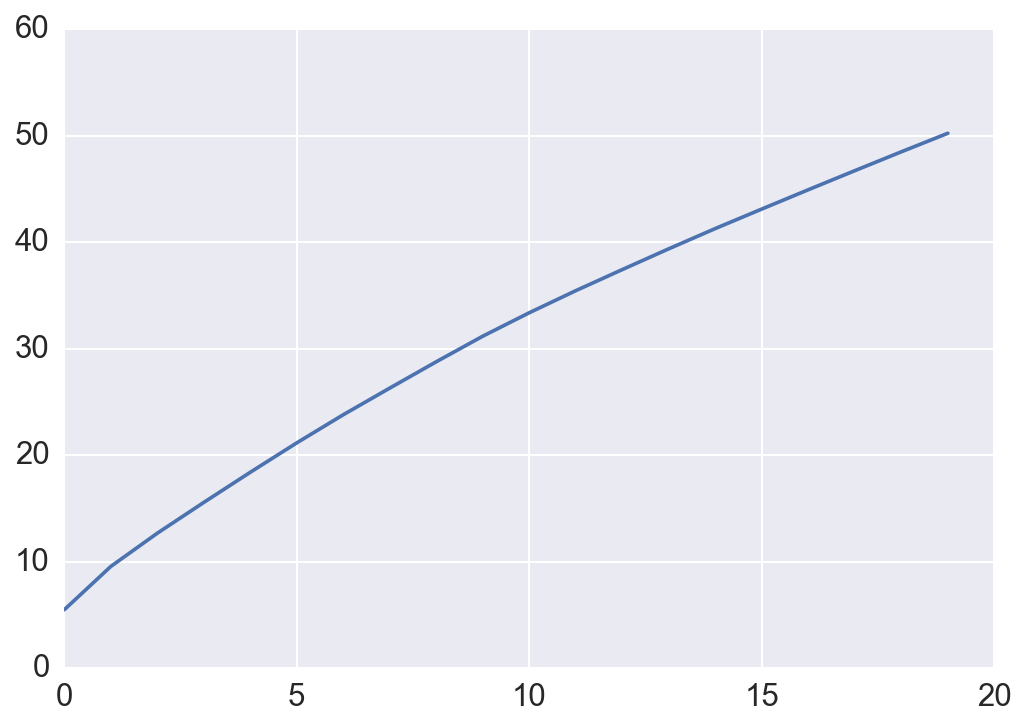

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

pca.fit(xtrain_std)

# The amount of variance that each PC explains
var = pca.explained_variance_ratio_

# Cumulative Variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print(var1)
plt.plot(var1)

Looking at the above plot, we see that we only need the first 100 principal components to explain 70% of the variance in our data.  
Let's grab those and create a new dataset. Note that we do not use resampled data because it really doesn't matter how imbalanced the dataset is for kNN. 

In [104]:
pca = PCA(n_components = 20)

pca.fit(xtrain_std)

xtrain_pca = pca.transform(xtrain_std)
xtest_pca = pca.transform(xtest_std)

There are several hyperparameters one can tune for this particular implementation of the KNN algorithm.  

* The number of neighbours is essentially the number of the most similar samples used to predict the class of each test sample.  
* The weights used refers to the weight function used in prediction. Possible values are:
 * ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
 * ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
 * [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.  
* The metric hyperparameter refers to the distance metric used.  
* The algorithm parameter refers to the algorithm used to compute the nearest neighbors: 
 * ‘ball_tree’ will use BallTree
 * ‘kd_tree’ will use KDTree
 * ‘brute’ will use a brute-force search.

In [105]:
from sklearn.neighbors import KNeighborsClassifier

if tuning==True:    

    # prepare a range of parameter values to test
    parameters = {'n_neighbors' : sp_randint(1, 200),
                  'weights': ['uniform', 'distance'],
                  'metric': ['minkowski', 'euclidean'
                            #, 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis'
                            ], 
                  'leaf_size': sp_randint(1, 100), 
                  'algorithm': ['ball_tree', 'kd_tree']}

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = KNeighborsClassifier(n_jobs=2), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_pca, ytrain)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_))) #0.25
    print(grid.best_params_)

Fit model with best parameters. 

In [106]:
if tuning==True:

    knn = KNeighborsClassifier(**grid.best_params_)

if tuning==False:
    
    # For max overall score
    #knn = KNeighborsClassifier(metric = 'euclidean', 
    #                           algorithm = 'kd_tree', 
    #                           n_neighbors = 13, 
    #                           leaf_size = 76, 
    #                           weights = 'distance',
    #                           n_jobs = 2)
    
    # For max precision
    knn = KNeighborsClassifier(leaf_size = 59, 
                               n_neighbors = 10, 
                               weights = 'uniform', 
                               algorithm = 'ball_tree', 
                               metric = 'minkowski',
                               n_jobs = 2)

knn.fit(xtrain_pca, ytrain)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=59, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=10, p=2,
           weights='uniform')

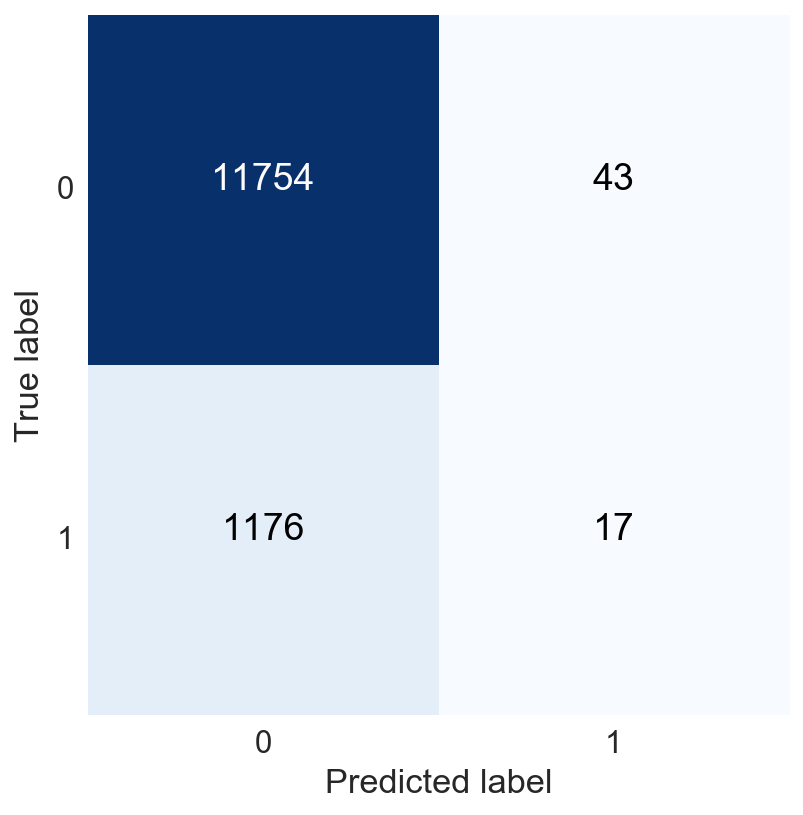

TP = 17
FP = 43
TN = 11754
FN = 1176
 
Precision ( or TPR) = 0.28
Specificity ( or TNR) = 1.0
Recall = 0.01
F1 = 0.03


In [107]:
custom_confusion_matrix(clf = knn, x_data = xtest_pca, y_data = ytest)

In [108]:
#score(knn, temp_xtest, ytest, 'k Nearest Neighbours')
#knn does not have a predict_proba method, obviously

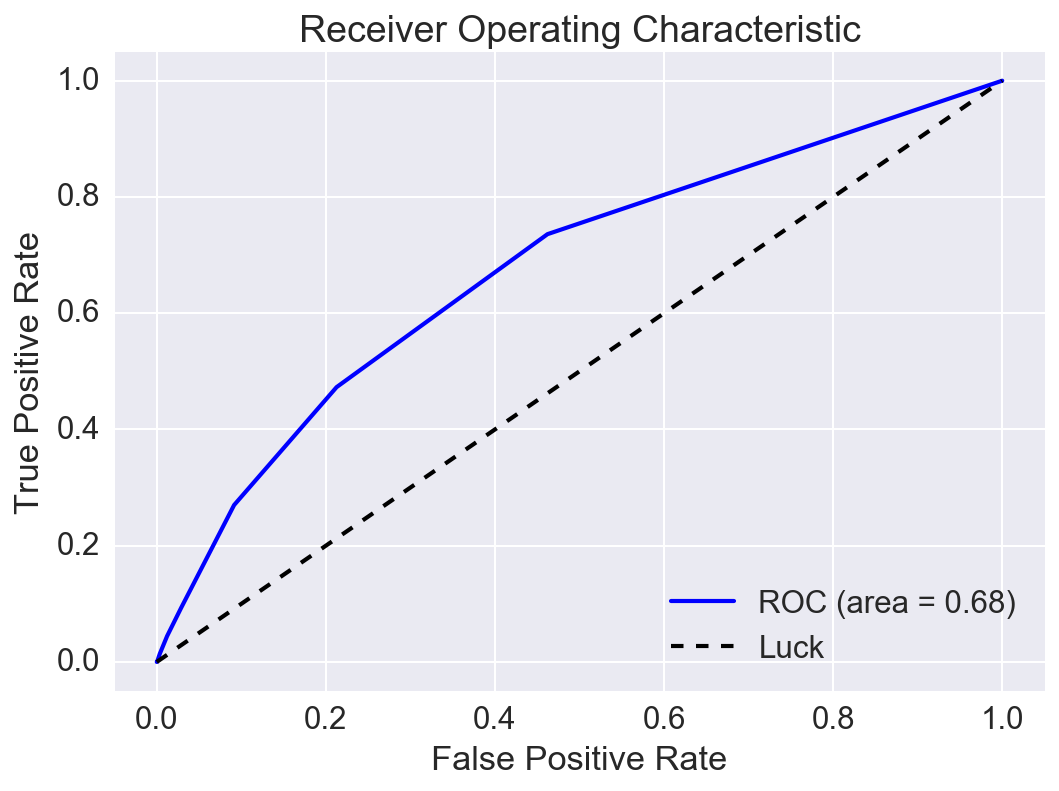

In [109]:
custom_roc(clf = knn, x = xtest_pca, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [110]:
pipeline_knn = imblearn_Pipeline([('sc', sc), ('pca_knn', PCA(n_components = 20)), ('knn', knn)])

pipeline_knn

Pipeline(steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_knn', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='ball_tree', leaf_size=59, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=10, p=2,
           weights='uniform'))])

# SVM

Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). 


In [111]:
from sklearn.linear_model import SGDClassifier

SVM's need a lot of computing power for high dimensional data.  
Instead, we will just extract some principal components instead to reduce the dimensionality of the data instead. 

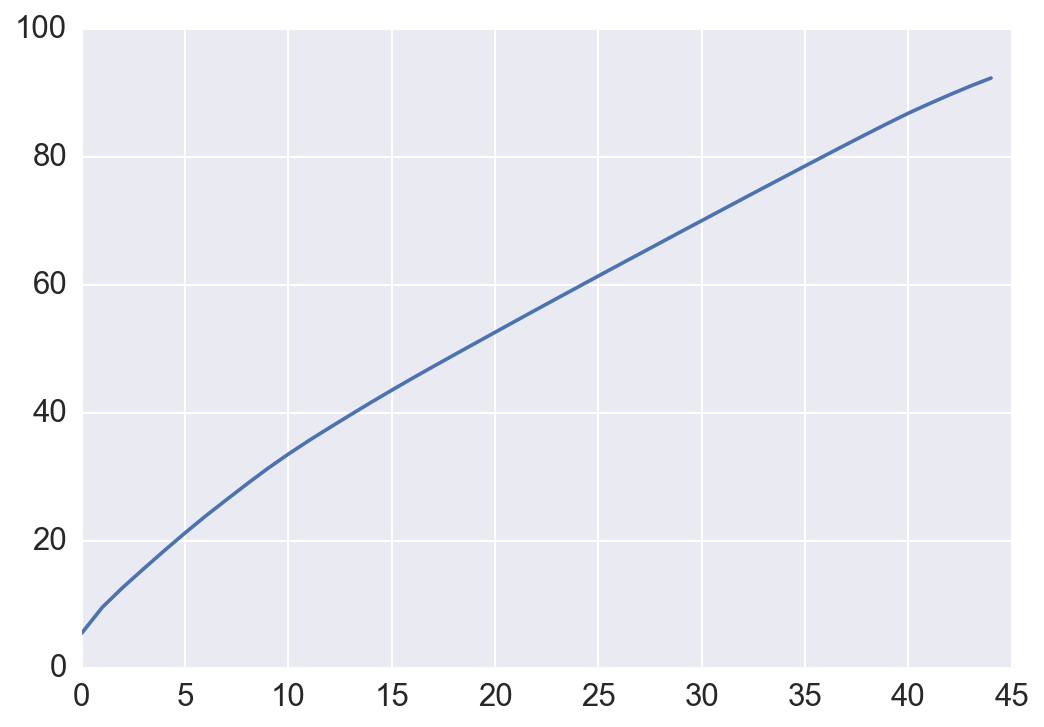

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 45)

pca.fit(xtrain_std)

# The amount of variance that each PC explains
var = pca.explained_variance_ratio_

# Cumulative Variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print(var1)
plt.plot(var1)

Looking at the above plot, we see that we only need the first 100 principal components to explain 70% of the variance in our data.  
Let's grab those and create a new dataset. 

In [113]:
pca = PCA(n_components = 45)

pca.fit(xtrain_resampled_std)

xtrain_resampled_pca = pca.transform(xtrain_resampled_std)
xtest_pca = pca.transform(xtest_std)

There are several hyperparameters one can tune for this particular implementation of the SVM algorithm.  

We set the loss function to ‘hinge’ which gives us a linear SVM.  
The regularizer is a penalty added to the loss function that shrinks model parameters towards zero.  
The learning rate is simply the 
Class weight refers to the weights associated with our 2 classes. If not given, both classes are given a weight of one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. 

In [114]:
# prepare a range of parameter values to test
parameters = {'loss': ['hinge'], #['log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['none', 'l2', 'l1', 'elasticnet'], 
              'learning_rate': ['constant', 'optimal', 'invscaling'],
              'class_weight': ['balanced', None], 
              'eta0': sp_uniform_rand(0, 1)}

# create and fit a decision tree, testing each parameter with random samples
grid = RandomizedSearchCV(estimator = SGDClassifier(n_jobs=2, random_state = 0), 
                          param_distributions = parameters,
                          scoring = scorer,
                          cv = 5,
                          n_iter = 200)

grid = grid.fit(xtrain_resampled_pca, ytrain_resampled)

# summarize the results of the grid search
print('Best score', str(round(grid.best_score_, 2)))
print(grid.best_params_)

Best score 0.68
{'learning_rate': 'invscaling', 'class_weight': 'balanced', 'penalty': 'l1', 'eta0': 0.79442900777006487, 'loss': 'hinge'}


Fit model with best parameters. 

In [115]:
if tuning==True:

    svm = SGDClassifier(**grid.best_params_)
    
if tuning==False:
    
    # For max overall score
    #svm = SGDClassifier(learning_rate = 'invscaling', 
    #                    loss = 'hinge', 
    #                    penalty = 'l2',
    #                    class_weight =  None, 
    #                    eta0 = 0.93888080985266731)
    
    # For max precision
    svm = SGDClassifier(learning_rate = 'invscaling', 
                        loss = 'hinge', 
                        penalty = 'none',
                        class_weight = 'balanced', 
                        eta0 = 0.52323079051731769, 
                        random_state = 0)
    
svm.fit(xtrain_resampled_pca, ytrain_resampled)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.5232307905173177, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='hinge', n_iter=5,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       verbose=0, warm_start=False)

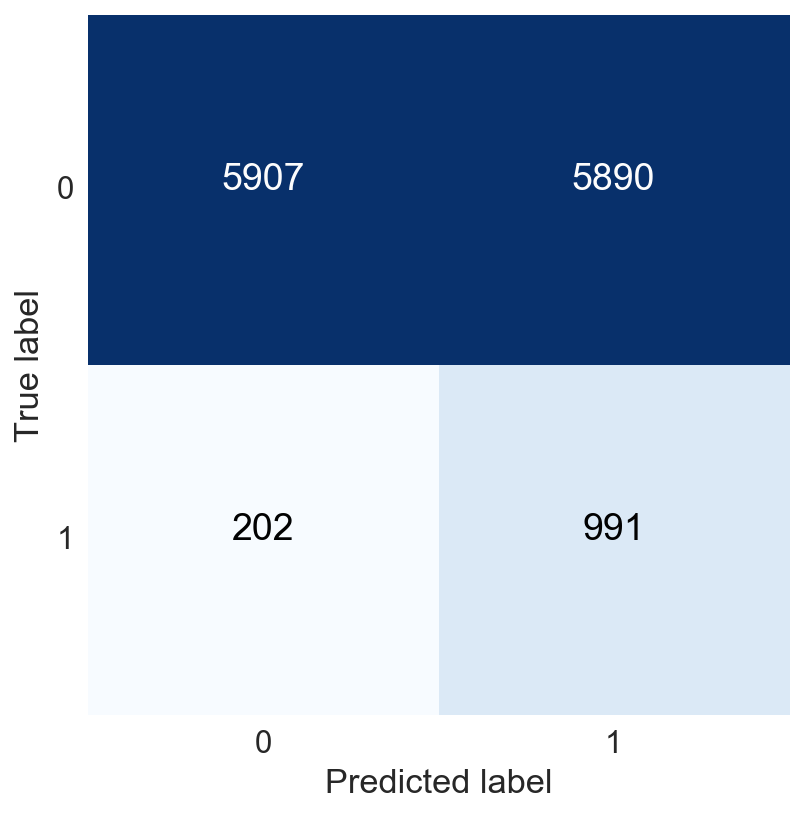

TP = 991
FP = 5890
TN = 5907
FN = 202
 
Precision ( or TPR) = 0.14
Specificity ( or TNR) = 0.5
Recall = 0.83
F1 = 0.25


In [116]:
custom_confusion_matrix(clf = svm, x_data = xtest_pca, y_data = ytest)

In [117]:
#score(svm, xtest_pca, ytest, 'SVM')
#probability estimates are not available for loss='hinge' i.e. SVM

In [118]:
#custom_roc(clf = svm, x = xtest_pca, y = ytest)
#probability estimates are not available for loss='hinge' i.e. SVM

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [119]:
pipeline_svm = imblearn_Pipeline([('smote', smote),
                                  ('sc', sc),
                                  ('pca_svm', PCA(n_components = 45)), 
                                  ('svm', svm)])

pipeline_svm

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_svm', PCA(copy=True, iterated_power='auto', n_components=45,...=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       verbose=0, warm_start=False))])

# Decision Tree

Decision tree learners build a model in the form of a tree structure.  

As is implied in the name, decision tree models comprise of a series of logical decisions with decision nodes that indicate a decision to be made on an attribute. Each of these decision nodes split into branches that indicate the decision's choices. The tree is terminated at leaf nodes (sometimes referred to as terminal nodes) that states the result of following a combination of decisions.  

As the decision tree actually builds a model in the style of a flowchart, it is extremely useful for interpretation purposes. It's also useful for applications where transparency is required.  

On the downside though, they can be extremely sensitive to small perturbations in the data. They also tend to overfit although this can be emedied either through validation methods and/or pruning.

In [120]:
from sklearn.tree import DecisionTreeClassifier

There are a few hyperparameters one can tune for Decision Tree models.  

* criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* splitter refers totThe strategy used to choose the split at each node. This can be either “best” or “random.”

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* bootstrap refers to whether bootstrap samples are used when building trees.

* class_weight : These are the weights associated with classes. This can be:
 * “balanced” uses the values of y to automatically adjust weights inversely proportional to class frequencies 
 * None (all classes are supposed to have weight one)

In [121]:
if tuning==True:

    parameters = {'criterion': ['gini', 'entropy'], 
                  'splitter': ['best', 'random'],
                  'max_features': sp_uniform_rand(0, 1),
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'class_weight': ['balanced', None]
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2)))
    print(grid.best_params_)

Let's fit a Decision Tree model with the best parameters we got from our cross validation procedure above. 

In [122]:
if tuning==True:
    
    tree = DecisionTreeClassifier(**grid.best_params_)
    
if tuning==False:
    
    # for max overall score   
    #tree = DecisionTreeClassifier(class_weight = None, 
    #                              min_samples_leaf = 15, 
    #                              min_samples_split = 844, 
    #                              max_depth = 197, 
    #                              max_features = 0.470755200073251, 
    #                              splitter = 'best', 
    #                              criterion = 'entropy', 
    #                              min_weight_fraction_leaf = 0.0035488332005566003,
    #                              random_state = 0)
    
    # for max precision
    tree = DecisionTreeClassifier(min_samples_split = 912, 
                                  class_weight = None, 
                                  max_depth = 112, 
                                  min_samples_leaf = 978, 
                                  splitter = 'best', 
                                  criterion = 'gini', 
                                  min_weight_fraction_leaf = 0.23549902595957611, 
                                  max_features = 0.94175560228777766,
                                  random_state = 0)

tree.fit(xtrain_resampled, ytrain_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=112,
            max_features=0.9417556022877777, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=978,
            min_samples_split=912,
            min_weight_fraction_leaf=0.2354990259595761, presort=False,
            random_state=0, splitter='best')

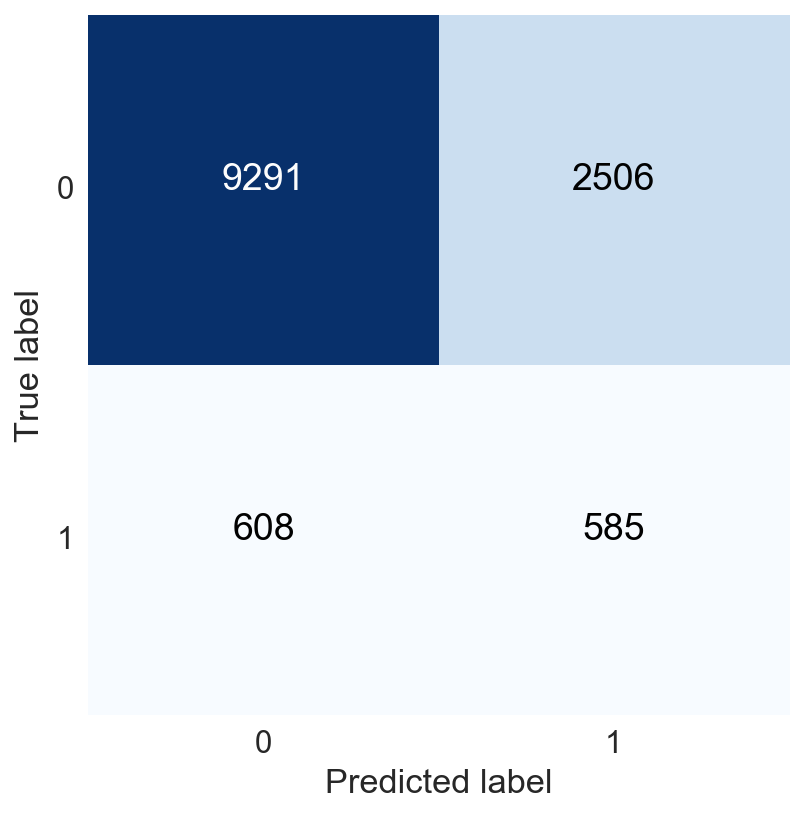

TP = 585
FP = 2506
TN = 9291
FN = 608
 
Precision ( or TPR) = 0.19
Specificity ( or TNR) = 0.79
Recall = 0.49
F1 = 0.27


In [123]:
custom_confusion_matrix(clf = tree, x_data = xtest, y_data = ytest)

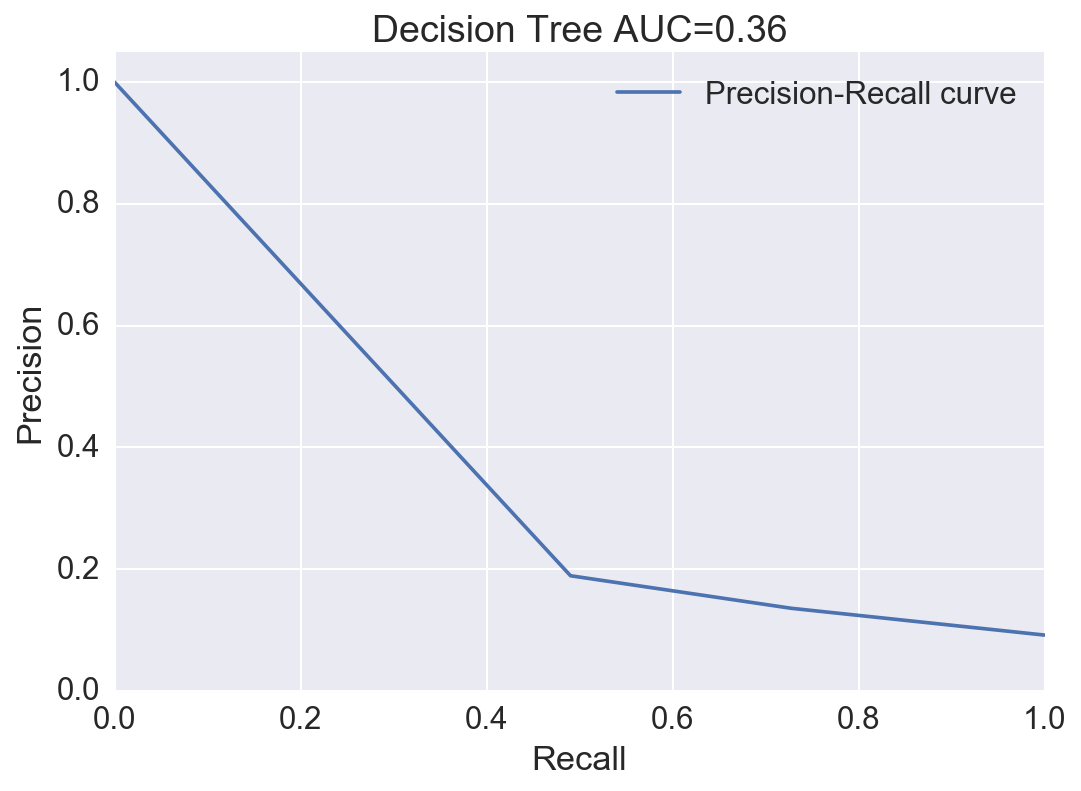

In [124]:
score(tree, xtest, ytest, 'Decision Tree')

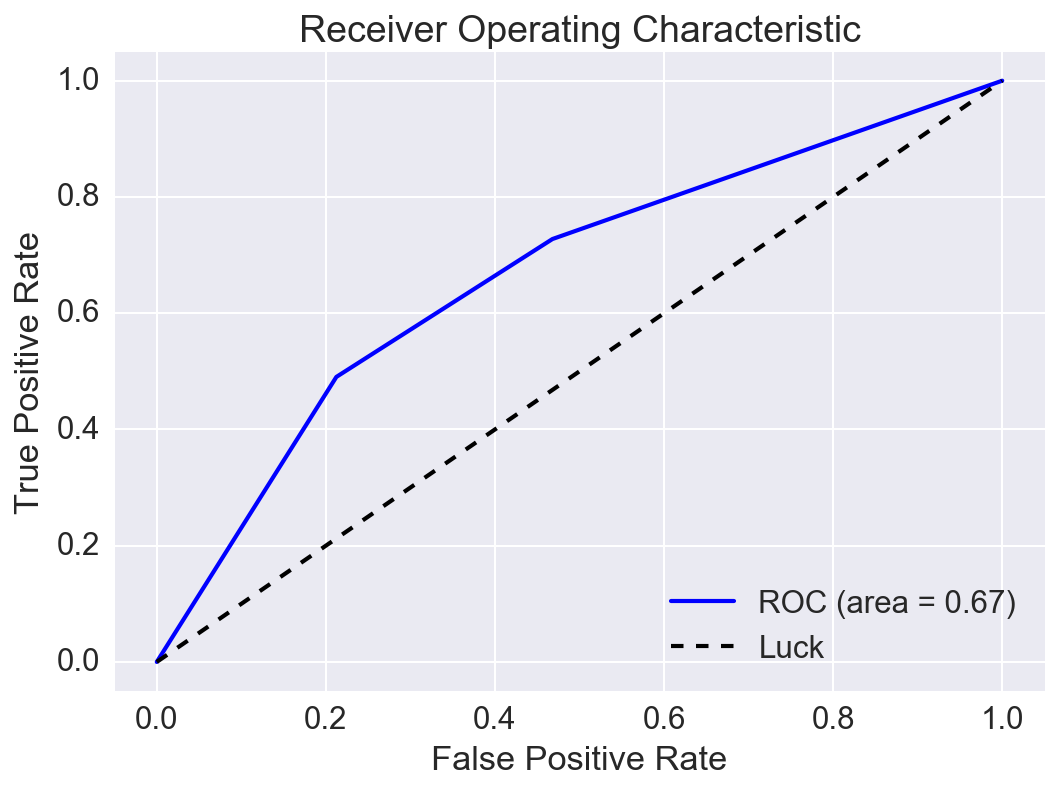

In [125]:
custom_roc(clf = tree, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [126]:
pipeline_tree = imblearn_Pipeline([('smote', smote),
                                   ('tree', tree)])

pipeline_tree

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=112,
            max_features=0.9417556022877777, max...ight_fraction_leaf=0.2354990259595761, presort=False,
            random_state=0, splitter='best'))])

# Random Forests

The Random Forests model is a form of Bootstrap aggregating, more commonly referred to as bagging.  

Bagging is a technique for reducing the variance of your prediction by generating additional data for training from your training data. By drawing combinations with replacemenet, you are able to produce multisets of the same cardinality/size as your original training data. 

In addition to bagging, the Random Forests model adds random feature selection to further increase the diversity of the underlying decision tree models. This helps to avoid overfitting. After the ensemble of trees is generated, the model uses a vote to combine the trees' predictions and make a final prediction. 

It is one of the most accurate learning algorithms available. It has a relatively small number of hyper-paramters that require tuning. It can handle high dimensional datasets. It can be used to get estimates of what variables are important in the classification. Also, its a very efficient algorithm!

On the downside though, Random Forests model are not very interpretable. There is also evidence to suggest that the Random Forests models tend to overfit on datasets with noisy classification tasks.

In [127]:
from sklearn.ensemble import RandomForestClassifier

There are a few hyperparameters one can tune for Random Forests models.  

* n_estimators refers to the number of trees in the forest. Generally, you want this as high as possible. The only limit really is the amount of computational power available to you. 

* Criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* bootstrap refers to whether bootstrap samples are used when building trees.

* class_weight : These are the weights associated with classes. This can be:
 * “balanced” uses the values of y to automatically adjust weights inversely proportional to class frequencies 
 * “balanced_subsample” is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown
 * None (all classes are supposed to have weight one)


In [128]:
if tuning==True:

    # prepare a range of parameter values to test
    parameters = {'n_estimators' : [10, 100, 500], 
                  'criterion': ['gini', 'entropy'], 
                  'max_features': sp_uniform_rand(0, 1), # chooses a percentage of features between 0 and 1
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'bootstrap': [True],
                  'class_weight': ['balanced', 'balanced_subsample', None]
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0, n_jobs = 2), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2))) #0.25
    print(grid.best_params_)

Let's fit a Random Forests model with the best parameters we got from our cross validation procedure above. 

In [129]:
if tuning==True:

    forest = RandomForestClassifier(**grid.best_params_)
    
if tuning==False:

    # for max overall score
    #forest = RandomForestClassifier(class_weight = 'balanced', 
    #                                min_samples_leaf = 95, 
    #                                min_samples_split = 337, 
    #                                max_depth = 171, 
    #                                max_features = 0.89878843971842626, 
    #                                n_estimators = 100, 
    #                                criterion = 'entropy',
    #                                min_weight_fraction_leaf = 0.0076717996317994808,
    #                                n_jobs = 2)
    
    # for max precision
    forest = RandomForestClassifier(n_estimators = 500, 
                                    min_samples_split = 168, 
                                    bootstrap = True, 
                                    max_depth = 104, 
                                    min_samples_leaf = 501, 
                                    criterion = 'entropy', 
                                    min_weight_fraction_leaf = 0.0045344988718392099, 
                                    max_features = 0.29955876174028062, 
                                    class_weight = 'balanced_subsample', 
                                    random_state = 0)

forest.fit(xtrain_resampled, ytrain_resampled)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=104,
            max_features=0.2995587617402806, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=501,
            min_samples_split=168,
            min_weight_fraction_leaf=0.00453449887183921, n_estimators=500,
            n_jobs=1, oob_score=False, random_state=0, verbose=0,
            warm_start=False)

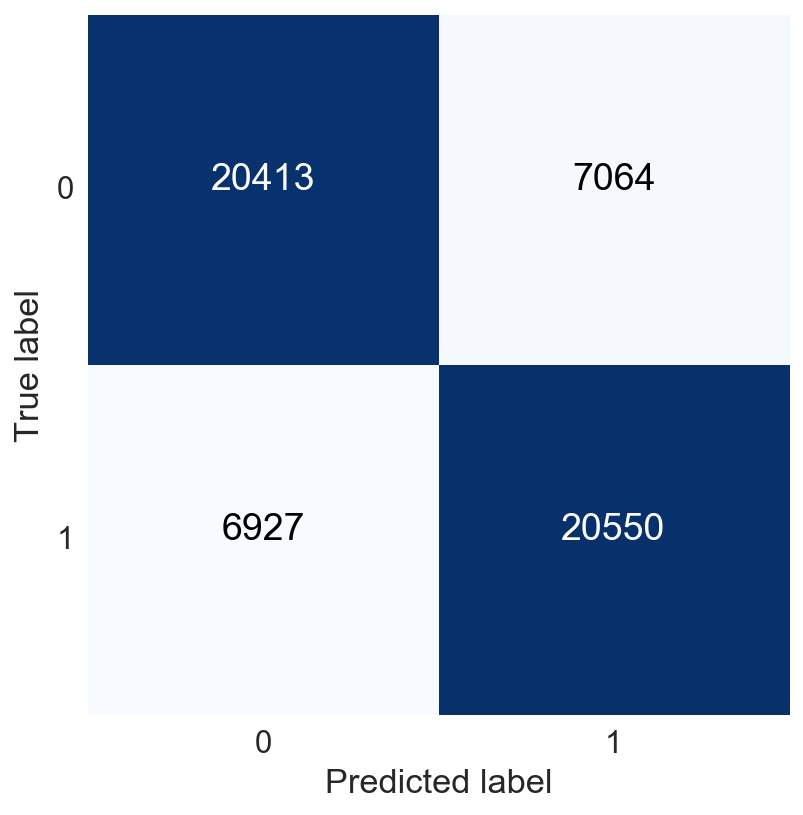

TP = 20550
FP = 7064
TN = 20413
FN = 6927
 
Precision ( or TPR) = 0.74
Specificity ( or TNR) = 0.74
Recall = 0.75
F1 = 0.75


In [130]:
custom_confusion_matrix(clf = forest, x_data = xtrain_resampled, y_data = ytrain_resampled)

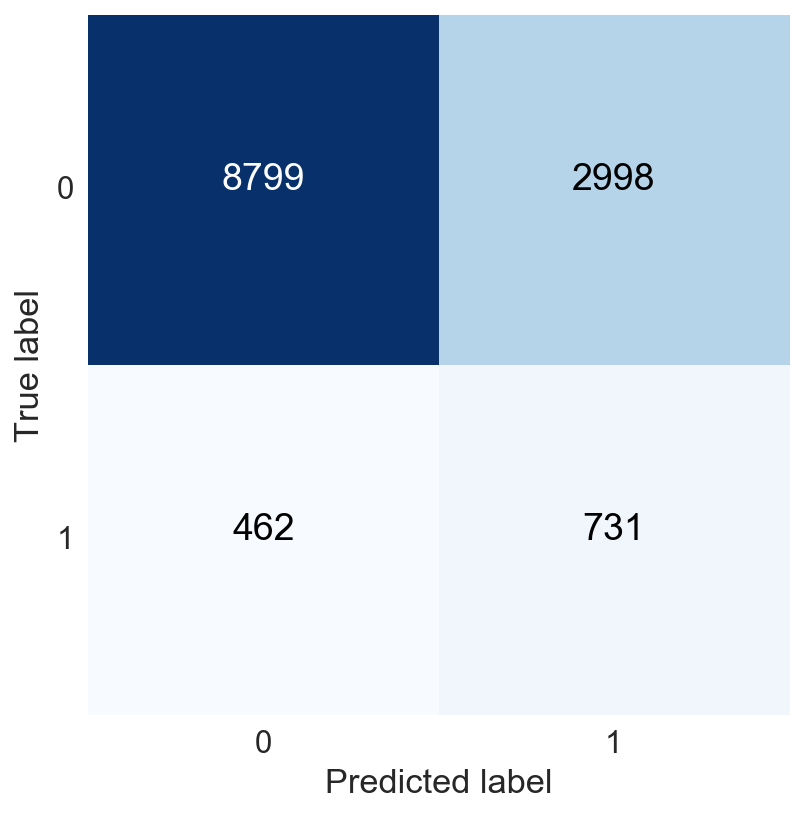

TP = 731
FP = 2998
TN = 8799
FN = 462
 
Precision ( or TPR) = 0.2
Specificity ( or TNR) = 0.75
Recall = 0.61
F1 = 0.3


In [131]:
custom_confusion_matrix(clf = forest, x_data = xtest, y_data = ytest)

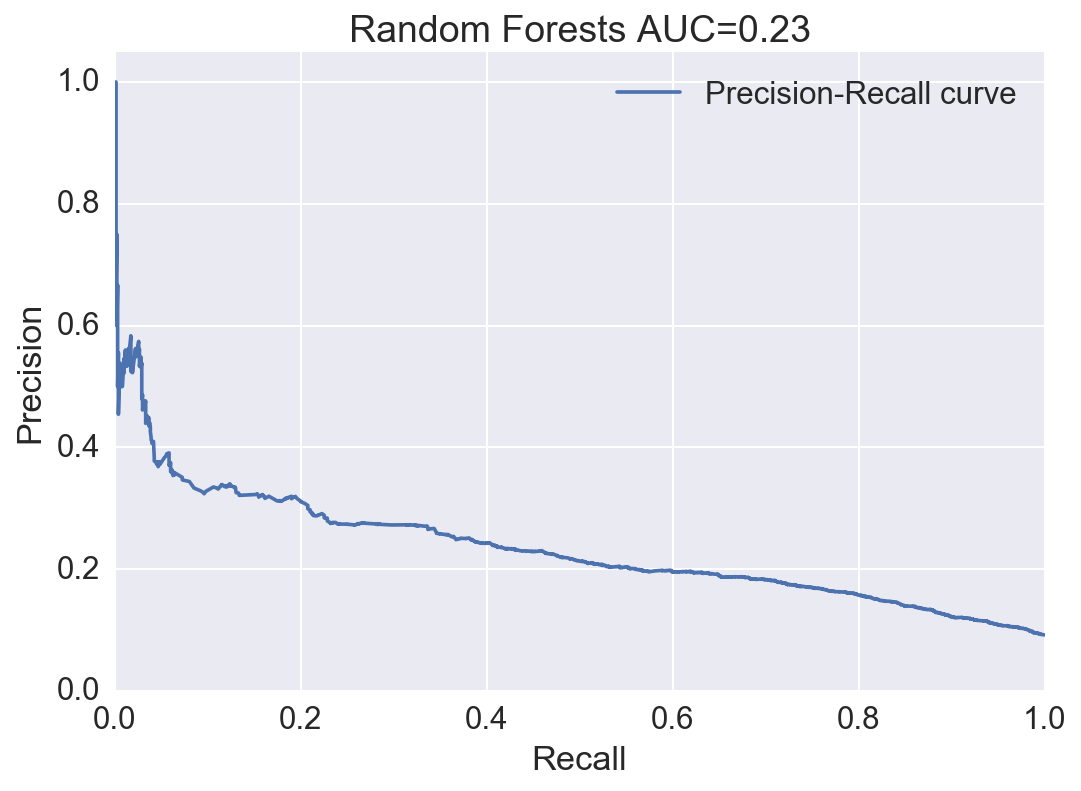

In [132]:
score(forest, xtest, ytest, 'Random Forests')

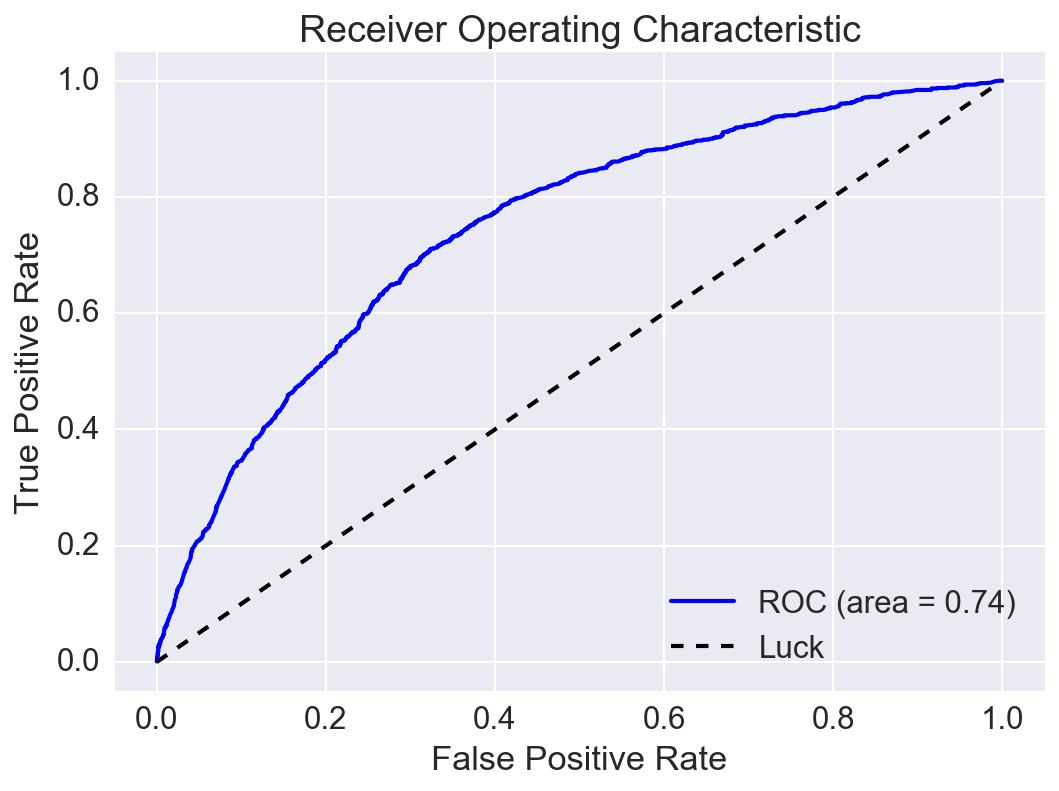

In [133]:
custom_roc(clf = forest, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [134]:
pipeline_forest = imblearn_Pipeline([('smote', smote),
                                     ('forest', forest)])

pipeline_forest

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('forest', RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=104,...0,
            n_jobs=1, oob_score=False, random_state=0, verbose=0,
            warm_start=False))])

Another valuble piece of information we can get from Random Forests models is feature importance.  

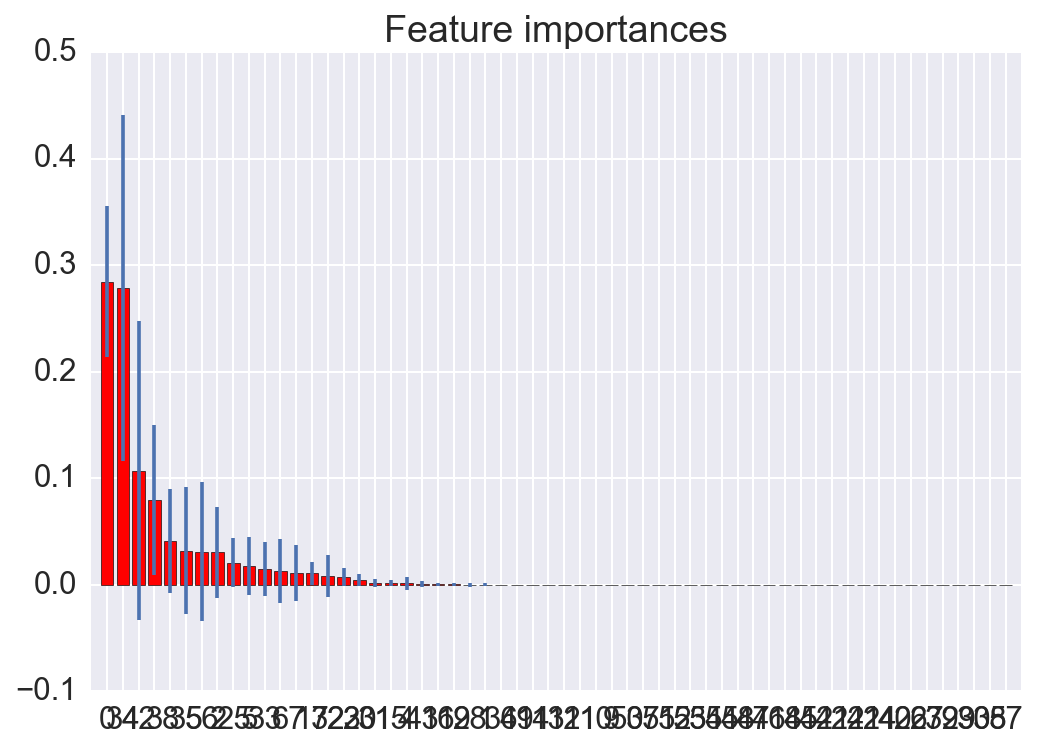

In [135]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")
#for f in range(x.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

# Gradient Boosting

While Random Forests models utilize bagging principles, Gradient Boosting are a boosting method. 

Boosting is an ensembling technique, i.e. a prediction is made by an ensemble of simpler estimators, usually decision trees. 

When you add more decision trees to a random forest, they decide what they think **independently** of all the other trees. This is to say that they learn on their own. When it's time to make a prediction, each decision tree throws in its own uninfluenced opinion into the pot and the average decision is the prediction.  

Gradient boosting is similar in that there are several decision trees that also each make a vote. The difference is that there is a **chain** of decision trees. Instead of each tree learning in isolation, each time you add a new tree, the new tree tries to improve a bit on what the rest of the chain already thinks. The "improvement" here is to find areas of misclassification and then “boost” the importance of those incorrectly predicted data points. And then repeat. 

In the interests of clarity, below is a step by step breakdown of how the algorthms works:  

 1. Beginning with an unweighted dataset, the first classifier attempts to model the outcome.  
 2. Examples that the classifier predicted correctly will be less likely to appear in the training dataset for the following classifier. Conversely, this means that the difficult-to-classify examples will appear more frequently in the training dataset.  
 3. As additional rounds of weak learners are added, they are trained on data with successively more difficult examples. The process continues until the desired overall error rate is reached or performance no longer improves. 
 4. At this point, each classifier's vote is weighted according to its accuracy on the training data on which it was built.  

The great thing about gradient boosting is that it is highly customizable to the particular needs of the application,e.g. they can be learned with respect to different loss functions. 

On the downside though, this means they need a lot of tuning to get to optimal performance. The sequential nature of the boosting method also means that it cannot be parallelized and therefore takes longer to learn.  

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

There are a few hyperparameters one can tune for Gradient models.  

* n_estimators refers to the number of trees in the forest. Generally, you want this as high as possible. The only limit really is the amount of computational power available to you. 

* Criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* subsample refers to the fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting and also a reduction of variance and an increase in bias.

In [137]:
if tuning==True:

    # prepare a range of parameter values to test
    parameters = {'loss': ['deviance', 'exponential'],
                  'learning_rate': sp_uniform_rand(0,1), 
                  'n_estimators' : [10, 100, 500], 
                  'criterion': ['friedman_mse'], 
                  'max_features': sp_uniform_rand(0, 1),
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'subsample': sp_uniform_rand(0,1)
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 0), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2)))
    print(grid.best_params_)

Let's fit a Gradient Boosted Trees model with the best parameters we got from our cross validation procedure above. 

In [138]:
if tuning==True:

    gbc = GradientBoostingClassifier(**grid.best_params_)

if tuning==False:

    # for max overall score
    #gbc = GradientBoostingClassifier(max_features = 0.93279347770335852, 
    #                                 min_samples_leaf = 285,
    #                                 min_samples_split = 465,
    #                                 max_depth = 77,
    #                                 learning_rate = 0.19128343814331872, 
    #                                 loss = 'exponential', 
    #                                 subsample = 0.63670954449124284, 
    #                                 n_estimators = 500, 
    #                                 criterion = 'friedman_mse', 
    #                                 min_weight_fraction_leaf = 0.012679640800067338)
    
    # for max precision
    gbc = GradientBoostingClassifier(min_samples_leaf = 314, 
                                     min_samples_split = 902, 
                                     max_depth = 13, 
                                     n_estimators = 100, 
                                     learning_rate = 0.40925918389231597, 
                                     subsample = 0.58380118878195797, 
                                     criterion = 'friedman_mse', 
                                     loss = 'deviance', 
                                     max_features = 0.72238967745915206, 
                                     min_weight_fraction_leaf = 0.0096872007938483273, 
                                     random_state = 0)

gbc.fit(xtrain_resampled, ytrain_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40925918389231597, loss='deviance',
              max_depth=13, max_features=0.7223896774591521,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=314, min_samples_split=902,
              min_weight_fraction_leaf=0.009687200793848327,
              n_estimators=100, presort='auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False)

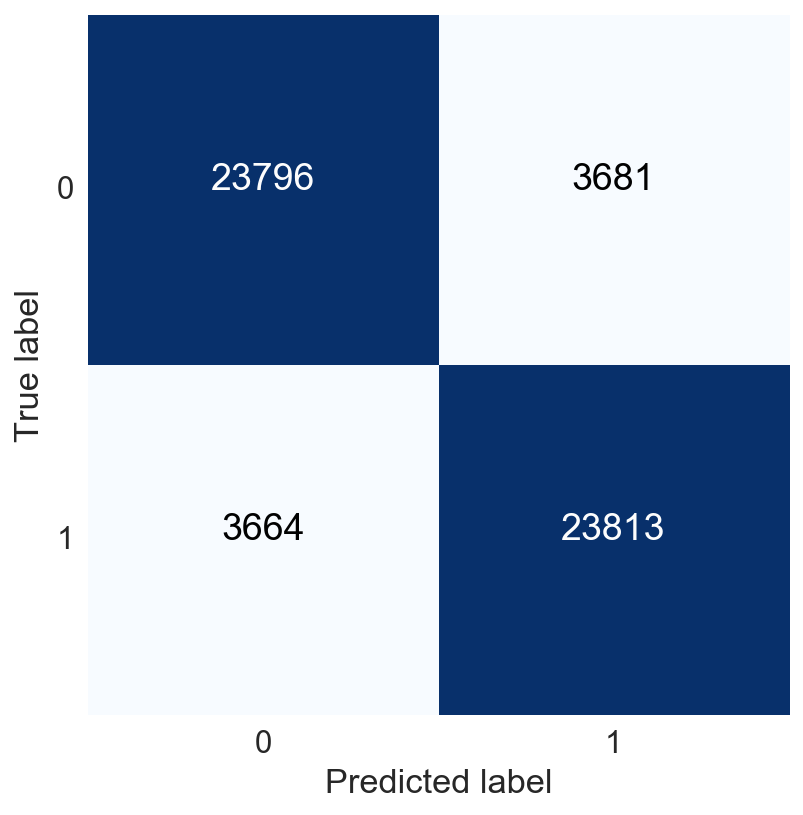

TP = 23813
FP = 3681
TN = 23796
FN = 3664
 
Precision ( or TPR) = 0.87
Specificity ( or TNR) = 0.87
Recall = 0.87
F1 = 0.87


In [139]:
custom_confusion_matrix(clf = gbc, x_data = xtrain_resampled, y_data = ytrain_resampled)

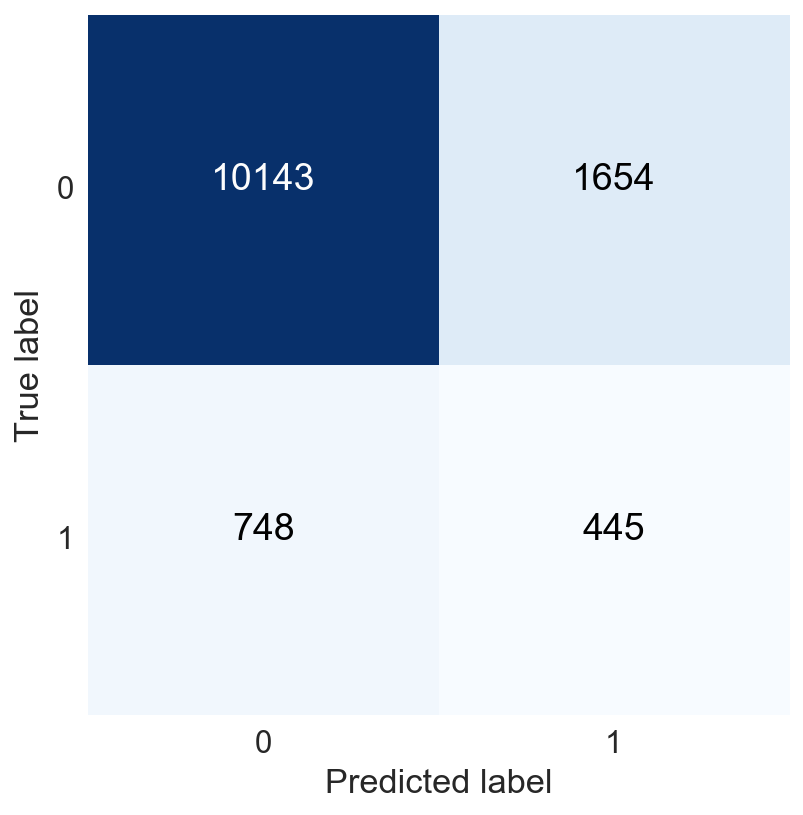

TP = 445
FP = 1654
TN = 10143
FN = 748
 
Precision ( or TPR) = 0.21
Specificity ( or TNR) = 0.86
Recall = 0.37
F1 = 0.27


In [140]:
custom_confusion_matrix(clf = gbc, x_data = xtest, y_data = ytest)

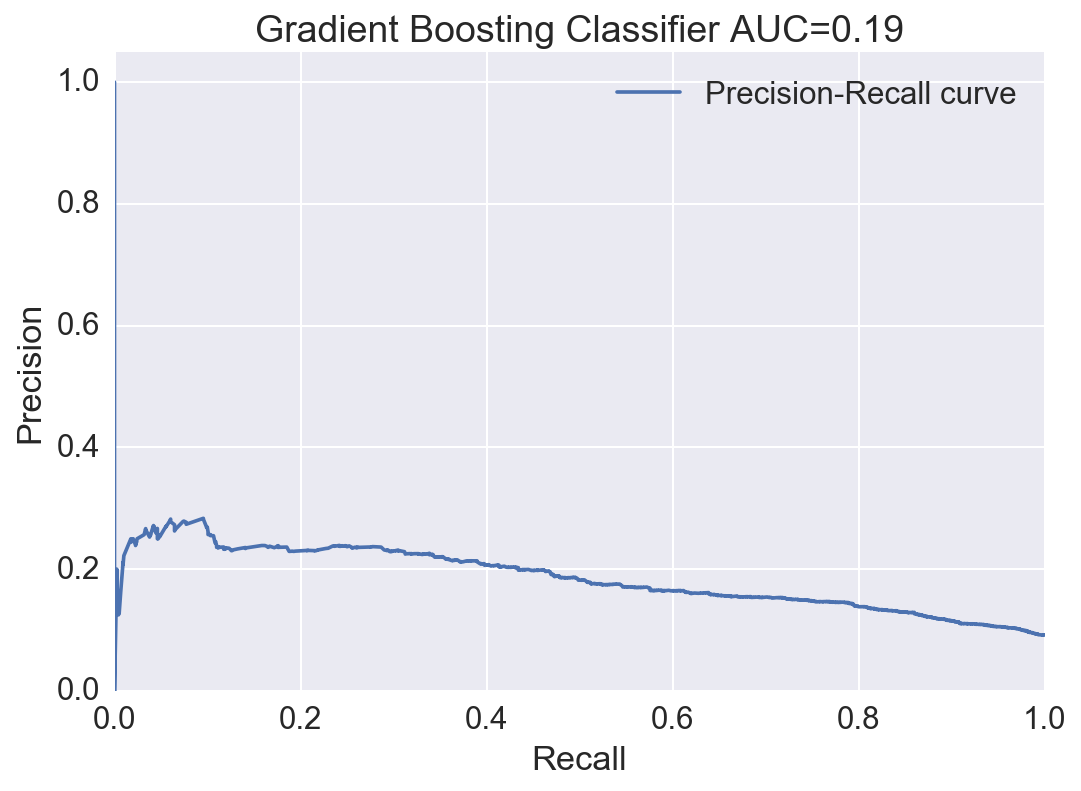

In [141]:
score(gbc, xtest, ytest, 'Gradient Boosting Classifier')

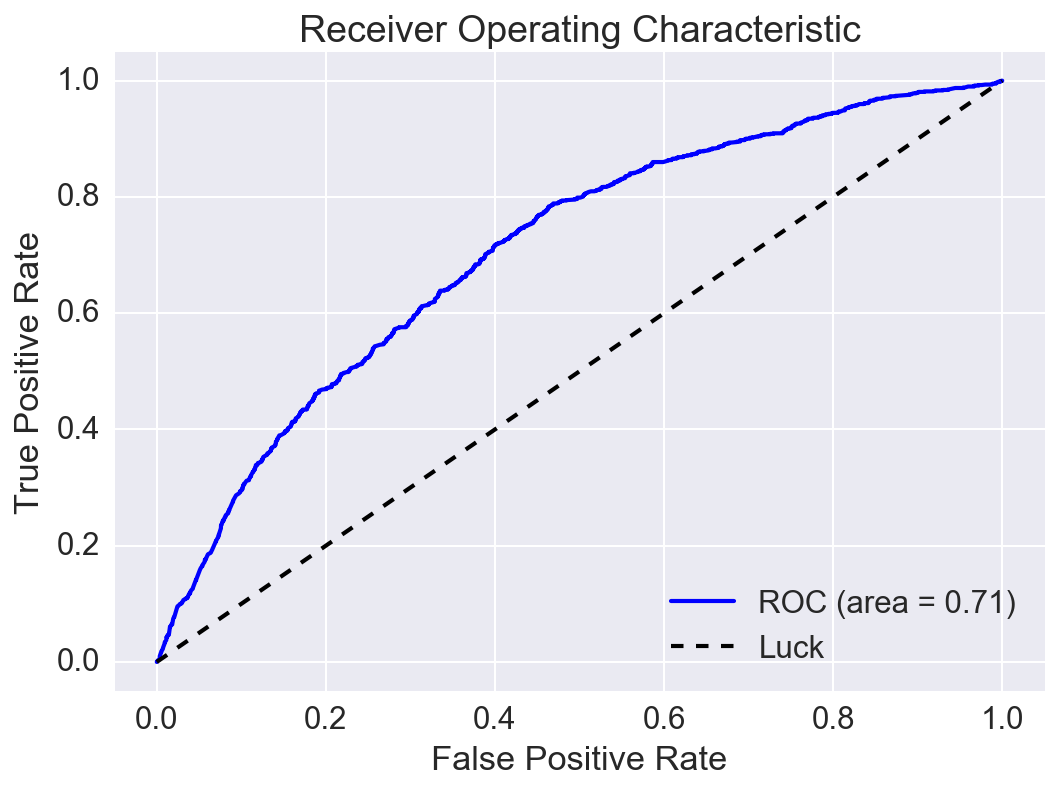

In [142]:
custom_roc(clf = gbc, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [143]:
pipeline_gbc = imblearn_Pipeline([('smote', smote),
                                  ('gbc', gbc)])

pipeline_gbc

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40925918389231597, loss='devia...rt='auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False))])

# Ensemble

Now, let's take each of our best models and combine them such that the majority vote determines the final prediction for each company.  

In [155]:
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('MNB', pipeline_mnb)) # excluded as based model
#estimators.append(('KNN', pipeline_knn)) # very slow & no probability estimates for this one so cannot be used with soft voting
#estimators.append(('SVM', pipeline_svm)) # very slow & no probability estimates for this one so cannot be used with soft voting
estimators.append(('DT', pipeline_tree))
estimators.append(('RF', pipeline_forest))
estimators.append(('GBC', pipeline_gbc))

# create the ensemble model
ensemble = VotingClassifier(estimators, 
                            voting = 'soft', # 'soft' means probability from each classifier is multiplied by respective weight
                            weights = None, # Uses uniform weights if None. 
                            #weights = [0.8, 1.2, 1, 1.5],
                            n_jobs = -1)

ensemble.fit(xtrain, ytrain)

VotingClassifier(estimators=[('MNB', Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('sel', <__main__.ColumnSelector object at 0x14aa8a2e8>), ('mnb', MultinomialNB(alpha=1000.0, class_pri...'auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False))]))],
         n_jobs=-1, voting='soft', weights=None)

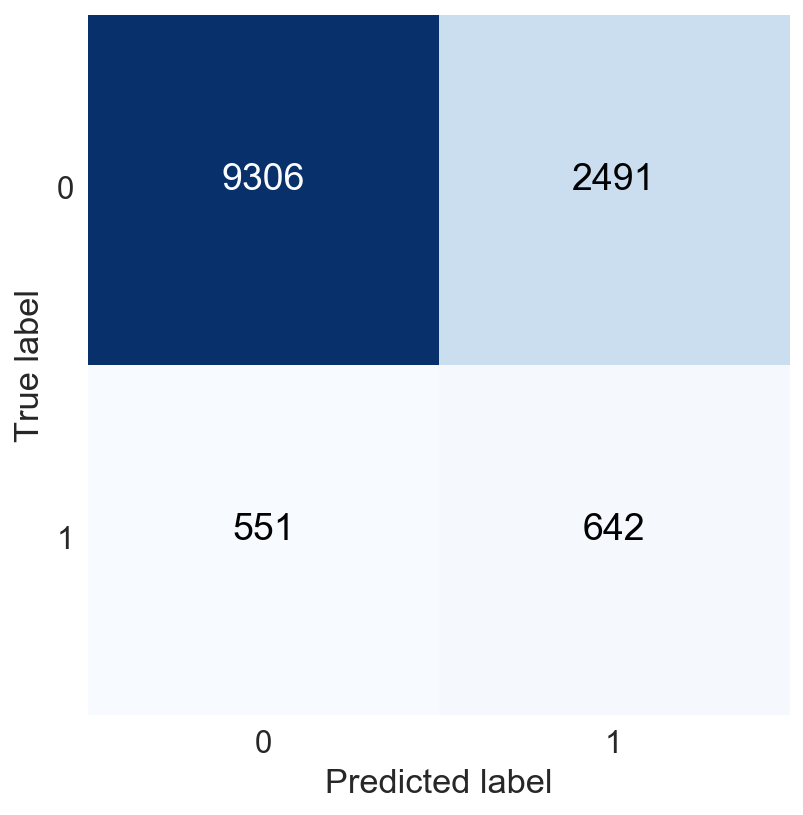

TP = 642
FP = 2491
TN = 9306
FN = 551
 
Precision ( or TPR) = 0.2
Specificity ( or TNR) = 0.79
Recall = 0.54
F1 = 0.3


In [156]:
custom_confusion_matrix(clf = ensemble, x_data = xtest, y_data = ytest)

In [157]:
custom_confusion_matrix(clf = ensemble, x_data = xtest, y_data = ytest, deck=True)

In [158]:
#score(ensemble, xtest, ytest, 'Ensemble')

In [159]:
#custom_roc(clf = ensemble, x = xtest, y = ytest)

Alright, so our final model was an ensemble of KNN, SVM, Decision Tree, Random Forests and Gradient Boosting.  
We see that this does better than just our basic Multinomial Naive Bayes modelacross all measures.  
Nevertheless, it still does slightly worse than VCs from just the precision perspective.  

# Error Analysis

Let's try to figure out where our ensemble model is struggling exactly.  

In [160]:
predictions = xtest.copy()
predictions = pd.DataFrame(data = predictions, 
                           columns = all_data.drop('status', axis = 1).columns.values)

def gather(df, key, value, cols):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )


# gather dummified variables
predictions = gather(predictions, 'country_code', 'temp', [col for col in list(predictions) if col.startswith('country_code_')])
predictions = predictions[predictions.temp==1].drop('temp', axis = 1)

predictions = gather(predictions, 'category', 'temp', [col for col in list(predictions) if col.startswith('category_')])
predictions = predictions[predictions.temp==1].drop('temp', axis = 1)

# add true status
predictions['true_status'] = ytest

# add predicted status
predictions['predicted_status'] = ensemble.predict(X =  xtest)

predictions.head()

founded_at  board  employees  founders  milestones  funding_events  total_raised_to_date  last_raised_amount  top_vc_backed  tc_articles  companies_founded_previously  city_Amsterdam  city_Austin  city_Bangalore  city_Berlin  city_Boston  city_Chicago  city_Irrelevant_city  city_London  city_Los Angeles  city_Montreal  city_Moscow  city_New York City  city_Paris  city_Sao Paulo  city_Seattle  city_Silicon Valley  city_Singapore  city_Sydney  city_Tel Aviv  city_Toronto  \
185       2009.0    0.0        0.0       0.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   0.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           0.0                  0.0             0.0          0.0            0.0           0.0   
262       2007.0    0.0        0.0       1.0         0.0             1.0              500000.0            500000.0            0.0          0.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   0.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           0.0                  0.0             0.0          0.0            0.0           1.0   
331       2009.0    0.0        0.0       0.0         0.0             0.0                   0.0                 0.0            0.0          0.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   1.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           0.0                  0.0             0.0          0.0            0.0           0.0   
789       2004.0    0.0        0.0       0.0         0.0             1.0             2510000.0           2510000.0            0.0          0.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   1.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           0.0                  0.0             0.0          0.0            0.0           0.0   
1063      2005.0    0.0        1.0       0.0         0.0             2.0             2232745.0           1239465.0            0.0          0.0                           0.0             0.0          0.0             0.0          0.0          0.0           0.0                   1.0          0.0               0.0            0.0          0.0                 0.0         0.0             0.0           0.0                  0.0             0.0          0.0            0.0           0.0   

      city_Unknown_city  city_Vancouver      country_code            category  true_status  predicted_status  
185                 0.0             1.0  country_code_CAN  category_analytics            0                 0  
262                 0.0             0.0  country_code_CAN  category_analytics            1                 0  
331                 0.0             0.0  country_code_CAN  category_analytics            0                 0  
789                 0.0             0.0  country_code_DEU  category_analytics            0                 0  
1063                0.0             0.0  country_code_GBR  category_analytics            0                 1

As we saw earlier, our recall score is the worst part of our model.  
Maybe, our model fails to predict a positive exit for companies in only certain categories? 

In [161]:
temp = predictions.copy()

temp = temp[['category', 'true_status', 'predicted_status']]
temp = temp[temp.true_status==1]

temp = temp.groupby('category').sum().reset_index()
temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)
temp = temp.sort_values(by = 'prcnt_predicted', ascending=True)
temp['category'] = temp.category.replace(value = '', to_replace= 'category_', regex = True)
#temp = temp[['category', 'prcnt_not_predicted', 'prcnt_predicted']]

temp

category  prcnt_predicted  prcnt_not_predicted
3     fintech         0.000000             1.000000
15     sports         0.000000             1.000000
7       legal         0.333333             0.666667
11   security         0.333333             0.666667
5      health         0.454545             0.545455
10     search         0.458333             0.541667
12    service         0.496454             0.503546
1   cleantech         0.500000             0.500000
2      edtech         0.500000             0.500000
13     social         0.500000             0.500000
9       other         0.512346             0.487654
14   software         0.551282             0.448718
6    internet         0.572368             0.427632
4    hardware         0.593750             0.406250
8       media         0.615385             0.384615
0   analytics         0.777778             0.222222

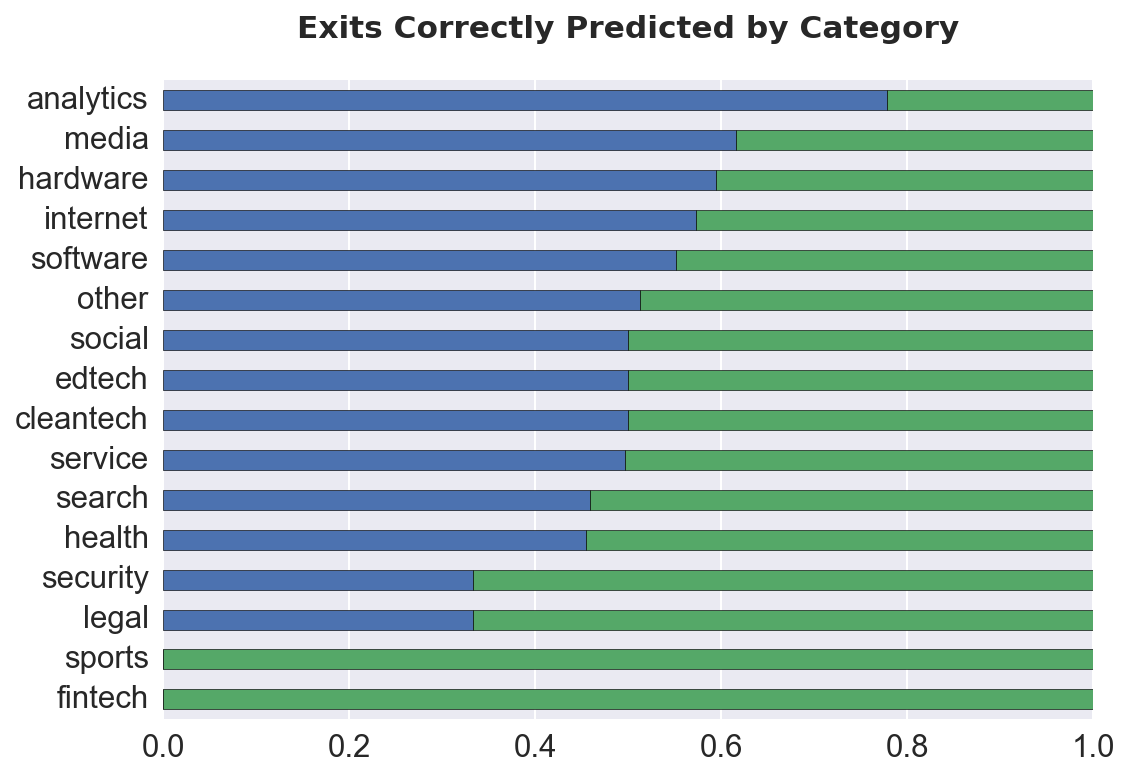

In [162]:
ax = temp.plot.barh(x = 'category', stacked=True)

ax.legend().set_visible(False)

ax.set_title("Exits Correctly Predicted by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

In [163]:
# for deck
ax = temp.plot.barh(x = 'category', stacked=True, color = [color1, color3], edgecolor = None)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')

ax.grid(False)

ax.set_title("", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

plt.savefig(fig_path + 'predicted_exits_distribution_by_category.png', bbox_inches='tight', transparent=True)
plt.close()

Seems we do bad across the board and in particular we fail to predict any security startup exits correctly.  

Is it companies that are not VC backed where we fail?


In [164]:
temp = predictions.copy()

temp = temp[['top_vc_backed', 'true_status', 'predicted_status']]
temp['top_vc_backed'] = np.where(temp.top_vc_backed>0, 1, 0)
temp = temp[temp.true_status==1]

temp = temp.groupby('top_vc_backed').sum().reset_index()
temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)

temp.head()

top_vc_backed  prcnt_predicted  prcnt_not_predicted
0              0         0.537801             0.462199
1              1         0.551724             0.448276

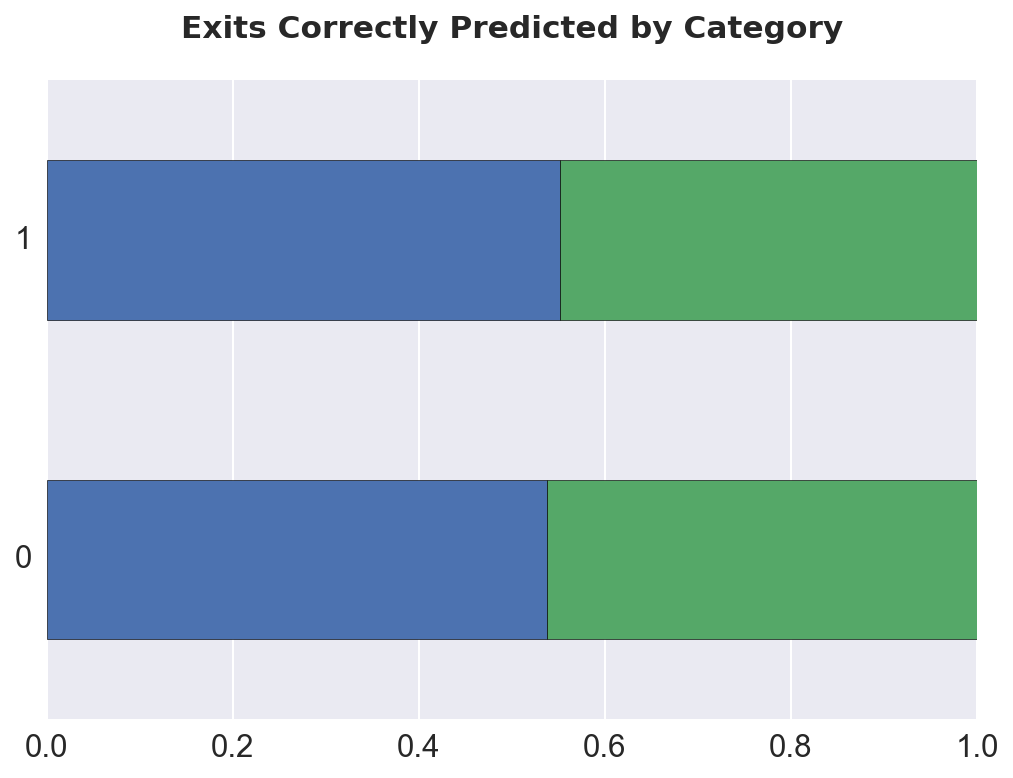

In [165]:
ax = temp.plot.barh(x = 'top_vc_backed', stacked=True)

ax.legend().set_visible(False)

ax.set_title("Exits Correctly Predicted by Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

Is it certain funding categories where it fails? 

In [167]:
temp = predictions.copy()

temp['funding_category'] = '0'
temp['funding_category'][temp['total_raised_to_date'] > 100000000] = '>100M'
temp['funding_category'][(temp['total_raised_to_date'] > 100000000) & (temp['total_raised_to_date'] < 100000000)] = '>10M'
temp['funding_category'][(temp['total_raised_to_date'] > 50000000) & (temp['total_raised_to_date'] < 10000000)] = '>5M'
temp['funding_category'][(temp['total_raised_to_date'] > 25000000) & (temp['total_raised_to_date'] <  5000000)] = '>2.5M'
temp['funding_category'][(temp['total_raised_to_date'] > 0) & (temp['total_raised_to_date'] <  2500000)] = '>0'

temp = temp[['funding_category', 'true_status', 'predicted_status']]
temp = temp[temp.true_status==1]

temp = temp.groupby('funding_category').sum().reset_index()
temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)

temp.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

funding_category  prcnt_predicted  prcnt_not_predicted
0                0         0.529620             0.470380
1               >0         0.693548             0.306452

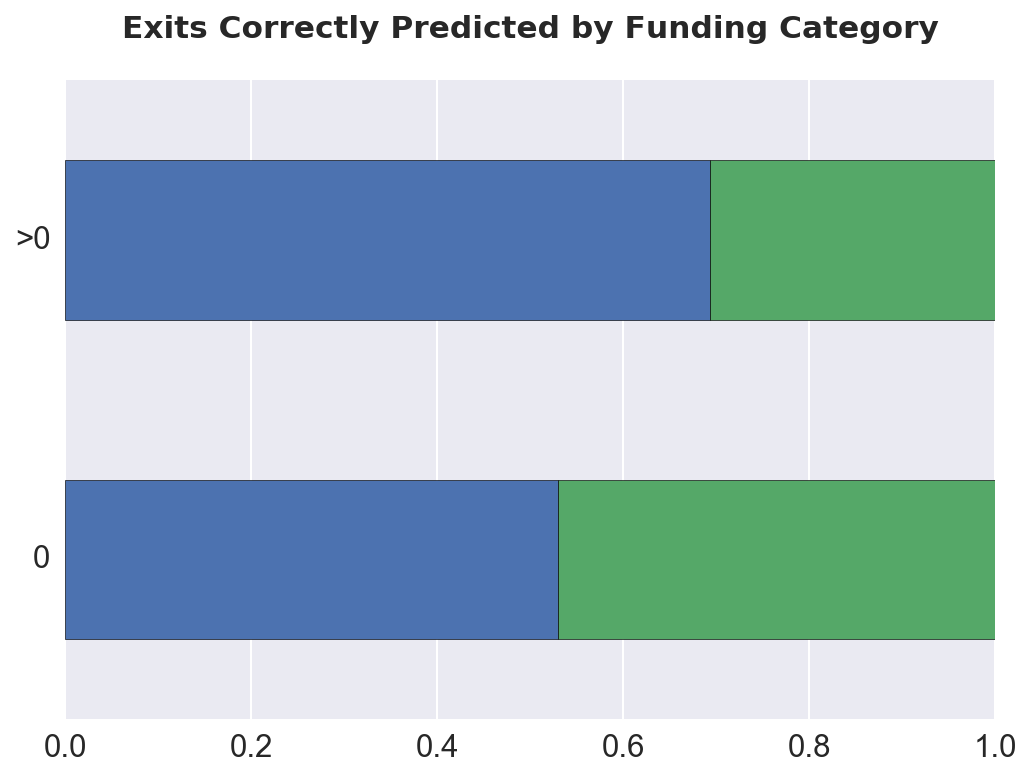

In [168]:
ax = temp.plot.barh(x = 'funding_category', stacked=True)

ax.legend().set_visible(False)

ax.set_title("Exits Correctly Predicted by Funding Category", fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("", fontsize = 12, fontstyle = 'italic')
ax.set_xlabel("", fontsize = 12, fontstyle = 'italic')

# Conclusions

The aim of this project was to show that machine learning techniques can be used to predict whether a startup will eventually achieve a positive exit outcome or a negative exit outcome. ✓

Show that Venture Capital investors can be replaced by computers ✗  
In this sense, VC jobs are safe ... for now.   
And to be fair, we'll always need some VCs around.  

# Reccomendations

As our precision is still fairly low (although comparable to VCs), this model should be used in combination with human judgement and more as a way to quickly shortlist ventures from hundreds of thousands.  

There is still a long way to go before we can replace VCs. As such, my reccomendaton would be to iterate upon this model with the following suggested improvements:  
 * Use CrunchBase API to fill in data that was previously missing  
 * Use CrunchBase API to gather data on startups founded after 2009
 * Try topic modelling - value in mining textual data
 * Try Bayesian Networks - can handle missing data natively
 * Try Penalized models - reduce false positives
 * Interface Pandas directly with MySQL 
 * Use more granular location data through Google APIs